# Analisi Pokédex
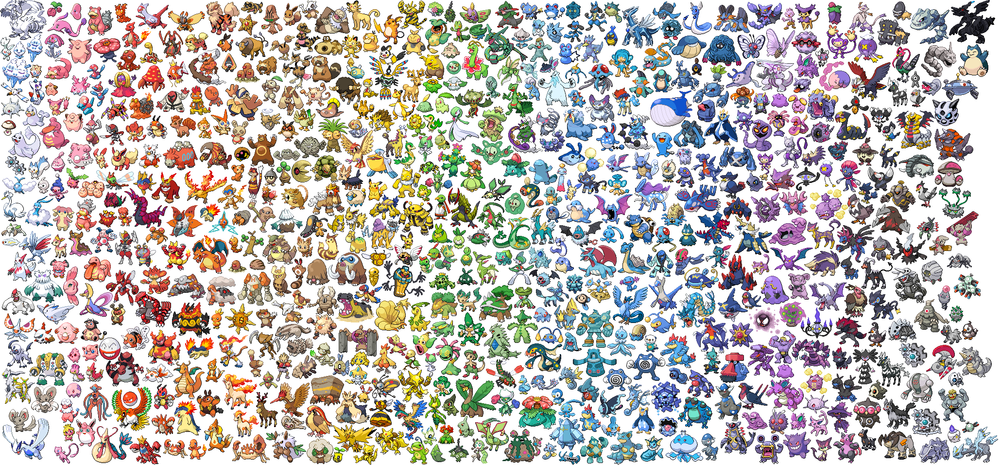

# 1. Contesto
*Pokémon* (abbreviativo di **Pocke**t **Mon**sters) è un brand giapponese pluridecennale partorito nel 1996 dalla mente di Satoshi Taijiri. Inizialmente, fu concepito a partire dalla coppia di videogiochi sviluppati da *Game Freak* per la console Nintendo *Game Boy*, *Pokémon Versione Rossa* e *Pokémon Versione Blu* (*Versione Verde*, in Giappone), ma il successo fu tale da far scaturire una produzione di massa in tanti altri contesti (cartoni, film, carte collezionabili, gadget, peluche, alcuni anche in associazione con altre società famose) così proficua da renderlo tutt'ora il franchising più redditizio di sempre, a ventisei anni, recentemente compiuti, dalla sua nascita.

La sempre più crescente richiesta del media nel corso degli anni, ha portato Nintendo, e *The Pokémon Company* in primis (la società che detiene un terzo dei diritti intellettuali del franchise, insieme con Nintendo stessa e Game Freak) a ideare sempre più creature tascabili: se inizialmente "solo" 151 approdarono nella prima coppia di videogiochi, al momento ne esistono ben 908 (non considerando tutti i bozzetti scartati, alcuni dei quali, però, riutilizzati). Inoltre, molti di questi mostriciattoli possiedono forme alternative, che ne mutano design e caratteristiche (da non confondere con le evoluzioni, che invece ne simboleggiano una crescita, da "cucciolo" fino all'"età adulta"). Di significante interesse sono, per esempio, le forme regionali, ossia forme alternative che fanno variare le caratteristiche del Pokémon in questione, in base al suo ambientamento nell'habitat di una specifica regione.\
In base al periodo di rilascio, e in base alle coppie di videogiochi che li ospitano, i Pokémon sono inoltre suddivisi in "generazioni": ogni set generazionale è delimitato da tre starter (e le loro forme evolute), ossia i Pokémon con i quali si inizia tipicamente la partita, e un numero variabile di "leggendari", ossia la specie più rara e potente presente nella fauna del rispettivo gioco; al momento, si è giunti all'ottava generazione e si è in attesa della nona, in concomitanza con l'uscita dei titoli *Pokémon Scarlatto* e *Pokémon Violetto*, verso la fine del 2022.

La serie di videogiochi si basa sul concetto di collezionare tutti i mostriciattoli tascabili – da qui lo slogan ufficiale del brand *Gotta catch 'em all!* (*Acchiappali tutti!*, in italiano) – allevarli, e diventare il Campione della Lega Pokémon della regione d'ambientazione del rispettivo videogioco, onorificienza data a quell'allevatore di Pokémon – o Allenatore, utilizzando il gergo del videogioco – che insieme alla squadra è riuscito a superare ostacoli sempre più difficili e allenatori via via sempre più forti, secondo un'idea ispirata dall'ultimo film con protagonista Bruce Lee: "*L'ultimo combattimento di Chen*".

Ogni Pokémon è caratterizzato da:
- uno o due **tipi**: evidenziano l'affinità del singolo Pokémon con un certo "elemento" naturale; in particolare, i 18 tipi possibili sono: Normale, Erba, Fuoco, Acqua, Elettro, Volante, Coleottero, Roccia, Terra, Acciaio, Ghiaccio, Lotta, Psico, Buio, Veleno, Spettro, Drago, Folletto;
- **natura**: evidenziano il carattere del Pokémon, garantendo bonus e malus sulle sue statistiche;
- quattro possibili **attacchi** suddivisi nei tipi precedentemente citati: l'affinità tra tipo dell'attacco e uno dei tipi del Pokémon garantisce un bonus nell'output di danno noto come *same-type attack bonus* (**STAB**);
- **abilità**: effetto latente secondario del Pokémon, indipendente dagli attacchi.
- **sesso**: maschile, femminile o asessuato; ogni Pokémon ha una certa probabilità di ritrovamento in base al sesso, se non asessuato.
- cinque **statistiche**: punti vita – o *Health Points* (**HP**) –, attacco, difesa, attacco speciale, difesa speciale, velocità.
- **tasso di cattura**: ogni Pokémon ha una certa probabilità di essere catturato, dipendente dalla sua rarità, dai suoi punti vita correnti (rispetto al totale) e da una serie di altre variabili che verranno investigate nel corso dell'analisi.

Inoltre, durante ogni battaglia, un Pokémon guadagna dei punti esperienza che, facendolo salire di livello (in un intervallo che va da 1 a 100), permettono l'incremento delle sue statistiche, l'apprendimento di nuovi attacchi e l'evoluzione in una nuova specie. 

In ogni videogioco, l'insieme di tutti i Pokémon (comprendente descrizioni sul loro comportamento e caratteristiche generali) è raccolto in un dispositivo chiamato Pokédex (abbreviativo di **Poké**mon ed In**dex**).\
Quella che si vuole fornire è una sorta di alternativa al Pokédex.

# 2. Richieste ed obiettivi (WIP)
1. Ricercare il tipo più comune.
2. Studiare le statistiche d'attacco dei Pokémon in base al loro tipo e al sesso.
3. Studiare le probabilità di ritrovamento di un Pokémon in un determinato sesso in base alla sua specie.
4. Confrontare le compatibilità e le incompatibilità tra i tipi.
5. Analizzare la dipendenza tra caratteristiche di lotta dei Pokémon e tratti secondari, quali altezza, peso e altri valori caratteristici. 
6. Applicare la regressione su alcuni valori secondari caratteristici del Pokémon, rispetto alle statistiche d'attacco.
7. Verificare l'efficacia della classificazione in base alle sotto-popolazioni. 


# 3. Raccolta dati
Per effettuare quest'analisi è stato utilizzato il dataset "Complete Pokemon Data Set", mantenuto e aggiornato da Kyle Kohnen fino al 8/12/2021, raggiungibile al seguente link: https://www.kaggle.com/kylekohnen/complete-pokemon-data-set/version/5.

Esso contiene tutti i Pokémon fino all'ottava generazione (escludendo quelli rilasciati nel più recente *Leggende Pokémon: Arceus*), e comprende tutte le forme alternative e regionali.


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns                                                               # to draw scatterplots
from PIL import Image                                                               # to import different kind of images
from matplotlib import pyplot as plt                    
from statsmodels.graphics.gofplots import qqplot                                    # to draw qq plots
from scipy.stats import norm, gamma, laplace                                        # functions that express data distribution
from statsmodels.formula.api import ols, logit                                      # linear regression, logistic regression
from sklearn.model_selection import train_test_split                                # to divide the dataset into training set and test set
from sklearn.metrics import confusion_matrix, multilabel_confusion_matrix,\
                            classification_report, roc_curve, silhouette_score      # confusion matrics for error valutation
from sklearn.naive_bayes import GaussianNB                                          # MAP naive Bayes classifier
from sklearn import tree                                                            # classification trees
from sklearn.decomposition import PCA
from mlxtend.plotting import plot_decision_regions
from sklearn.ensemble import RandomForestClassifier
import graphviz                                                                     # to draw Decision Trees
from sklearn.cluster import KMeans
import warnings

# to normalize values of a dataframe in [a,b]
def normalize(a,b,df):
    return a+(b-a)*((df-df.min())/(df.max()-df.min()))

warnings.filterwarnings('ignore')

pokedex = pd.read_csv("pokemon.csv")

# 4. Esplorazione dei dati

In [2]:
pokedex.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1118 entries, 0 to 1117
Data columns (total 49 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   name                           1118 non-null   object 
 1   pokedex_number                 1118 non-null   int64  
 2   abilities                      1118 non-null   object 
 3   typing                         1118 non-null   object 
 4   hp                             1118 non-null   int64  
 5   attack                         1118 non-null   int64  
 6   defense                        1118 non-null   int64  
 7   special_attack                 1118 non-null   int64  
 8   special_defense                1118 non-null   int64  
 9   speed                          1118 non-null   int64  
 10  height                         1118 non-null   int64  
 11  weight                         1118 non-null   int64  
 12  genus                          1118 non-null   o

Il dataset è molto variegato, e le sue colonne (ben 49) comprendono sia valori numerici (di diverso tipo), sia booleani e categoriali.

Di seguito, si mostrano primi cinque record per intero.

In [3]:
pokedex.head()

name  pokedex_number             abilities        typing  hp  \
0      Bulbasaur               1  Overgrow~Chlorophyll  Grass~Poison  45   
1        Ivysaur               2  Overgrow~Chlorophyll  Grass~Poison  60   
2       Venusaur               3  Overgrow~Chlorophyll  Grass~Poison  80   
3  Venusaur Gmax               3  Overgrow~Chlorophyll  Grass~Poison  80   
4  Venusaur Mega               3             Thick Fat  Grass~Poison  80   

   attack  defense  special_attack  special_defense  speed  ...  \
0      49       49              65               65     45  ...   
1      62       63              80               80     60  ...   
2      82       83             100              100     80  ...   
3      82       83             100              100     80  ...   
4     100      123             122              120     80  ...   

   ground_attack_effectiveness  fly_attack_effectiveness  \
0                          1.0                       2.0   
1                          1.0                       2.0   
2                          1.0                       2.0   
3                          1.0                       2.0   
4                          1.0                       2.0   

  psychic_attack_effectiveness  bug_attack_effectiveness  \
0                          2.0                       1.0   
1                          2.0                       1.0   
2                          2.0                       1.0   
3                          2.0                       1.0   
4                          2.0                       1.0   

   rock_attack_effectiveness  ghost_attack_effectiveness  \
0                        1.0                         1.0   
1                        1.0                         1.0   
2                        1.0                         1.0   
3                        1.0                         1.0   
4                        1.0                         1.0   

   dragon_attack_effectiveness  dark_attack_effectiveness  \
0                          1.0                        1.0   
1                          1.0                        1.0   
2                          1.0                        1.0   
3                          1.0                        1.0   
4                          1.0                        1.0   

   steel_attack_effectiveness  fairy_attack_effectiveness  
0                         1.0                         0.5  
1                         1.0                         0.5  
2                         1.0                         0.5  
3                         1.0                         0.5  
4                         1.0                         0.5  

[5 rows x 49 columns]

## 4.1 Manipolazione del dataset
Poiché la forma alternativa del singolo Pokémon, quando presente, è specificata direttamente nel suo nome, è possibile rimuovere le due colonne `is_default` e `switchable_form` in quanto ridondanti.\
Anche la colonna `pokedex_number` può essere rimossa, in quanto specifica l'index number del Pokémon in questione sul bestiario.
È possibile inoltre rimuovere la colonna `genus`, che indica una breve descrizione del Pokémon (spesso unica per ogni famiglia evolutiva), e che risulta essere poco utile ai fini della nostra analisi. Stessa cosa per quanto riguarda la colonna `shape`, la quale include informazioni relative alla forma fisica della creatura in questione. \
Avendo a disposizione i tipi, inoltre, è possibile eliminare la colonna `number_pokemon_with_typing`, la quale per ogni record indica il numero di Pokémon con lo stesso tipo (record preso in esame incluso).

In [4]:
pokedex = pokedex.drop(["pokedex_number", "abilities", "is_default", "forms_switchable", "genus", "number_pokemon_with_typing", "shape"], axis=1)

Poiché molti Pokémon vantano la presenza di un doppio tipo, per praticità si sceglie di separare la colonna `typing` in due colonne `typing1` e `typing2`. Da notare che, nell'attuale colonna, le stringhe sono separate dal carattere "tilde" (~), caratteristica che potrà essere sfruttata per creare un'opportuna funzione di separazione.

In [5]:
pokedex[['typing1', 'typing2']] = pokedex.typing.str.split('~', expand=True)
typing2 = pokedex.pop('typing2')
typing1 = pokedex.pop('typing1')
pokedex.insert(3,"typing1", typing1)
pokedex.insert(4,"typing2", typing2)

pokedex = pokedex.drop(["typing"], axis=1)

Stessa lavoro viene eseguito relativamente alla colonna `egg_groups`.

In [6]:
pokedex[['egg_group1', 'egg_group2']] = pokedex.egg_groups.str.split('~', expand=True)
egg_group2 = pokedex.pop('egg_group2')
egg_group1 = pokedex.pop('egg_group1')
pokedex.insert(23,"egg_group1", egg_group1)
pokedex.insert(24,"egg_group2", egg_group2)

pokedex = pokedex.drop(["egg_groups"], axis=1)

Alcuni Pokémon hanno un nome proprio composto da due parole separate da un carattere di spazio. Tale carattere, verrà usato in quest'analisi come carattere di separazione dalla forma alternativa degli stessi, per cui il carattere di spaziatura verrà piuttosto sostituito da un trattino "-", quando non utilizzato a tale scopo.

In [7]:
pokedex["name"] = pokedex["name"].apply(lambda x: x.replace(' ', '-') if "Tapu" in x else x)
pokedex["name"] = pokedex["name"].apply(lambda x: x.replace(' ', '-') if "Oh" in x else x)
pokedex["name"] = pokedex["name"].apply(lambda x: x.replace(' ', '-') if "Nidoran" in x else x)
pokedex["name"] = pokedex["name"].apply(lambda x: x.replace(' ', '-') if x == "Mr Mime" else x)
pokedex["name"] = pokedex["name"].apply(lambda x: x.replace(' ', '-') if x == "Mime Jr" else x)
pokedex["name"] = pokedex["name"].apply(lambda x: x.replace(' ', '-') if x == "Mr Rime" else x)
pokedex["name"] = pokedex["name"].apply(lambda x: x.replace(' ', '-') if x == "Type Null" else x)

pokedex

name   hp  typing1 typing2  attack  defense  \
0                Bulbasaur   45    Grass  Poison      49       49   
1                  Ivysaur   60    Grass  Poison      62       63   
2                 Venusaur   80    Grass  Poison      82       83   
3            Venusaur Gmax   80    Grass  Poison      82       83   
4            Venusaur Mega   80    Grass  Poison     100      123   
...                    ...  ...      ...     ...     ...      ...   
1113             Glastrier  100      Ice    None     145      130   
1114             Spectrier  100    Ghost    None      65       60   
1115               Calyrex  100  Psychic   Grass      80       80   
1116     Calyrex Ice Rider  100  Psychic     Ice     165      150   
1117  Calyrex Shadow Rider  100  Psychic   Ghost      85       80   

      special_attack  special_defense  speed  height  ...  \
0                 65               65     45       7  ...   
1                 80               80     60      10  ...   
2                100              100     80      20  ...   
3                100              100     80     240  ...   
4                122              120     80      24  ...   
...              ...              ...    ...     ...  ...   
1113              65              110     30      22  ...   
1114             145               80    130      20  ...   
1115              80               80     80      11  ...   
1116              85              130     50      24  ...   
1117             165              100    150      24  ...   

      ground_attack_effectiveness  fly_attack_effectiveness  \
0                             1.0                       2.0   
1                             1.0                       2.0   
2                             1.0                       2.0   
3                             1.0                       2.0   
4                             1.0                       2.0   
...                           ...                       ...   
1113                          1.0                       1.0   
1114                          1.0                       1.0   
1115                          0.5                       2.0   
1116                          1.0                       1.0   
1117                          1.0                       1.0   

      psychic_attack_effectiveness  bug_attack_effectiveness  \
0                              2.0                       1.0   
1                              2.0                       1.0   
2                              2.0                       1.0   
3                              2.0                       1.0   
4                              2.0                       1.0   
...                            ...                       ...   
1113                           1.0                       1.0   
1114                           1.0                       0.5   
1115                           0.5                       4.0   
1116                           0.5                       2.0   
1117                           0.5                       1.0   

      rock_attack_effectiveness  ghost_attack_effectiveness  \
0                           1.0                         1.0   
1                           1.0                         1.0   
2                           1.0                         1.0   
3                           1.0                         1.0   
4                           1.0                         1.0   
...                         ...                         ...   
1113                        2.0                         1.0   
1114                        1.0                         2.0   
1115                        1.0                         2.0   
1116                        2.0                         2.0   
1117                        1.0                         4.0   

      dragon_attack_effectiveness  dark_attack_effectiveness  \
0                             1.0                        1.0   
1                             1.0                

Stando alle specifiche del dataset, le altezze dei Pokémon sono definite in decimetri (dm) sulla colonna `height`, ed i loro pesi in ettogrammi (hg) sulla colonna `weight`: potrebbe risultare più conveniente convertire queste grandezze rispettivamente in metri (m) e chilogrammi (kg) (come visualizzate nei vari videogiochi, in pratica).

In [8]:
pokedex['height'] = pokedex['height']/10
pokedex['weight'] = pokedex['weight']/10

Infine, potrebbe risultare conveniente convertire la colonna `genderless` di booleani in una di interi.

In [9]:
pokedex['genderless'] = pokedex['genderless'].astype(int)

## 4.2 Distribuzione dei dati
Di seguito si visualizzano le informazioni del dataset e i suoi primi cinque record, dopo la sua manipolazione.

In [10]:
pokedex.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1118 entries, 0 to 1117
Data columns (total 44 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   name                           1118 non-null   object 
 1   hp                             1118 non-null   int64  
 2   typing1                        1118 non-null   object 
 3   typing2                        597 non-null    object 
 4   attack                         1118 non-null   int64  
 5   defense                        1118 non-null   int64  
 6   special_attack                 1118 non-null   int64  
 7   special_defense                1118 non-null   int64  
 8   speed                          1118 non-null   int64  
 9   height                         1118 non-null   float64
 10  weight                         1118 non-null   float64
 11  gen_introduced                 1118 non-null   int64  
 12  female_rate                    1118 non-null   f

In [11]:
pokedex.head()

name  hp typing1 typing2  attack  defense  special_attack  \
0      Bulbasaur  45   Grass  Poison      49       49              65   
1        Ivysaur  60   Grass  Poison      62       63              80   
2       Venusaur  80   Grass  Poison      82       83             100   
3  Venusaur Gmax  80   Grass  Poison      82       83             100   
4  Venusaur Mega  80   Grass  Poison     100      123             122   

   special_defense  speed  height  ...  ground_attack_effectiveness  \
0               65     45     0.7  ...                          1.0   
1               80     60     1.0  ...                          1.0   
2              100     80     2.0  ...                          1.0   
3              100     80    24.0  ...                          1.0   
4              120     80     2.4  ...                          1.0   

   fly_attack_effectiveness  psychic_attack_effectiveness  \
0                       2.0                           2.0   
1                       2.0                           2.0   
2                       2.0                           2.0   
3                       2.0                           2.0   
4                       2.0                           2.0   

   bug_attack_effectiveness  rock_attack_effectiveness  \
0                       1.0                        1.0   
1                       1.0                        1.0   
2                       1.0                        1.0   
3                       1.0                        1.0   
4                       1.0                        1.0   

   ghost_attack_effectiveness  dragon_attack_effectiveness  \
0                         1.0                          1.0   
1                         1.0                          1.0   
2                         1.0                          1.0   
3                         1.0                          1.0   
4                         1.0                          1.0   

   dark_attack_effectiveness  steel_attack_effectiveness  \
0                        1.0                         1.0   
1                        1.0                         1.0   
2                        1.0                         1.0   
3                        1.0                         1.0   
4                        1.0                         1.0   

   fairy_attack_effectiveness  
0                         0.5  
1                         0.5  
2                         0.5  
3                         0.5  
4                         0.5  

[5 rows x 44 columns]

Esso conta 1118 record. Si notino i conteggi relativi alle colonne `typing2` e `evolves_from`: sebbene siano di meno, non deve considerarsi un errore, bensì come un aspetto da non trascurare; infatti non tutti i Pokémon presentano un doppio tipo, e non tutti i Pokémon sono in grado di evolversi. 

In [12]:
dex_type = pokedex["typing1"].value_counts() + pokedex["typing2"].value_counts()
dex_type = dex_type.sort_values(ascending = False)
dex_type

Water       162
Flying      135
Normal      130
Grass       124
Psychic     123
Bug          96
Electric     89
Rock         89
Fire         88
Poison       85
Ground       82
Fighting     78
Dragon       78
Steel        77
Dark         76
Ghost        73
Fairy        72
Ice          58
dtype: int64

<AxesSubplot:>

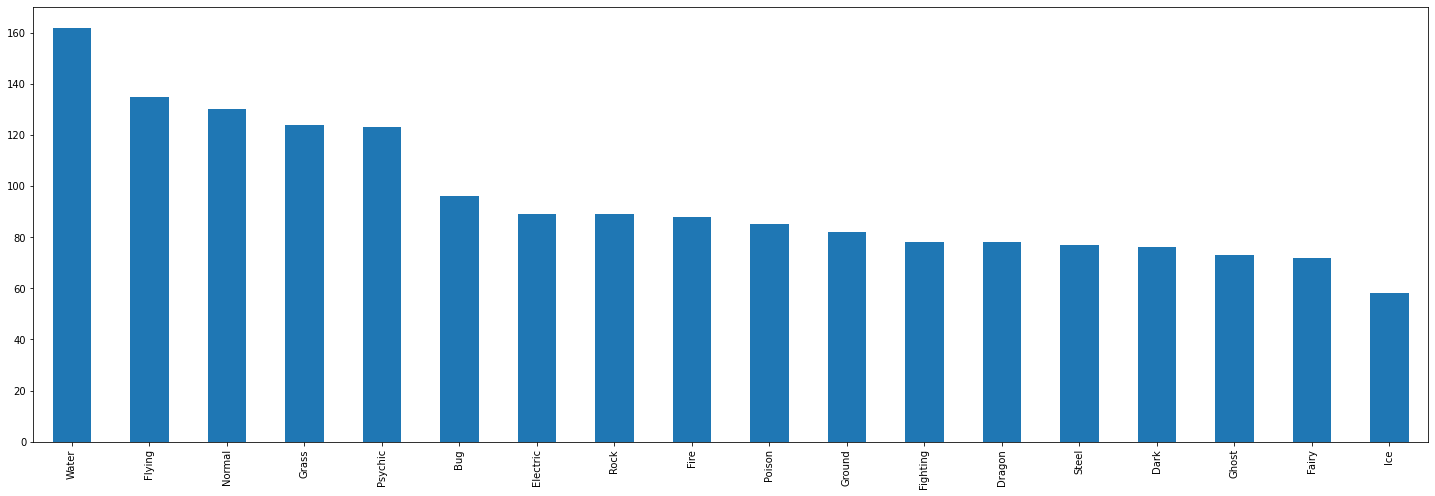

In [13]:
dex_type.plot.bar(figsize=(25,8))

Visto che alcuni Pokémon, cambiando forma, cambiano anche uno dei due tipi, nel conteggio vengono considerate anche le eventuali forme alternative: quello più comune, è il tipo *Acqua*.\
Potrebbe essere interessante scoprire quante forme alternative sono state introdotte nel corso delle varie generazioni, sfruttando il blank char separatore.

In [14]:
alternative_forms_by_gen = pokedex.groupby('gen_introduced')['name'].apply(lambda x: x[x.str.contains(' ')].count())
alternative_forms_by_gen

gen_introduced
1    71
2     8
3    31
4    18
5    23
6    20
7    44
8    35
Name: name, dtype: int64

È possibile notare come siano state proposte, nel corso degli anni, più forme alternative per i Pokémon di prima generazione, tra *Mega Evoluzioni*, *Gigamax* e *forme regionali*. Ciò è dovuto ad un forte attaccamento del brand nei confronti delle sue origini, e ad una continua nostalgia di quei tempi, da parte dei suoi fan.

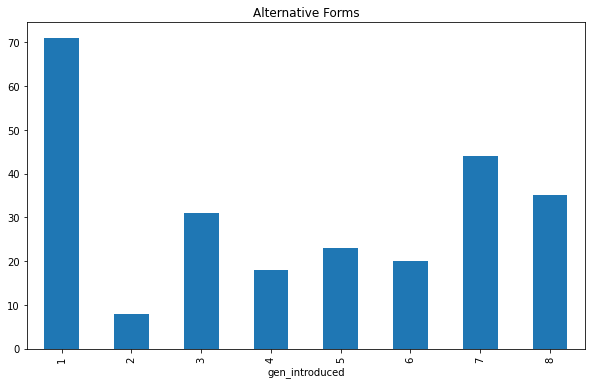

In [15]:
plt.figure(figsize=(10,6))
alternative_forms_by_gen.plot(title="Alternative Forms", kind="bar")
plt.show()

Entrando più nello specifico, osserviamo in quali generazioni le due "gimmick" *Mega Evoluzione* e *Gigamax* sono più ricorrenti. Per inciso, queste due tipologie di forme alternative sono state introdotte rispettivamente in sesta e ottava generazione, e poi fornite anche a creature facenti parte di set generazionali passati.

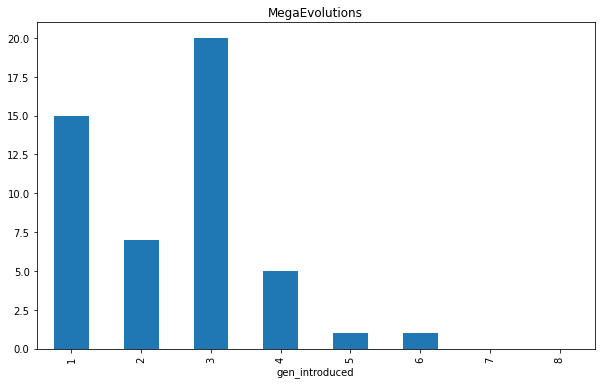

In [16]:
plt.figure(figsize=(10,6))
megas_by_gen = pokedex.groupby('gen_introduced')['name'].apply(lambda x: x[x.str.contains('Mega')].count())
megas_by_gen.plot(title="MegaEvolutions", kind="bar")
plt.show()

È possibile notare come il set generazionale più ricco di *Mega Evoluzioni* sia il terzo, seguito immediatamente dal primo.\
Curiosità da parte di chi scrive e conosce molto bene il brand: se la causa del numero di *Mega Evoluzioni* per i Pokémon di prima generazione è da ritrovarsi principalmente nella nostalgia, come già spiegato in precenza, il primato della terza lo si deve al fatto che nel periodo della sesta generazione (più precisamente alla fine del 2014) è stata rilasciata la coppia di videogiochi *Pokémon: Rubino Omega* e *Pokémon: Zaffiro Alfa* per Nintendo 3DS, versioni aggiornate degli originali *Pokémon: Versione Rubino* e *Pokémon: Versione Zaffiro* usciti undici anni prima per il GameBoy Advance. The Pokémon Company ha quindi approfittato dell'occasione per aggiungere nuovi contenuti sfruttando una gimmick recentemente introdotta.

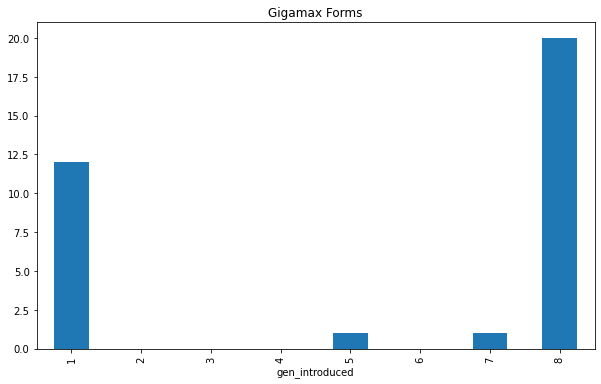

In [17]:
plt.figure(figsize=(10,6))
gmax_by_gen = pokedex.groupby('gen_introduced')['name'].apply(lambda x: x[x.str.contains('Gmax')].count())
gmax_by_gen.plot(title="Gigamax Forms", kind="bar")
plt.show()

Numeri interessanti anche relativamente alla Gigamax. La gimmick *Gigamax* è una versione particolare della *Dynamax*, introdotta nei relativamente recenti *Pokémon: Spada* e *Pokémon: Scudo*: se quest'ultima ingigantisce i Pokémon senza variarne l'aspetto, la prima, qui presa invece in esame, dona inoltre nuove sembianze al Pokémon che ne fa utilizzo.\
Il set generazionale più fornito di forme *Gigamax* è proprio l'ottavo, il quale non a caso è il medesimo che ha introdotto questa nuova meccanica di gioco; esso è seguito immediatamente dal primo, surclassando tutti gli altri set generazionali.

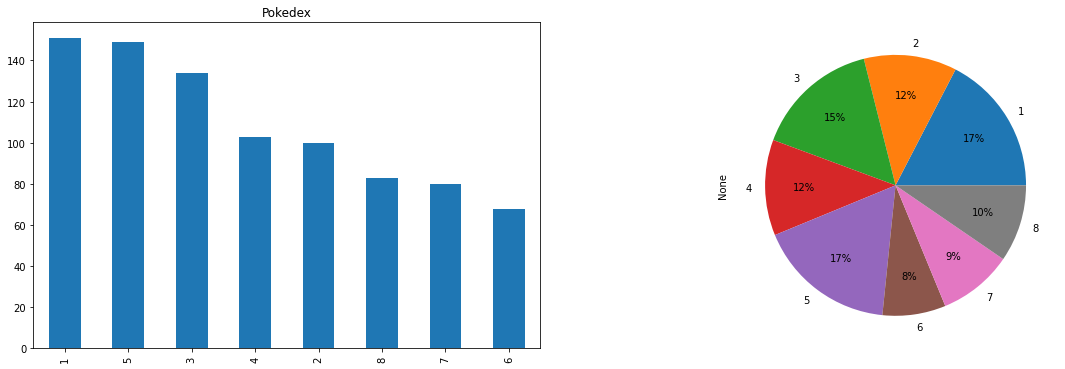

In [18]:
pokemon_by_gen = pokedex["gen_introduced"].value_counts() - alternative_forms_by_gen

plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
pokemon_by_gen.sort_values(ascending = False).plot(title="Pokedex", kind="bar")
plt.subplot(1,2,2)
pokemon_by_gen.plot.pie(autopct='%1.0f%%', pctdistance=0.7, labeldistance=1.1)
plt.show()

Osserviamo i numeri di Pokémon introdotti nel corso delle varie generazioni, escludendo le *forme alternative* (e quindi eventuali "doppioni" omonimi): è possibile notare che il numero maggiore fu introdotto in prima generazione, agli albori del franchise; questo numero è seguito da quello relativo ai Pokémon introdotti in quinta e in terza generazione. Numeri che non stupiscono, considerando che la terza, e la quinta generazione soprattutto, sono state quelle della "rivoluzione" del brand, il quale cercava il più possibile di modernizzarsi e di stare al passo con i tempi, soprattutto in termini di stile e design.

Analizziamo adesso le PDF delle colonne relative alle statistiche dei Pokémon.

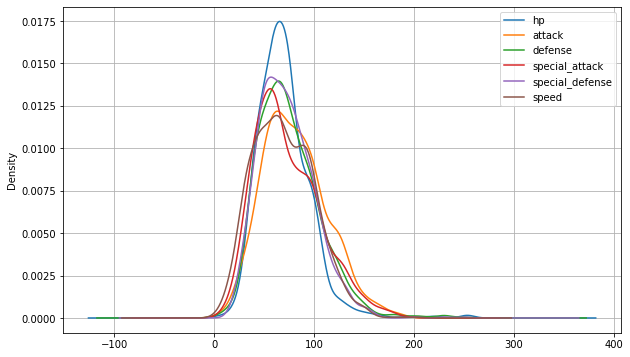

In [19]:
pokedex[['hp', 'attack', 'defense', 'special_attack', 'special_defense', 'speed']].plot.density(figsize=(10,6))
plt.grid()
plt.show()

Le statistiche sono distribuite secondo un andamento gaussiano.\
È possibile notare un picco sulla colonna `hp`, dovuto principalmente a pochi Pokémon con tanti punti vita (come *Chansey*, *Blissey* - il quale ha il maggior numero di HP in assoluto -, *Audino* e qualche leggendario).

Potrebbe essere interessante osservare anche le PDF relative ad altri tratti caratterizzanti dei Pokémon, che non sono legati alle statistiche utilizzate in battaglia.\
Ogni Pokémon, infatti, in base alla sua rarità e al suo stadio evolutivo, è caraterizzato anche da un tasso di cattura. Sin dalle prime versioni dei videogiochi, questo valore era codificato in una word da 8 bit, per cui è stato mantenuto questo criterio sino alle versioni più recenti, facendolo variare in un range $[0,255]$.\
Tale valore viene essere utilizzato come "scala" nel momento in cui si cerca di catturare un Pokémon. Difatti, ogni volta che, ingaggiata una lotta con un Pokémon selvatico, lo si cerca di catturare, il videogioco calcolerà se esso è stato calcolato o meno secondo la seguente formula mostrata per completezza esplicativa.

$a=\frac{(3 \times HP_{max} - 2 \times HP_{actual}) \times rate \times bonus_{ball}}{3 \times HP_{max}} \times status$

dove:
- $rate$ è il `capture_rate`;
- $bonus_{ball}$ è un valore dipendente dalla Pokéball utilizzata per la cattura (valore di scala che varia da $\times 1$ a $\times 8$, a seconda della ball utilizzata);
- $status$ è un malus inflitto al Pokémon avversario: paralisi, scottatura, addormentamento, avvelenamento, congelamento (valore di scala che può essere $\times 1,\times 1.5, \times 2$ a seconda del tipo di status). 

In realtà, nel corso degli anni, sono state aggiunte altre variabili, ma all'atto pratico, la formula di base è quella descritta.\
Di seguito si analizza la PDF relativa alla colonna `capture_rate`.

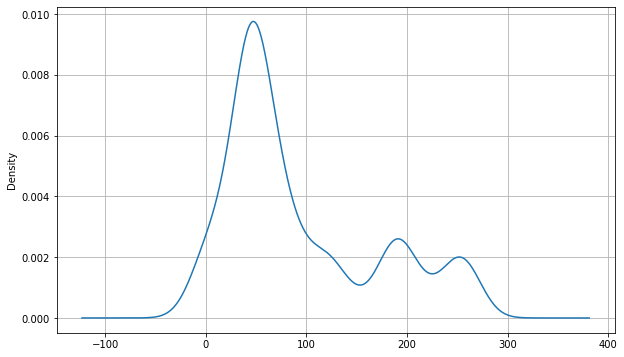

In [20]:
plt.figure(figsize=(10,6))
pokedex['capture_rate'].plot.density().grid()
plt.show()

Si noti come la distribuzione del `catch_rate` abbia una forma di "mixture" di tre di Gaussiane, per cui questo attributo si distribuisce secondo un andamento multimodale, secondo il quale possiamo suddividere i Pokémon, a seconda del loro "catch_rate", in tre diverse categorie:
- esemplari molto comuni nella fauna, e quindi più inclini ad essere catturati;
- Pokémon più rari, e quindi più difficili da catturare;
- creature uniche nella fauna, e quindi col più basso tasso di cattura.

Questa suddivisione potrebbe essere utile, nei prossimi paragrafi, per poter eseguire una classificazione in base a determinate caratteristiche.

Verifichiamo quali sono le probabilità di incontrare un Pokémon di un certo sesso.

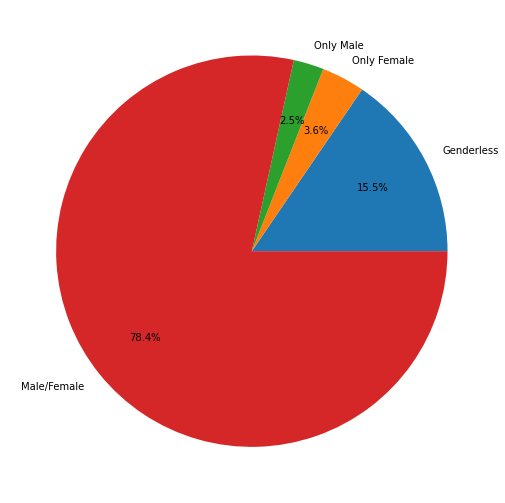

In [21]:
genderless = len(pokedex[pokedex['genderless']==True]['genderless'])                               # numero di asessuati
only_female = len(pokedex[pokedex['female_rate']==1]['female_rate'])                               # numero di pkmn 100% femmina
only_male = pokedex[pokedex['female_rate']==0]
only_male = len(only_male[only_male['genderless']!=True]['female_rate'])                           # numero di pkmn 100% maschio

gender = len(pokedex[pokedex['genderless']==False]['female_rate']) - only_female - only_male       # numero di pknm che possono essere maschio o femmina

counts = [genderless, only_female, only_male, gender]
labels = ['Genderless', 'Only Female', 'Only Male', 'Male/Female']

plt.figure(figsize=(15,9))
plt.pie(counts, autopct='%1.1f%%', pctdistance=0.7, labeldistance=1.1, labels=labels)
plt.show()

È possibile constatare che la stragrande maggioranza di specie di Pokémon può essere trovata nella fauna sia con sesso maschile che con sesso femminile. Questa statistica è succeduta immediatamente da esemplari asessuati, i quali tipicamente sono Pokémon leggendari o Pokémon comuni ispirati a oggetti. Infine, troviamo esemplari di solo sesso femminile e di solo sesso maschile, di cui quest'ultimi sono presenti in minoranza.

Osserviamo adesso le PDF di altezza e peso.

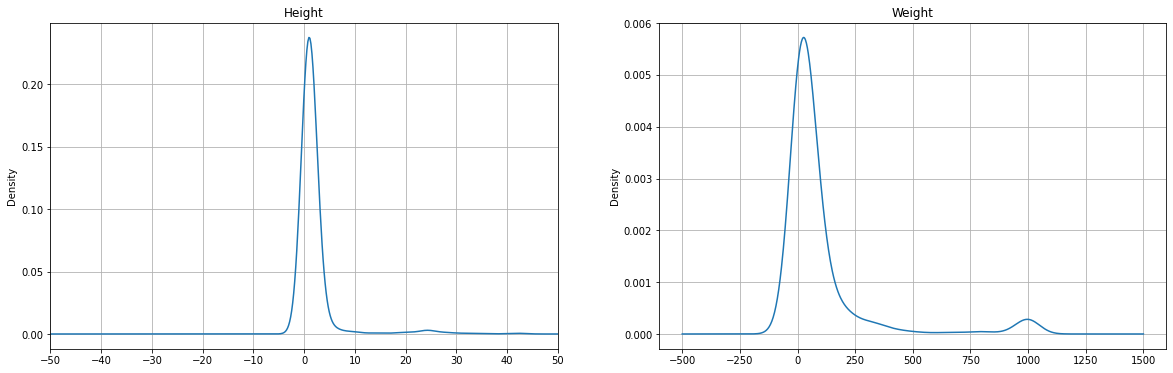

In [22]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
pokedex['height'].plot.density()
plt.title('Height')
plt.xlim([-50,50])
plt.xticks(np.arange(-50, 50+1, 10))
plt.grid()

plt.subplot(1,2,2)
plt.title('Weight')
pokedex['weight'].plot.density()
plt.grid()

plt.show()

È possibile notare che entrambi gli attributi sono distribuiti secondo una mixture di due Gaussiane. Ciò indica che sono presenti due mode, infatti:
- per quanto concerne l'altezza, molti esemplari misurano tra i pochi centimetri e fino a 8 metri circa, ma sono comunque presenti alcune specie tra i 20 e i 30 metri;
- il peso varia fino a 250 kg, ma alcuni di essi (per lo più leggendari) pesano attorno alla tonnellata.

Da questa prima analisi, è possibile comprendere che l'intera popolazione di Pokémon è suddivisa in realtà in delle sotto-popolazioni, sia in base alle loro statistiche in battaglia ed il tasso di cattura, sia in base ai loro tratti fisici.
A tal proposito, i tre attributi booleani `baby_pokemon`, `legendary` e `mythical` ci aiutano a individuare queste tre popolazioni, rispetto a quelli più comuni.
In particolare:
- i **Pokémon Baby** sono dei Pokémon non ancora in grado di riprodursi; infatti, in seconda generazione, con l'avvento di *Pokémon: Versione Oro*, *Pokémon: Versione Argento* e *Pokémon: Versione Cristallo*, usciti per la console *GameBoy Color* intorno agli anni 2000, è stato introdotto il concetto di breeding. Quasi tutti i Pokémon (principalmente quelli non asessuati) possono accoppiarsi: infatti solo alcune specie sono compatibili (in base al loro Gruppo Uova, presentato nella colonna `egg_group` e che verrà analizzato in seguito) e possono farlo solo se Pokémon non-baby;
- i **Pokémon leggendari** sono gli esemplari più potenti presenti nella fauna del rispettivo videogioco. Alcuni di essi sono presentati nella copertina della rispettiva versione di gioco. Si tratta di esemplari unici, che possono essere catturati solamente una volta nella partita;
- i **Pokémon mitici** (o più comunemente chiamati in italiano "misteriosi") sono così definiti in quanto rari non solo dentro il gioco, ma sfondando la quarta parete, anche al di fuori del gioco stesso. Si tratta di esemplari talmente rari da non poter essere trovati neanche nella fauna del videogioco, e per ottenerli è necessario partecipare a eventi vari (spesso presso la nota catena di videogiochi GameStop), fiere del fumetto o mediante contenuti scaricabili di terze parti rilasciati da The Pokémon Company solo per un limitato periodo di tempo.

Suddividiamo il dataset in base alle sotto-popolazioni individuate (sfruttando le colonne booleane "baby_pokemon", "legendary" e "mythical").

In [23]:
attr = ['hp', 'attack', 'defense', 'special_attack', 'special_defense', 'speed', 'capture_rate', 'female_rate', 'genderless', 'height', 'weight', 'base_experience', 'base_happiness', 'egg_cycles']
stats = ['hp', 'attack', 'defense', 'special_attack', 'special_defense', 'speed']
traits = ['height', 'weight', 'base_experience', 'base_happiness', 'egg_cycles']

baby = pokedex[pokedex['baby_pokemon']==True][attr]
leg = pokedex[pokedex['legendary']==True][attr]
myth = pokedex[pokedex['mythical']==True][attr]

common = pokedex[pokedex['baby_pokemon']==False]
common = common[common['legendary']==False]
common = common[common['mythical']==False]
common = common[attr]

subpops = ['Common', 'Baby', 'Legendary', 'Mythical']

Analizziamo prima le frequenze di queste tre sotto-popolazioni in generale, e successivamente i loro rilasci col passare delle generazioni, statistiche entrambe osservate considerando le varie forme alternative.

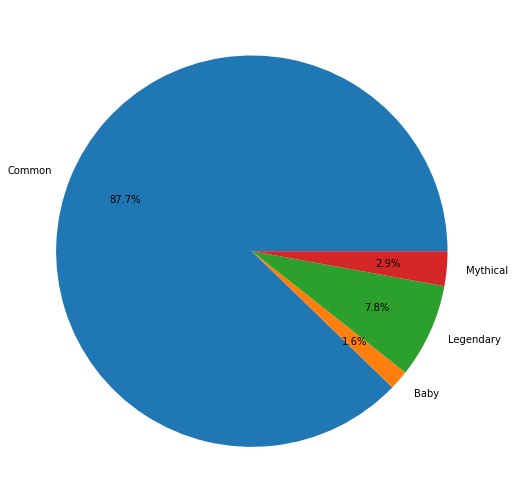

In [24]:
commons = len(common)
legendaries = len(leg)
mythical = len(myth)
babies = len(baby)

pkmn_sub = [commons, babies, legendaries, mythical]

plt.figure(figsize=(15,9))
plt.pie(pkmn_sub, autopct='%1.1f%%', pctdistance=0.7, labeldistance=1.1, labels=subpops)
plt.show()

<AxesSubplot:xlabel='gen_introduced'>

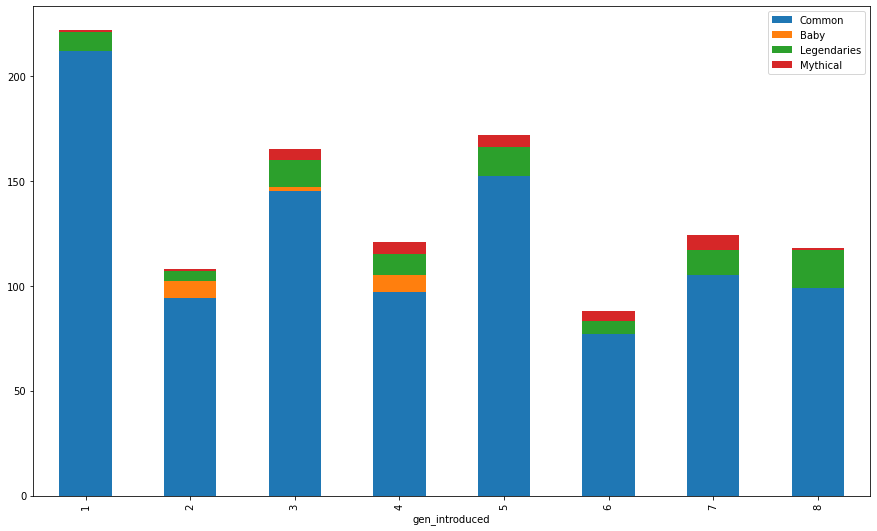

In [25]:
pkmn_baby_bygen = pokedex.groupby('gen_introduced')['baby_pokemon'].apply(lambda x: x[x==True].count()) 
pkmn_leg_bygen = pokedex.groupby('gen_introduced')['legendary'].apply(lambda x: x[x==True].count())
pkmn_myth_bygen = pokedex.groupby('gen_introduced')['mythical'].apply(lambda x: x[x==True].count())

pkmn_common_bygen = pokedex['gen_introduced'].value_counts() - pkmn_baby_bygen - pkmn_leg_bygen - pkmn_myth_bygen

labels = pkmn_baby_bygen.index

plotdata = pd.DataFrame({"Common":pkmn_common_bygen.values,
                        "Baby":pkmn_baby_bygen.values,
                        "Legendaries":pkmn_leg_bygen.values,
                        "Mythical":pkmn_myth_bygen.values},
                        index=labels)

plotdata.plot.bar(stacked=True, figsize=(15,9))

Dal grafico a torta, è ovvio constatare che i Pokémon meno comuni in assoluto sono i baby, di cui la cui maggior parte sono stati introdotti in seconda e in quarta generazione. Durante la seconda, proprio per l'avvento del breeding, e durante la quarta, perché The Pokémon Company stava cercando di approfondire ancor di più le origini dei Pokémon da un punto di vista narrativo; per cui, introdurre delle pre-evoluzioni e delle evoluzioni di Pokémon già esistenti in generazioni passate era il minimo per poter mantenere questa promessa.

D'altra parte, non stupisce la scarsa presenza di mitici e leggendari, i quali però sono aumentati col passare degli anni. La crescita dei misteriosi è principalmente dovuta all'uscita di prodotti cinematografici che vedono come primi protagonisti proprio i Pokémon misteriosi, in occasione dei quali ricorrevano gli eventi di distribuzione precedentemente citati. A tal proposito, si prenda come esempio la terza generazione: i Pokémon misteriosi di questa generazione sono *Jirachi* e *Deoxys*, entrambi protagonisti di due lungometraggi spin-off della serie animata, ossia *Pokémon: Fratello dallo spazio* e *Pokémon: Jirachi: wish maker*.

Infine, altri tre attributi da esaminare durante questa prima fase di analisi, sono quelli relativi alla crescita di un Pokémon: esperienza, felicità e capacità di evoluzione.
Ogni qual volta si termina con successo una lotta, un Pokémon accumula una certa quantità di punti esperienza: raggiunto un cewrto gap di esperienza, esso sale poi di livello (in un range $[1,100]$), permettendo così un incremento delle sue statistiche di combattimento e l'apprendimento di nuove mosse (in totale possono esserne apprese fino a quattro). È importante constatare che per ogni livello, il quantitativo di punti necessari per arrivare al successivo aumenta. Inoltre, raggiunto un certo livello, spesso un esemplare può evolversi, mutando il suo aspetto, le sue statistiche, e delle volte anche il suo tipo.\
Altro valore che per ogni Pokémon in squadra incrementa continuamente (in base a quanto tempo li si tengono in squadra e in base al numero di lotte eseguite con ognuno di essi) è la felicità.

Non tutti i Pokémon possono evolversi (mentre alcuni possono avere degli stadi evolutivi ramificati, visto che l'incremento del livello non è l'unico metodo evolutivo, si pensi alla felicità massima come uno di questi metodi), ma è vero che tutti quanti guadagnano un certo cumulativo di esperienza in base al Pokémon sconfitto (e al loro numero, naturalmente).

A questo proposito, la colonna `base_experience` indica la quantità di punti esperienza che viene guadagnata in base al Pokémon sconfitto, senza applicare nessun moltiplicatore relativo a quanti ne sono stati sconfitti. 
La colonna `base_happiness` indica invece il quantitativo di felicità che un Pokémon ha quando viene catturato (in un range $[0,255]$).

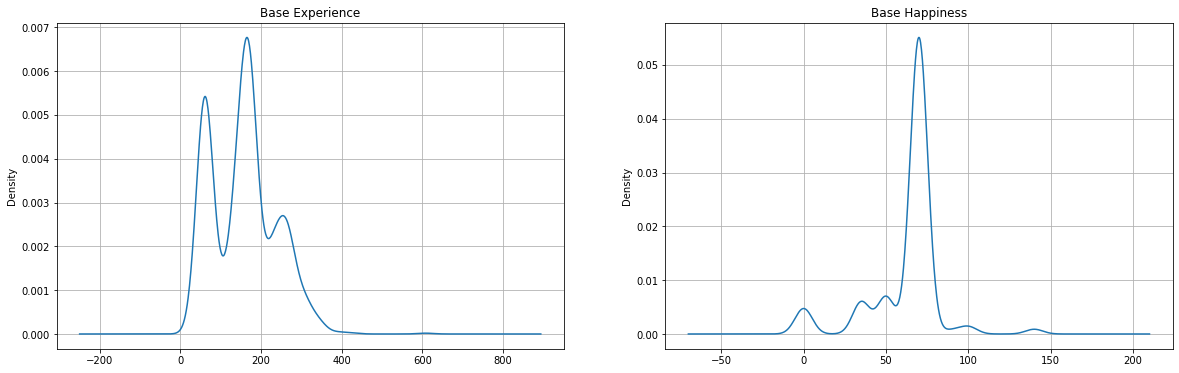

In [26]:
plt.figure(figsize=(20,6))
plt.subplot(121)
pokedex['base_experience'].plot.density()
plt.title("Base Experience")
plt.grid()
plt.subplot(122)
pokedex['base_happiness'].plot.density()
plt.title("Base Happiness")
plt.grid()
plt.show()

Com'è possibile notare dalla PDF dell'esperienza di base, anche in questo caso la popolazione è suddivisa secondo tre mode. Ciò indica che, in base alla sua categoria, il Pokémon sconfitto fornirà un quantitativo di esperienza medio che varierà rispetto a quello di un'altra catogoria (per esempio, un leggendario piuttosto che un esemplare comune).

Anche la felicità presenta un andamento multimodale: sebbene un numero di Pokémon spicchi rispetto agli altri, ossia quelli con felicità attorno ai 60/80 punti di felicità base, troviamo anche dei Pokémon con esattamente 0 punti esperienza (e qualche altro con una quantità di punti tra i 25 ed i 50).

<AxesSubplot:>

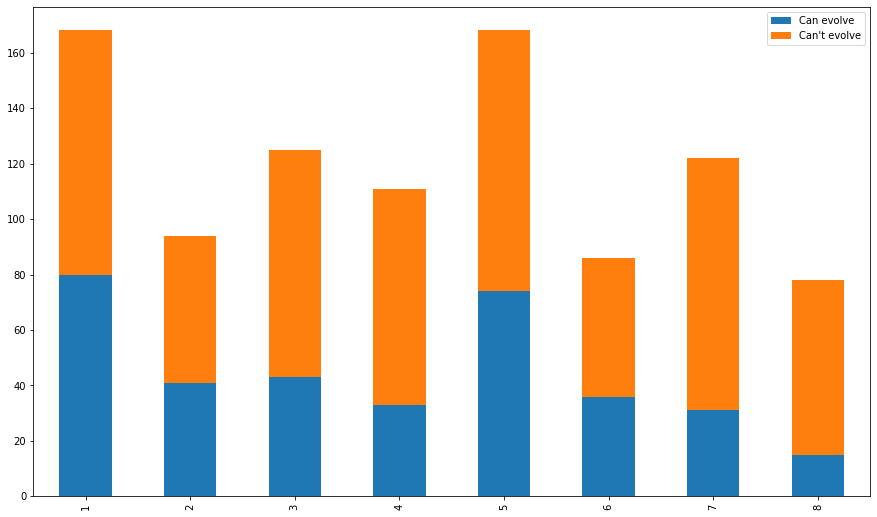

In [27]:
pkmn_w_evo = pokedex[pokedex['can_evolve']==True]['gen_introduced'].value_counts() - megas_by_gen - gmax_by_gen
pkmn_wo_evo = pokedex[pokedex['can_evolve']==False]['gen_introduced'].value_counts() - megas_by_gen - gmax_by_gen

labels = pkmn_w_evo.index

plotdata = pd.DataFrame({"Can evolve":pkmn_w_evo.values,
                        "Can't evolve":pkmn_wo_evo.values},
                        index=labels)

plotdata.plot.bar(stacked=True, figsize=(15,9))

In questo caso, conteggiando le forme alternative (visto che alcune forme regionali dello stesso Pokémon possono avere evoluzioni, e altre no), e scartando i record relativi alle *Mega Evoluzioni* e le *Gigamax* (le quali, essendo gimmick temporanee da usare in lotta, non possono avere evoluzioni) si può notare che poco meno della metà dei Pokémon introdotti in ogni generazione è in grado di evolversi. C'è da considerare che tra tutti i Pokémon che non si possono evolvere sono presenti mitici e leggendari (fatta eccezione per le linee evolutive di *Cosmog* e *Type: Null*).

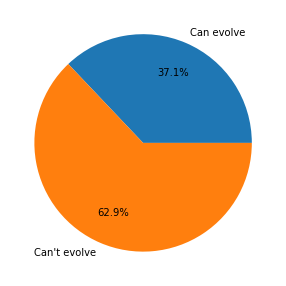

In [28]:
plt.figure(figsize=(10,5))
plt.pie([pkmn_w_evo.sum(), pkmn_wo_evo.sum()], autopct='%1.1f%%', pctdistance=0.7, labeldistance=1.1, labels=["Can evolve", "Can't evolve"])
plt.show()

In particolare, possiamo notare che molto meno della metà dei Pokémon in totale, comprese forme alternative, sono in grado di evolversi. Questo è dovuto non solo alla presenza dei mitici e dei leggendari, e degli esemplari mono-stadio, ma a tutti quei Pokémon al loro stadio finale che non possono evolversi ulteriormente (si pensi, per esempio, a *Venusaur*, *Blastoise* e *Charizard*).

Si analizzano, infine, le compatibilità di breeding e il numero di passi necessari per far schiudere un uovo, la prima presentata nelle colonne `egg_groupX` ed il secondo presentato invece nella colonna `egg_cycles`.\
Come nota di margine, ogni ciclo include esattamente 257 passi.

<AxesSubplot:>

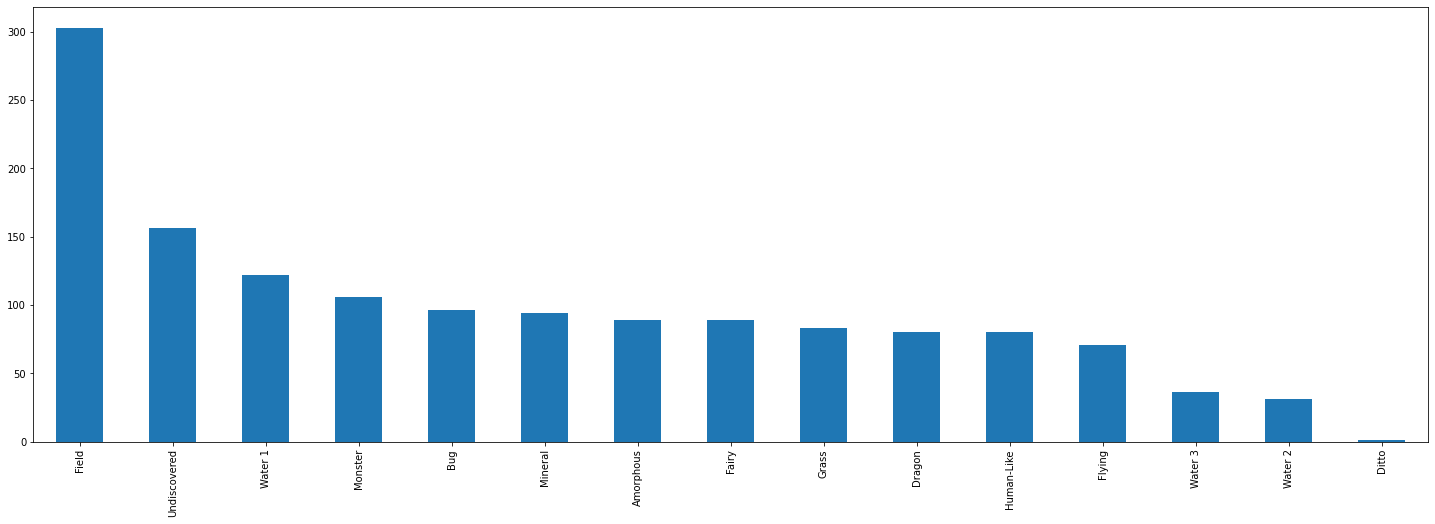

In [29]:
dex_egg_groups = pokedex["egg_group1"].value_counts().add(pokedex["egg_group2"].value_counts(), fill_value=0)
dex_egg_groups = dex_egg_groups.sort_values(ascending = False)
dex_egg_groups.plot.bar(figsize=(25,8))

Si noti come i gruppi più frequenti sono "Field", "Undiscovered" e "Water 1".
In particolare, nel primo gruppo troviamo la stramaggioranza dei Pokémon che si trovano nell'erba alta, nel secondo ritroviamo tutti i Leggendari/Mitici e asessuati più in generale, mentre nel terzo gruppo l'alta percentuale di Pokémon di tipo acqua.

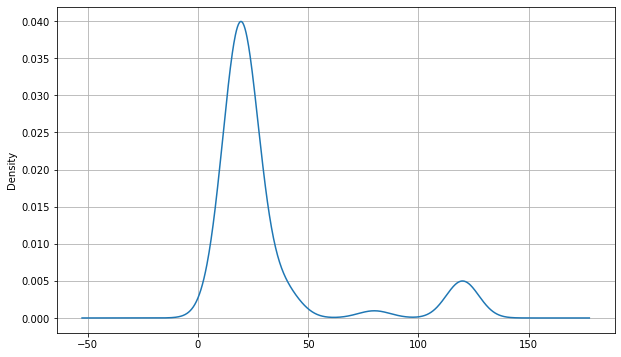

In [30]:
plt.figure(figsize=(10,6))
pokedex['egg_cycles'].plot.density().grid()
plt.show()

Infine, si noti come anche nella schiusura delle uova sia presente un andamento multimodale, con la gaussiana nell'intervallo $[0,50]$ che fa da moda assoluta. Naturalmente in questo caso si dovrà escludere l'ipotesi di suddivisione della popolazione in base a leggendari, mitici e comuni, ma è comunque un aspetto importante che potrà essere analizzato nelle fasi successive.

## 4.3 Statistica descrittiva

Analizziamo in maniera generica i tratti primari e secondari del Pokémon, quali statistiche di base utilizzate in battaglia e i loro tratti secondari.

Nei prossimi paragrafi verrà eseguita un'analisi approfondita dei vari indici a seconda delle varie sotto-popolazioni.

In [31]:
pokedex[attr].describe()

hp       attack      defense  special_attack  special_defense  \
count  1118.000000  1118.000000  1118.000000     1118.000000      1118.000000   
mean     70.025939    80.678891    74.756708       73.231664        72.572451   
std      26.646333    32.056040    30.954899       32.454237        27.782111   
min       1.000000     5.000000     5.000000       10.000000        20.000000   
25%      50.000000    55.000000    50.250000       50.000000        50.000000   
50%      68.000000    78.500000    70.000000       65.000000        70.000000   
75%      80.750000   100.000000    90.000000       95.000000        90.000000   
max     255.000000   190.000000   250.000000      194.000000       250.000000   

             speed  capture_rate  female_rate   genderless       height  \
count  1118.000000   1118.000000  1118.000000  1118.000000  1118.000000   
mean     69.479428     92.733453     0.382603     0.154741     2.142755   
std      30.036549     75.681177     0.247861     0.361819     5.815821   
min       5.000000      3.000000     0.000000     0.000000     0.100000   
25%      45.000000     45.000000     0.125000     0.000000     0.500000   
50%      67.000000     60.000000     0.500000     0.000000     1.000000   
75%      90.000000    127.000000     0.500000     0.000000     1.600000   
max     200.000000    255.000000     1.000000     1.000000   100.000000   

            weight  base_experience  base_happiness   egg_cycles  
count  1118.000000      1118.000000     1118.000000  1118.000000  
mean     99.330501       157.024150       62.567084    31.046512  
std     206.791150        78.842887       21.483321    30.015299  
min       0.100000        36.000000        0.000000     5.000000  
25%       8.800000        70.000000       70.000000    20.000000  
50%      30.250000       162.000000       70.000000    20.000000  
75%      80.000000       207.000000       70.000000    25.000000  
max    1000.000000       608.000000      140.000000   120.000000

### 4.3.1 Indici centrali

#### Media
Osserviamo le medie relative alle statistiche di lotta e ai caratteri secondari dei Pokémon, prima in generale e poi per generazione, per poi soffermarci sull'indice di media relativo ad ognuna delle sotto-popolazioni.

In [32]:
pokedex[attr].mean()

hp                  70.025939
attack              80.678891
defense             74.756708
special_attack      73.231664
special_defense     72.572451
speed               69.479428
capture_rate        92.733453
female_rate          0.382603
genderless           0.154741
height               2.142755
weight              99.330501
base_experience    157.024150
base_happiness      62.567084
egg_cycles          31.046512
dtype: float64

In [33]:
pokedex.groupby('gen_introduced')[attr].mean()

hp     attack    defense  special_attack  \
gen_introduced                                                    
1               64.373874  76.495495  69.702703       69.324324   
2               71.694444  71.805556  73.879630       66.527778   
3               66.806061  81.030303  74.048485       75.600000   
4               73.082645  82.867769  78.132231       76.404959   
5               72.337209  83.046512  72.325581       70.866279   
6               70.386364  77.397727  77.181818       76.090909   
7               70.532258  87.048387  80.153226       78.250000   
8               76.330508  86.237288  78.661017       76.194915   

                special_defense      speed  capture_rate  female_rate  \
gen_introduced                                                          
1                     68.472973  73.162162    106.635135     0.408221   
2                     74.666667  61.222222     88.425926     0.431713   
3                     71.139394  67.381818    101.527273     0.394697   
4                     77.190083  71.338843     74.842975     0.352273   
5                     68.505814  68.302326     98.895349     0.381541   
6                     75.863636  69.193182     92.204545     0.394886   
7                     77.419355  70.814516     75.750000     0.310484   
8                     74.016949  71.661017     85.830508     0.371822   

                genderless    height      weight  base_experience  \
gen_introduced                                                      
1                 0.081081  2.478378  101.204955       145.337838   
2                 0.074074  1.284259   58.185185       145.259259   
3                 0.139394  1.406061   85.367879       155.309091   
4                 0.198347  1.156198   77.013223       165.239669   
5                 0.116279  1.195930   61.143605       152.598837   
6                 0.136364  1.202273   61.342045       152.727273   
7                 0.379032  1.546774  104.464516       171.693548   
8                 0.177966  7.046610  254.468644       177.991525   

                base_happiness  egg_cycles  
gen_introduced                              
1                    68.716216   23.288288  
2                    65.740741   25.416667  
3                    59.424242   31.484848  
4                    68.223140   31.363636  
5                    65.523256   31.453488  
6                    65.056818   31.250000  
7                    54.193548   42.096774  
8                    49.322034   37.500000

Andiamo a confrontare le medie sulle diverse sotto-popolazioni.

In [34]:
common_mean = common.mean()
baby_mean = baby.mean()
leg_mean = leg.mean()
myth_mean = myth.mean()

subpops_mean = pd.concat([common_mean, baby_mean, leg_mean, myth_mean], axis=1).transpose().set_axis(subpops)
subpops_mean

hp      attack     defense  special_attack  special_defense  \
Common     67.161060   77.604485   72.341488       69.213048        69.370031   
Baby       54.722222   39.222222   38.611111       44.611111        57.666667   
Legendary  99.965517  113.425287  101.701149      110.252874       103.574713   
Mythical   85.062500  109.218750   95.875000      111.875000        94.843750   

               speed  capture_rate  female_rate  genderless    height  \
Common     66.493374    100.925586     0.423038    0.072375  1.953313   
Baby       41.444444    124.444444     0.479167    0.000000  0.488889   
Legendary  98.413793     24.563218     0.047414    0.804598  4.671264   
Mythical   98.125000      9.093750     0.000000    1.000000  2.006250   

               weight  base_experience  base_happiness  egg_cycles  
Common      84.698573       143.969419       65.326198   22.171254  
Baby        18.877778        58.944444       77.777778   21.666667  
Legendary  275.333333       283.448276       34.655172  105.632184  
Mythical   114.637500       268.687500       45.312500  105.625000

Come da aspettativa, è possibile notare che la media delle statistiche di base utilizzata in battaglia è decisamente più alta sui leggendari, così come per l'esperienza di base guadagnata dalla loro sconfitta e il numero di passi necessari per, quando possibile effettuare del breeding, schiudere un uovo di leggendario. Al contrario, la felicità di base ed il catch rate sono i più bassi su questa categoria, come ad indicare che questi esemplari sono non solo i più difficili da allevare, ma anche da catturare.

Per quanto concerne la colonna `female_rate`, troviamo risultati molto interessanti: in particolare, notiamo che i mitici sono prevalentemente asessuati, mentre per quanto concerne i leggendari, visto la probabilità approssimativamente vicina allo zero, gli esemplari sono prevalentemente maschi o asessuati (gli unici leggendari di sesso femminile sono *Latias* e *Cresselia*, introdotti rispettivamente in terza e quarta generazione).

Anche sui tratti fisici è possibile notare dei valori interessanti, e molto utili per poter eseguire una futura classificazione: in particolare, i valori medi di peso ed altezza dei leggendari sono i più alti, come a simboleggiare la mastodonticità di questi esemplari, mentre quelli relativi ai baby sono i più bassi. 

#### Moda

Analizziamo le mode delle colonne attributi (quindi sia statistiche che tratti secondari) relative all'intero dataset, inizialmente, senza suddividerlo in base alle varie sotto-popolazioni.

In [35]:
pokedex[attr].mode()

hp  attack  defense  special_attack  special_defense  speed  capture_rate  \
0  60     100       70              50               50     60            45   

   female_rate  genderless  height  weight  base_experience  base_happiness  \
0          0.5           0     0.4  1000.0              270              70   

   egg_cycles  
0        20.0

In [36]:
pokedex.groupby('gen_introduced')[attr].apply(pd.DataFrame.mode)

hp  attack  defense  special_attack  special_defense  \
gen_introduced                                                              
1              0   35.0    55.0     40.0            50.0             50.0   
               1   65.0     NaN      NaN             NaN              NaN   
2              0   75.0    75.0     50.0            40.0             65.0   
               1    NaN    80.0      NaN             NaN              NaN   
3              0   70.0    70.0     60.0            60.0             60.0   
               1    NaN     NaN      NaN             NaN              NaN   
4              0   60.0    65.0     70.0           105.0             85.0   
               1   70.0     NaN      NaN             NaN              NaN   
               2    NaN     NaN      NaN             NaN              NaN   
5              0   75.0    55.0     50.0            40.0             55.0   
               1    NaN     NaN      NaN            60.0              NaN   
6              0   50.0   100.0     60.0            44.0             75.0   
               1   62.0     NaN      NaN            58.0              NaN   
               2    NaN     NaN      NaN             NaN              NaN   
7              0   60.0    60.0     60.0            55.0             60.0   
               1    NaN     NaN      NaN           100.0              NaN   
8              0  100.0    85.0     65.0            80.0             50.0   
               1    NaN   130.0     90.0             NaN              NaN   
               2    NaN     NaN    100.0             NaN              NaN   

                  speed  capture_rate  female_rate  genderless  height  \
gen_introduced                                                           
1              0   90.0          45.0          0.5         0.0     0.4   
               1    NaN           NaN          NaN         NaN     NaN   
2              0   30.0          45.0          0.5         0.0     0.6   
               1    NaN           NaN          NaN         NaN     NaN   
3              0   50.0          45.0          0.5         0.0     0.6   
               1    NaN           NaN          NaN         NaN     NaN   
4              0   60.0          45.0          0.5         0.0     0.3   
               1   80.0           NaN          NaN         NaN     NaN   
               2   95.0           NaN          NaN         NaN     NaN   
5              0   60.0          45.0          0.5         0.0     0.6   
               1   65.0           NaN          NaN         NaN     NaN   
6              0   60.0          45.0          0.5         0.0     0.3   
               1    NaN           NaN          NaN         NaN     0.8   
               2    NaN           NaN          NaN         NaN     1.5   
7              0   60.0          45.0          0.5         0.0     0.3   
               1    NaN           NaN          NaN         NaN     NaN   
8              0   30.0          45.0          0.5         0.0     0.3   
               1    NaN           NaN          NaN         NaN     NaN   
               2    NaN           NaN          NaN         NaN     NaN   

                  weight  base_experience  base_happiness  egg_cycles  
gen_introduced                                                         
1              0     6.0            112.0            70.0        20.0  
               1     NaN              NaN             NaN         NaN  
2              0     8.5            142.0            70.0        20.0  
               1     NaN            175.0             NaN         NaN  
3              0     0.8            147.0            70.0        20.0  
               1    60.8            270.0             NaN         NaN  
4              0     0.3            270.0            70.0        20.0  
               1     NaN              NaN             NaN         NaN  
               2     NaN              NaN             NaN         NaN  
5              0    18.0             61.0            70.

Suddividendo i record in set generazionali, è possibile notare come tutti abbiano un andamento multimodale su alcune colonne; in particolare, la sesta e l'ottava generazione hanno ben tre mode rispettivamente in `height` e `base_experience`.

In [37]:
common_mode = common.mode()
baby_mode = baby.mode()
leg_mode = leg.mode()
myth_mode = myth.mode()

subpops_mode = pd.concat([common_mode,baby_mode,leg_mode,myth_mode], axis=0).set_axis(["Common Mode1","Common Mode2",\
                                                                                       "Baby Mode1","Baby Mode2",\
                                                                                       "Legendary Mode1","Legendary Mode2",\
                                                                                       "Mythical Mode2", "Mythical Mode2"])

subpops_mode

hp  attack  defense  special_attack  special_defense  \
Common Mode1      60.0    55.0     60.0            50.0             50.0   
Common Mode2       NaN     NaN     70.0             NaN              NaN   
Baby Mode1        45.0    30.0     15.0            35.0             55.0   
Baby Mode2         NaN     NaN     40.0            40.0             65.0   
Legendary Mode1  100.0   100.0     90.0           125.0             90.0   
Legendary Mode2    NaN     NaN      NaN             NaN            100.0   
Mythical Mode2   100.0   100.0    100.0           100.0             90.0   
Mythical Mode2     NaN     NaN      NaN             NaN            100.0   

                 speed  capture_rate  female_rate  genderless  height  weight  \
Common Mode1      60.0          45.0          0.5         0.0     0.4  1000.0   
Common Mode2       NaN           NaN          NaN         NaN     NaN     NaN   
Baby Mode1        60.0          45.0          0.5         0.0     0.6     2.0   
Baby Mode2         NaN           NaN          NaN         NaN     NaN     NaN   
Legendary Mode1   90.0           3.0          0.0         1.0     2.0   230.0   
Legendary Mode2    NaN           NaN          NaN         NaN     NaN     NaN   
Mythical Mode2   100.0           3.0          0.0         1.0     1.7    60.8   
Mythical Mode2     NaN           NaN          NaN         NaN     NaN     NaN   

                 base_experience  base_happiness  egg_cycles  
Common Mode1               175.0            70.0        20.0  
Common Mode2                 NaN             NaN         NaN  
Baby Mode1                  42.0            70.0        25.0  
Baby Mode2                  57.0             NaN         NaN  
Legendary Mode1            261.0             0.0       120.0  
Legendary Mode2              NaN             NaN         NaN  
Mythical Mode2             270.0             0.0       120.0  
Mythical Mode2               NaN             NaN         NaN

Suddividendo i record in base alle sotto-popolazioni individuate, è possibile notare che i seguenti attributi hanno un andamento bi-modale:
- `defense` per i Pokémon comuni (`Common`);
- `special_defense` per i Pokémon baby (`Baby`);
- `special_defense` e `special_attack` per i Pokémon leggendari (`Legendary`);
- `special_defense` e `special_attack` per i Pokémon misteriosi (`Mythical`).

Ciò fa capire come i Pokémon, siano stati programmati in modo da avere delle caratteristiche più o meno simili (e in alcuni casi uguali, viste le mode qui presentate), a seconda della loro "categoria" di appartenenza. 

### 4.3.2 Indici di dispersione

#### Varianze
Si mostrano di seguito le varianze relative a tutti gli attributi di un Pokémon, dalle sue statistiche di base ai suoi tratti secondari, suddivise in base alle quattro sotto-popolazioni individuate.

In [38]:
common_mean = common.std()
baby_mean = baby.std()
leg_mean = leg.std()
myth_mean = myth.std()

subpops_std = pd.concat([common_mean, baby_mean, leg_mean, myth_mean], axis=1).transpose().set_axis(subpops)
subpops_std

hp     attack    defense  special_attack  special_defense  \
Common     24.299923  29.736505  29.455234       29.221401        25.247159   
Baby       30.218431  24.079661  20.603081       21.012990        23.509698   
Legendary  31.106512  31.803039  30.329629       35.094298        31.910351   
Mythical   24.228665  28.305630  29.543571       30.406652        29.491507   

               speed  capture_rate  female_rate  genderless     height  \
Common     28.180417     73.111625     0.220813    0.259240   5.108335   
Baby       26.122387     71.040355     0.294714    0.000000   0.224628   
Legendary  26.089538     64.237876     0.190853    0.398809  11.297323   
Mythical   34.720776     14.587576     0.000000    0.000000   4.361558   

               weight  base_experience  base_happiness  egg_cycles  
Common     191.575664        68.305340       14.667944   12.931343  
Baby        26.499713        17.447306       22.636658    9.235481  
Legendary  287.476445        49.151346       40.446585   27.920200  
Mythical   230.731722        30.259563       46.262531   32.694825

#### Box-Plot

Diamo prima un'occhiata ai box-plot relativi a statische di base e tratti secondari dell'intero dataset.

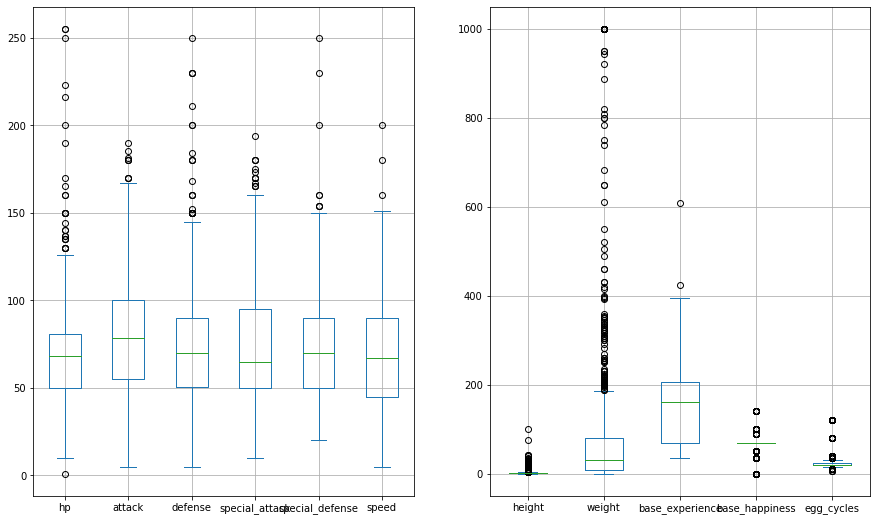

In [39]:
fig, (ax0,ax1) = plt.subplots(1, 2, figsize=(15, 9))
pokedex[stats].plot.box(grid=True, ax=ax0)
pokedex[traits].plot.box(grid=True, ax=ax1)
plt.show()

Osserviamo adesso i Box Plot della somma delle statistiche di base, metrica utilizzata nel meta-game per introdurre dei cap nei tornei ufficiali, per ognuna delle quattro categorie di Pokémon.

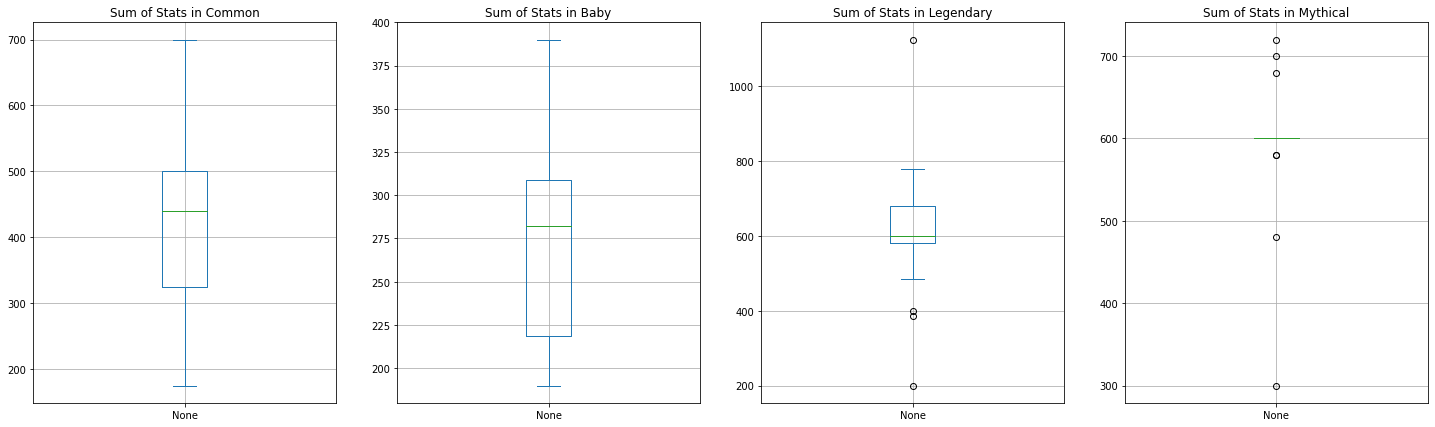

In [40]:
common_stats = common[stats]
baby_stats = baby[stats]
leg_stats = leg[stats]
myth_stats = myth[stats]

common_sum_stats = common_stats.sum(1)
baby_sum_stats = baby_stats.sum(1)
leg_sum_stats = leg_stats.sum(1)
myth_sum_stats = myth_stats.sum(1)

plt.figure(figsize=(25,7))
plt.subplot(1,4,1)
plt.title("Sum of Stats in Common")
common_sum_stats.plot.box(grid=True)
plt.subplot(1,4,2)
plt.title("Sum of Stats in Baby")
baby_sum_stats.plot.box(grid=True)
plt.subplot(1,4,3)
plt.title("Sum of Stats in Legendary")
leg_sum_stats.plot.box(grid=True)
plt.subplot(1,4,4)
plt.title("Sum of Stats in Mythical")
myth_sum_stats.plot.box(grid=True)
plt.show()

Se le prime due sotto-popolazioni hanno dei valori nella norma (escludendo gli estremi superiori ed inferiori nella categoria `Common`, causati da molte forme *Mega*/*Gigamax* nel primo caso, e da Pokémon estremamente deboli nel secondo), è possibile notare degli outlier tra i leggendari e i mitici. Si tratta in questo caso di Pokémon con statistiche così tanto fuori scala, da avere una somma delle statistiche di base più unica, che rara: si tratta del caso di *Eternatus Eternamax* per i leggendari e *Arceus* per i mitici.

Cionondimeno, potrebbe essere interessante analizzare più approfonditamente le statistiche di base, prese singolarmente.

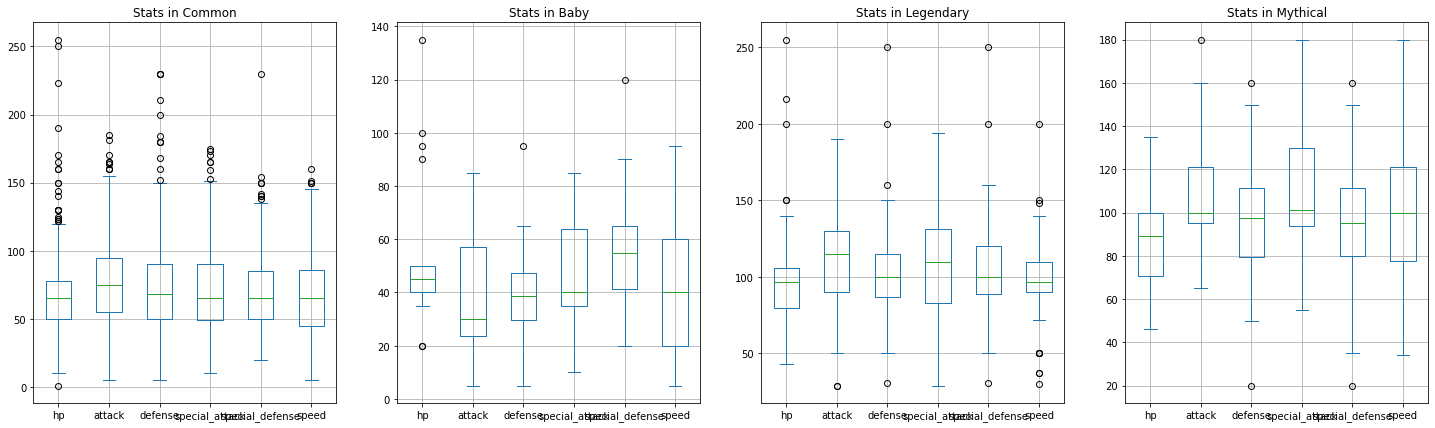

In [41]:
fig, (ax0,ax1,ax2,ax3) = plt.subplots(1, 4, figsize=(25, 7))

common_stats.plot.box(grid=True, title="Stats in Common", ax=ax0)
baby_stats.plot.box(grid=True, title="Stats in Baby", ax=ax1)
leg_stats.plot.box(grid=True, title="Stats in Legendary", ax=ax2)
myth_stats.plot.box(grid=True, title="Stats in Mythical", ax=ax3)
plt.show()

Osserviamo adesso i box plot di tutti i dati secondari, presi singolarmente per ognuna delle sotto-popolazioni.

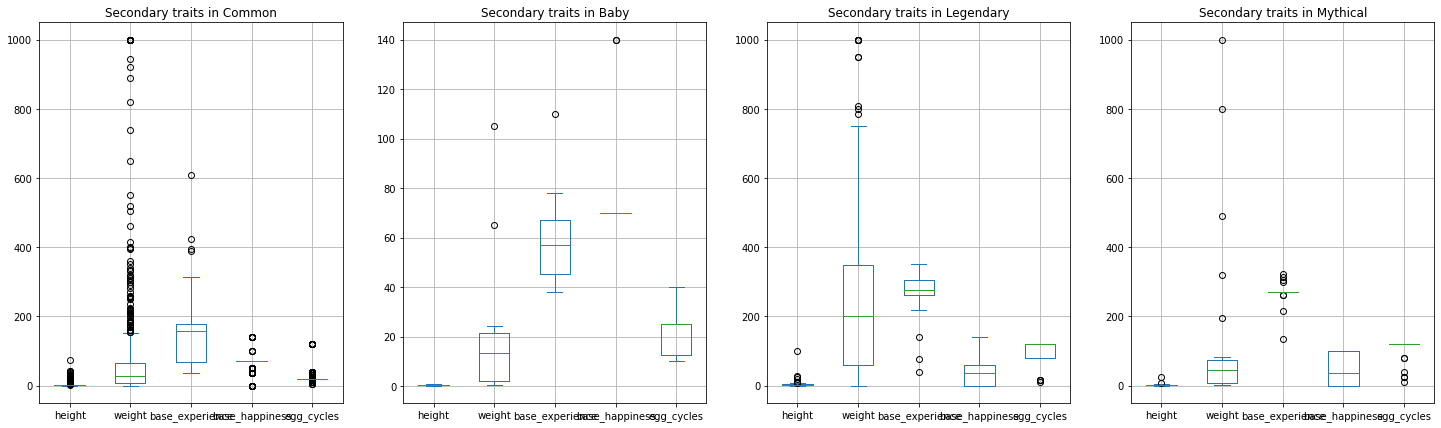

In [42]:
common_traits = common[traits]
baby_traits = baby[traits]
leg_traits = leg[traits]
myth_traits = myth[traits]

fig, (ax0,ax1,ax2,ax3) = plt.subplots(1, 4, figsize=(25, 7))

common_traits.plot.box(grid=True, title="Secondary traits in Common", ax=ax0)
baby_traits.plot.box(grid=True, title="Secondary traits in Baby", ax=ax1)
leg_traits.plot.box(grid=True, title="Secondary traits in Legendary", ax=ax2)
myth_traits.plot.box(grid=True, title="Secondary traits in Mythical", ax=ax3)
plt.show()

### 4.3.3 Distribuzioni di probabilità e indici di forma

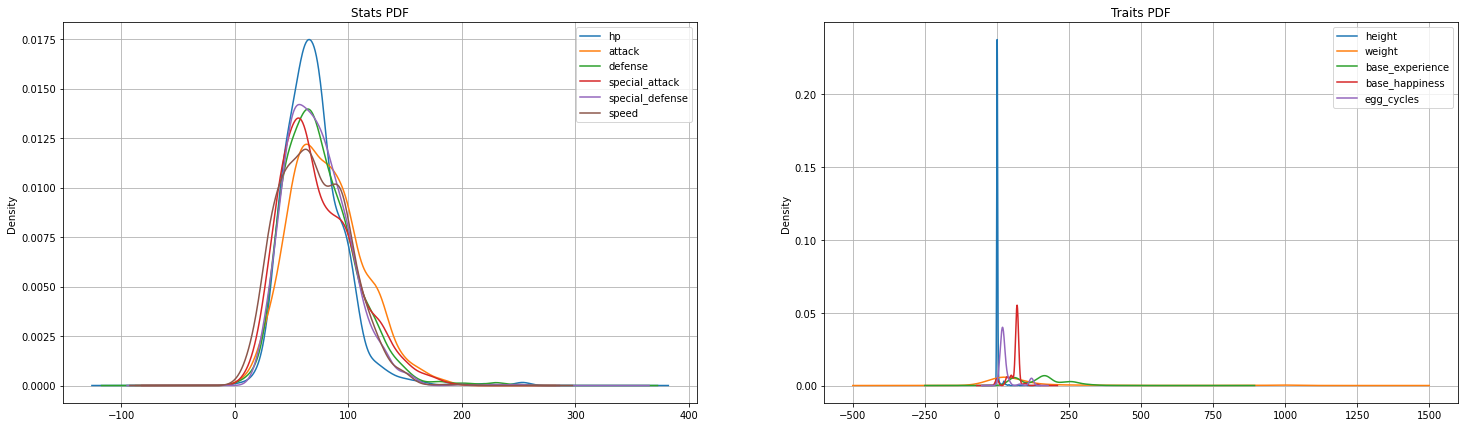

In [43]:
fig, (ax0,ax1) = plt.subplots(1, 2, figsize=(25, 7))
pokedex[stats].plot.density(grid=True, ax=ax0, title="Stats PDF")
pokedex[traits].plot.density(grid=True, ax=ax1, title="Traits PDF")
plt.show()

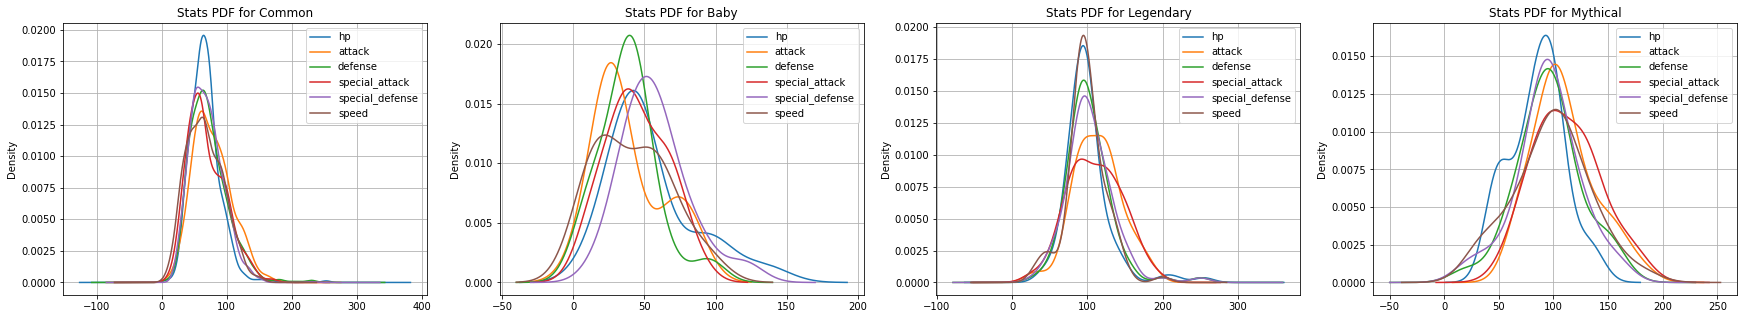

In [44]:
fig, (ax0,ax1,ax2,ax3) = plt.subplots(1, 4, figsize=(30, 5))

common[stats].plot.density(grid=True, ax=ax0, title="Stats PDF for Common")
baby[stats].plot.density(grid=True, ax=ax1, title="Stats PDF for Baby")
leg[stats].plot.density(grid=True, ax=ax2, title="Stats PDF for Legendary")
myth[stats].plot.density(grid=True, ax=ax3, title="Stats PDF for Mythical")
plt.show()

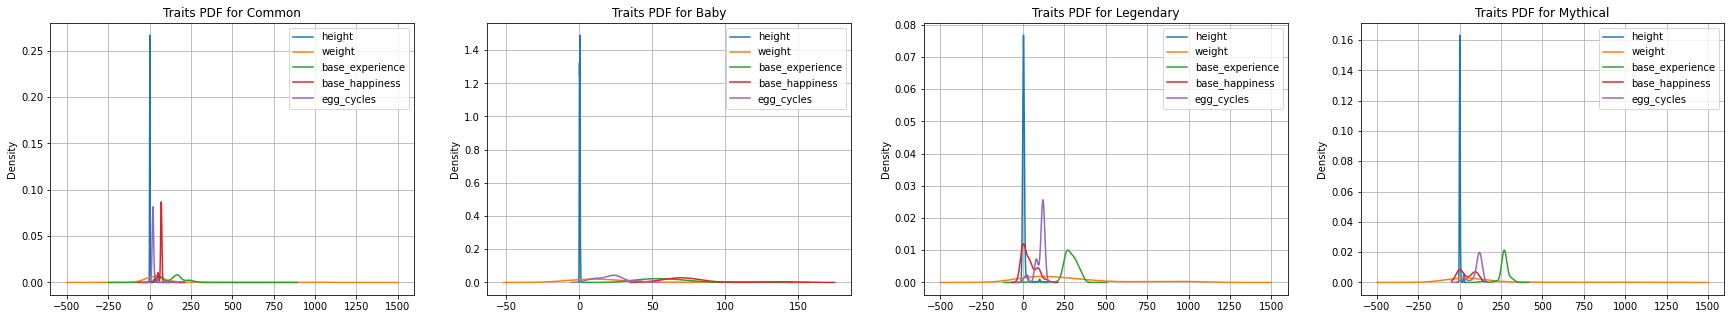

In [45]:
fig, (ax0,ax1,ax2,ax3) = plt.subplots(1, 4, figsize=(30, 5))

common[traits].plot.density(grid=True, ax=ax0, title="Traits PDF for Common")
baby[traits].plot.density(grid=True, ax=ax1, title="Traits PDF for Baby")
leg[traits].plot.density(grid=True, ax=ax2, title="Traits PDF for Legendary")
myth[traits].plot.density(grid=True, ax=ax3, title="Traits PDF for Mythical")
plt.show()

#### Asimmetria

Osserviamo anzitutto il momento terzo sugli attributi dell'intero Pokédex in generale.

In [46]:
pokedex[attr].skew()

hp                 1.755288
attack             0.473899
defense            1.135564
special_attack     0.712850
special_defense    0.909908
speed              0.389070
capture_rate       0.953397
female_rate       -0.087154
genderless         1.911884
height             8.613147
weight             3.465405
base_experience    0.464897
base_happiness    -1.046097
egg_cycles         2.419157
dtype: float64

È possibile osservare come i dati siano prevalentemente, anche se di poco, distribuiti a destra, visti gli indici positivi, confermando quanto visto nelle gaussiane relative a tutti i valori numerici che caratterizzano i Pokémon. Fa eccezione a questa regola solamente la colonna `female_rate`, la quale è leggermente sbilanciata verso sinistra (essendo vicina a zero, potremmo dire che approssimativamente simmetrica), e la colonna `base_happiness`.

Andiamo ad analizzare la skewness in base alle sotto-popolazioni.

In [47]:
common_skew = common.skew()
baby_skew = baby.skew()
leg_skew = leg.skew()
myth_skew = myth.skew()

subpop_skew = pd.concat([common_skew, baby_skew, leg_skew, myth_skew], axis=1).transpose().set_axis(subpops)
subpop_skew

hp    attack   defense  special_attack  special_defense  \
Common     1.812839  0.498146  1.251606        0.676980         0.750252   
Baby       1.460660  0.841359  0.930486        0.171075         1.060705   
Legendary  2.376294  0.011294  1.645293        0.058997         1.301581   
Mythical   0.012057  0.676745 -0.015272        0.345818        -0.259245   

              speed  capture_rate  female_rate  genderless    height  \
Common     0.384709      0.963669    -0.220435    3.305803  7.013988   
Baby       0.432583      0.370777     0.193556    0.000000  0.400634   
Legendary  0.299722      3.267813     4.588017   -1.563480  7.369057   
Mythical  -0.008444      2.086084     0.000000    0.000000  5.055854   

             weight  base_experience  base_happiness  egg_cycles  
Common     4.014828         0.547650       -0.823660    5.854562  
Baby       2.483817         1.453678        2.705788    0.392041  
Legendary  1.399683        -2.352290        0.914777   -2.168584  
Mythical   2.961922        -2.713770        0.160397   -2.128205

Anche in questo caso è possibile notare come prevalentemente gli indici siano positivi, e come quindi per la maggior parte degli attributi, i valori siano raggruppati verso destra. Per quanto concerne questi andamenti positivi, notiamo come i maggior indici di asimmetria sono quelli relativi ai leggendari (eccetto che per la colonna `special_attack`, la quale è approssimativamente simmetrica): il più estremo da questo punto di vista è quello relativo al tratto secondario `height`, come anche confermato dalla gaussiana presentata nel precedente paragrafo.

L'unico indice nullo è quello relativo al `female_rate` per i misteriosi, vista la mancanza di esemplari femminili per questa categoria. In realtà, relativamente a questa sottopopolazione, molte delle caratteristiche utilizzate in battaglia hanno un indice di skewness approssimativamente vicino a zero (negativamente o positivamente), fa accezione da questo punto di vista solamente quello relativo all'altezza, il quale ha valori prevalentemente raggruppati verso destra.

#### Curtosi
Generalmente, gli eccessi di curtosi sono molto variegati sulla popolazione dell'intero dataset. Prevalentemente gli attributi sono caratterizzati da curve leptocurtiche, con eccezione per `attack`, praticamente mesocurtico in quanto approssimativamente vicino a zero, e `speed`, `capture_rate` e `female_rate`, i quali sono contraddistinti da curve piane.

Tra tutti gli indicatori, spicca quello relativo a `height`, il quale - come possibile notare anche dalla PDF sopra presentata - è contraddistinto da una curva molto appuntita.

In [48]:
pokedex[attr].kurt()

hp                   8.037117
attack               0.003433
defense              2.864594
special_attack       0.182917
special_defense      2.304217
speed               -0.115302
capture_rate        -0.370264
female_rate         -0.248646
genderless           1.658265
height             104.512170
weight              11.607012
base_experience      0.224770
base_happiness       3.925261
egg_cycles           4.303882
dtype: float64

Analizziamo adesso il medesimo momento quarto relativamente alle diverse categorie di Pokémon individuate.

In [49]:
common_kurt = common.kurt()
baby_kurt = baby.kurt()
leg_kurt = leg.kurt()
myth_kurt = myth.kurt()

subpop_kurt = pd.concat([common_kurt, baby_kurt, leg_kurt, myth_kurt], axis=1).transpose().set_axis(subpops)
subpop_kurt

hp    attack   defense  special_attack  special_defense  \
Common     9.375637  0.030820  3.201265        0.138682         1.457473   
Baby       1.742033 -0.627194  2.370033       -0.727395         1.752873   
Legendary  9.074176  0.247930  6.683414       -0.430270         4.842542   
Mythical  -0.356438  0.110536  0.735267       -0.334050         0.957446   

              speed  capture_rate  female_rate  genderless     height  \
Common    -0.309793     -0.507003     0.565662    8.946568  63.962522   
Baby      -0.698236     -0.705475    -0.626393    0.000000  -0.286703   
Legendary  2.552849      9.292452    20.505944    0.454383  60.579076   
Mythical   0.087725      2.632556     0.000000    0.000000  26.985527   

              weight  base_experience  base_happiness  egg_cycles  
Common     15.841029         1.629595        9.675228   40.979031  
Baby        6.619880         3.197322        5.976563    0.069738  
Legendary   0.968060         9.648419       -0.218583    4.361529  
Mythical    8.551915        12.751312       -1.919330    3.150374

Osservando gli indici per categoria, è interessante notare come il maggior eccesso di curtosi della popolazione sia causato prevalentemente dalle altezze presenti nelle due categorie, `Legendary` e `Common` soprattutto. Sulla categoria `Baby`, si trova invece una curva platicurtica relativa al rispettivo attributo `height`. 

Sui `Mythical`, invece, è possibile notare una distribuzione rappresentata da una curva mesocurtica, indice non dissimile al momento terzo, considerando che in questa categoria non sono presenti esemplari femminili, e che quindi la loro probabilità di ritrovamento è praticamente nulla.

# 5. Analisi delle distribuzioni e fitting
Prendiamo come riferimento per una seconda volta la somma delle statistiche d'attacco dell'intero Pokédex, e verifichiamo quanto effettivamente la sua distribuzione segue un fitting gaussiano.

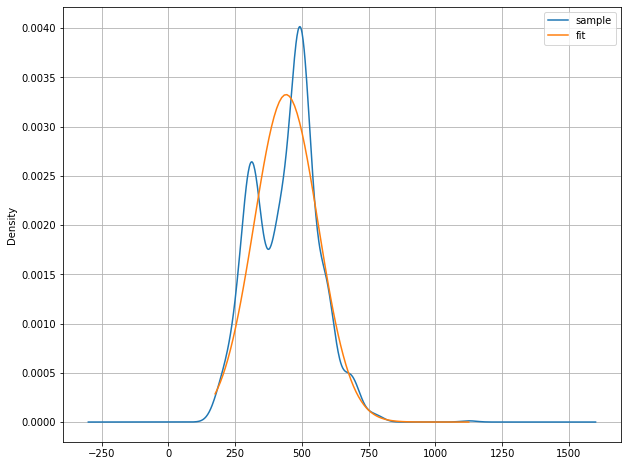

In [50]:
sample = pokedex[stats].sum(1)
plt.figure(figsize=(10,8))
pd.Series(sample).plot.density()
g=norm(*norm.fit(sample))
x=np.linspace(sample.min(),sample.max(),100)
plt.plot(x,g.pdf(x))
plt.grid()
plt.legend(['sample','fit'])
plt.show()

Osservando i grafici delle normali, ci rendiamo conto che i dati sono effettivamente approssimabili ad una normale. Rispetto al suo fit, notiamo che, come anche già detto in precedenza, la distribuzione dei dati ha due mode.

Andiamo a verificare lo stesso tipo di distribuzione in base alle quattro sotto-popolazioni presenti nel dataset.

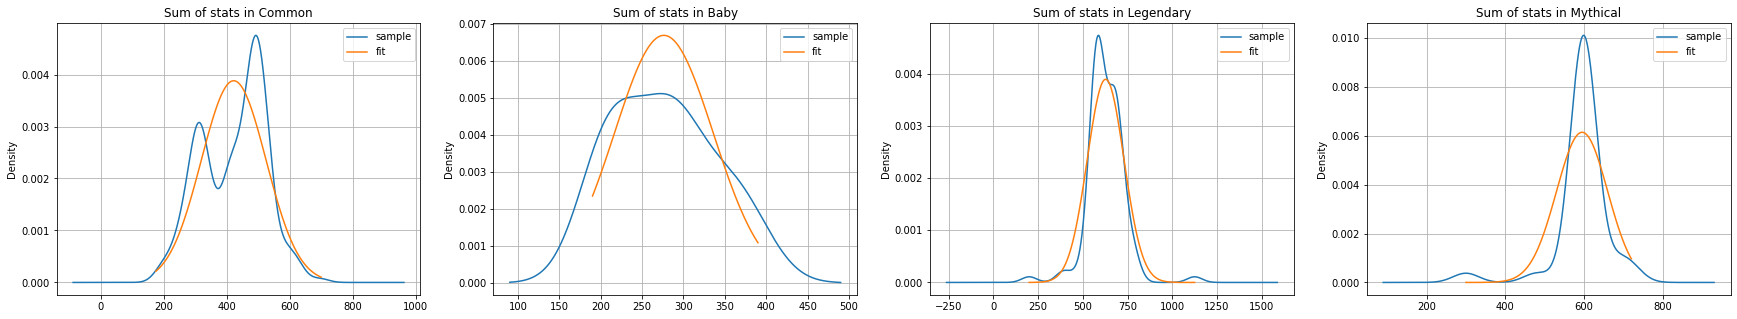

In [51]:
sample_common = common[stats].sum(1)
sample_leg = leg[stats].sum(1)
sample_baby = baby[stats].sum(1)
sample_myth = myth[stats].sum(1)

samples = [sample_common, sample_baby, sample_leg, sample_myth]
axes = [ax0,ax1,ax2,ax3]

fig, axes = plt.subplots(1, 4, figsize=(30, 5))
s = 0
ax = 0
while s < len(samples) and ax < len(axes):
    pd.Series(samples[s]).plot.density(ax=axes[ax], grid=True, title="Sum of stats in " + subpops[s])
    g=norm(*norm.fit(samples[s]))
    x=np.linspace(samples[s].min(),samples[s].max(),100)
    axes[ax].plot(x,g.pdf(x))
    axes[ax].legend(['sample','fit'])

    s += 1
    ax += 1


Si può notare come prevalentemente tutte le sotto-popolazioni abbiano un buon fitting gaussiano. Ci sono tuttavia una serie di considerazioni da fare per ognuna di esse:
- per quanto riguarda `Common`, notiamo un andamento molto simile a quello dell'intero dataset: ciò ha senso se consideriamo che la sua maggioranza di esemplari è contenuto in questo gruppo. Per cui, le due mode di distribuzione della somma delle statistiche, dipendono principalmente da questa classe;
- su `Baby`, il fitting gaussiano è leggermente più rialzato rispetto al reale andamento dei dati:
- su `Legendary`, il fitting gaussiano è molto buono;
- su `Mythicals`, la differenza è più che altro relativa all'altezza della normale che rappresenta i dati, rispetto alla normale di riferimento per il fitting.

Confermiamo (o smentiamo, a seconda dei futuri risultati) quanto detto eseguendo un test di gaussianità basato sui Q-Q plot.

## 5.1 Q-Q Plot
Diamo anzitutto un'occhiata al Q-Q plot relativo alla somma delle statistiche poer l'intero dataset.

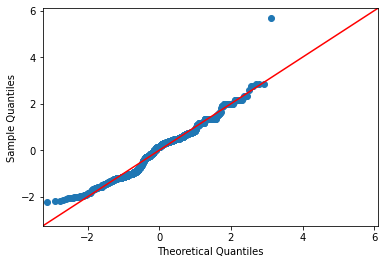

In [52]:
qqplot(sample, fit=True, line='45')
plt.show()

Possiamo notare che la distribuzione assume un buon fitting secondo il grafico, principalmente dai valori Z-scored nell'intervallo $[-2,3]$, confermando quanto visto in precedenza.

Andiamo tuttavia ad analizzare tutte i valori, presi singolarmente, sia relativamente alle statistiche, sia relativamente ai tratti secondari, in modo da verificare quanto visto nei grafici delle PDF visti all'inizio di questo paragrafo.

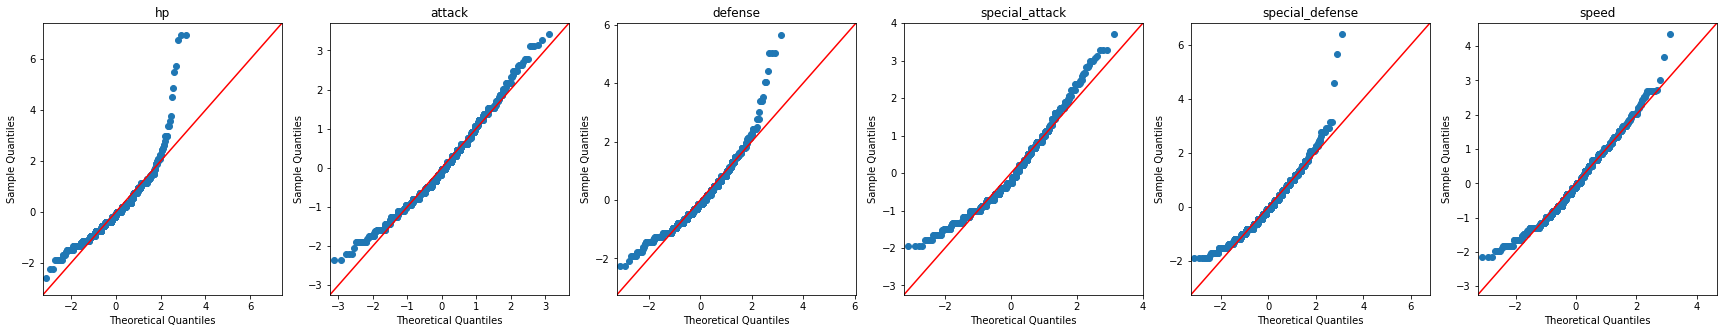

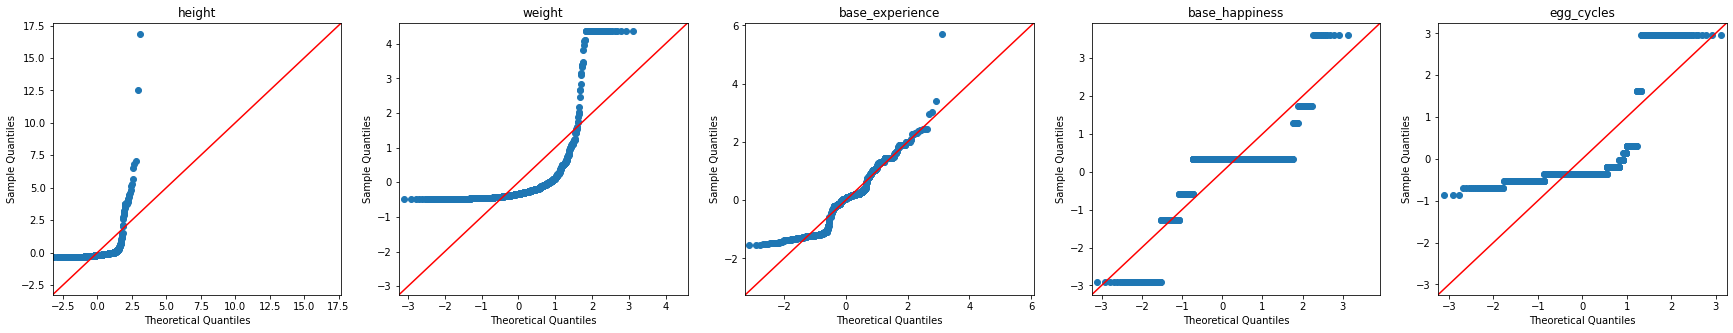

In [53]:
fig, axis = plt.subplots(1, 6, figsize=(30, 5))

for i in range(len(stats)):
    axis[i].set_title(stats[i])
    qqplot(pokedex[stats[i]], fit=True, line='45', ax=axis[i])

fig, axis = plt.subplots(1, len(traits), figsize=(30, 5))

for i in range(len(traits)):
    axis[i].set_title(traits[i])
    qqplot(pokedex[traits[i]], fit=True, line='45', ax=axis[i])
 

Per quanto concerne i le statistiche di lotta prese singolarmente, è possibile notare che tutte seguono un buon fitting solamente in alcuni intervalli interquantili, ma tutti i grafici sono accumulati dall'essere asimmetrici a destra: il che spiega per quale motivo tutte le PDF mostrate verso l'inizio di questo paragrafo sono "ammassate" verso la destra del loro intervallo di definizione.

Generalmente, per i tratti secondari, notiamo che nessuna delle loro distribuzioni segue un buon fitting gaussiano (il che ha anche senso, osservando le PDF viste prima). Fa eccezione solamente la distribuzione dell'esperienza di base, che sembra assumere approssimativamente un fitting accettabile tra il quantile 0 ed il quantile 3.

# 6. Correlazione

Eseguiamo adesso una valutazione della correlazione tra le colonne del dataset.

Cominciamo, innanzitutto, con le colonne che abbiamo esaminato sino ad adesso, ossia quelle relative agli attributi (sia statistiche di lotta e tratti secondari) di ogni singolo esemplare di Pokémon.

In [54]:
pokedex[attr].corr('pearson')

hp    attack   defense  special_attack  \
hp               1.000000  0.455912  0.312629        0.365686   
attack           0.455912  1.000000  0.458357        0.361679   
defense          0.312629  0.458357  1.000000        0.222580   
special_attack   0.365686  0.361679  0.222580        1.000000   
special_defense  0.391004  0.258264  0.544277        0.499168   
speed            0.154257  0.352437 -0.013382        0.428419   
capture_rate    -0.443778 -0.506777 -0.423743       -0.504598   
female_rate     -0.155032 -0.302479 -0.205195       -0.294853   
genderless       0.233678  0.251055  0.281931        0.358094   
height           0.289908  0.183406  0.202732        0.160325   
weight           0.364185  0.326237  0.346026        0.190902   
base_experience  0.655302  0.643654  0.546189        0.684522   
base_happiness  -0.179910 -0.307345 -0.225063       -0.248395   
egg_cycles       0.393290  0.388185  0.291850        0.417802   

                 special_defense     speed  capture_rate  female_rate  \
hp                      0.391004  0.154257     -0.443778    -0.155032   
attack                  0.258264  0.352437     -0.506777    -0.302479   
defense                 0.544277 -0.013382     -0.423743    -0.205195   
special_attack          0.499168  0.428419     -0.504598    -0.294853   
special_defense         1.000000  0.201756     -0.482524    -0.207526   
speed                   0.201756  1.000000     -0.382360    -0.250477   
capture_rate           -0.482524 -0.382360      1.000000     0.363640   
female_rate            -0.207526 -0.250477      0.363640     1.000000   
genderless              0.330415  0.272590     -0.309216    -0.660757   
height                  0.194405  0.079226     -0.089921    -0.070342   
weight                  0.233649  0.041164     -0.219305    -0.168299   
base_experience         0.668664  0.511423     -0.659548    -0.334973   
base_happiness         -0.157103 -0.169636      0.167677     0.315458   
egg_cycles              0.332685  0.326779     -0.366071    -0.509340   

                 genderless    height    weight  base_experience  \
hp                 0.233678  0.289908  0.364185         0.655302   
attack             0.251055  0.183406  0.326237         0.643654   
defense            0.281931  0.202732  0.346026         0.546189   
special_attack     0.358094  0.160325  0.190902         0.684522   
special_defense    0.330415  0.194405  0.233649         0.668664   
speed              0.272590  0.079226  0.041164         0.511423   
capture_rate      -0.309216 -0.089921 -0.219305        -0.659548   
female_rate       -0.660757 -0.070342 -0.168299        -0.334973   
genderless         1.000000  0.046673  0.188549         0.429720   
height             0.046673  1.000000  0.752764         0.231081   
weight             0.188549  0.752764  1.000000         0.364134   
base_experience    0.429720  0.231081  0.364134         1.000000   
base_happiness    -0.452530 -0.170528 -0.299538        -0.291493   
egg_cycles         0.680416  0.132047  0.281722         0.546382   

                 base_happiness  egg_cycles  
hp                    -0.179910    0.393290  
attack                -0.307345    0.388185  
defense               -0.225063    0.291850  
special_attack        -0.248395    0.417802  
special_defense       -0.157103    0.332685  
speed                 -0.169636    0.326779  
capture_rate           0.167677   -0.366071  
female_rate            0.315458   -0.509340  
genderless            -0.452530    0.680416  
height                -0.170528    0.132047  
weight                -0.299538    0.281722  
base_experience       -0.291493    0.546382  
base_happiness         1.000000   -0.547297  
egg_cycles            -0.547297    1.000000

I valori della correlazione secondo **Pearson** sembrano confermare in linea generale le analisi effettuate in precedenza.

Relativamente alle statistiche (ognuna di esse rispetto alle altre), notiamo indici che mostrano una lieve correlazione positiva, tranne che per la velocità rispetto alla difesa, che paiono non essere particolarmente correlate.

Una forte correlazione (negativa) è quella del tasso di cattura rispetto alle varie statistiche di lotta: ciò ha senso, perché Pokémon più forti hanno minor tasso di cattura e sono più "testardi" nel farsi catturare (come quanto affermato in precedenza, relativamente ai Leggendari e ai loro valori medi).
Una forte correlazione positiva è espressa invece dall'esperienza di base, rispetto alle statistiche di lotta considerate: infatti, più è forte il Pokémon sconfitto, maggiore esperienza farà guadagnare al proprio, al termine della battaglia. 
Altri interessanti indici da osservare, sono quelli in corrispondenza dell'attributo `egg_cycles`: relativamente al rapporto con le statistiche, troviamo lievi indici di correlazione positiva, ma le maggiori correlazioni sono presentate dal rapporto rispetto alla `female_rate` (negativa), rispetto alla `base_experience` (positiva), e rispetto alla `base_happiness` (negativa anch'essa); infatti, un Pokémon con alta probabilità di essere trovato di sesso femminile, ha generalmente bisogno di più tempo per uscire dal suo uovo, così come ne hanno bisogno Pokémon che garantiscono un maggior cumulativo di esperienza se sconfitti (e quindi, più forti o più rari) e come ne hanno bisogno altri che hanno minor cumulativo di "affetto" alla loro nascita (in quanto, nella fauna sarebbero più rari). 

Si può notare, invece, come la più blanda correlazione sia rappresentata dagli indici di altezza e di peso, tutti molto vicini allo zero: concludiamo quindi, che tratti come l'altezza o il peso hanno, in generale, poco a che fare con la forza di un Pokémon. Un semplice esempio potrebbe essere dato dalla correlazione tra peso e velocità: logica vorrebbe che Pokémon più pesanti siano più lenti, eppure l'indice di correlazione in corrispondenza di questi due attributi è quello più vicino allo zero, e quindi quello che più, tra tutti, indica una mancanza di correlazione.

Vista la presenza di alcuni outlier (soprattutto in presenza di leggendari e forme *Gigamax*), osserviamo indici più robusti del coefficiente di Pearson.

In [55]:
pokedex[attr].corr('spearman')

hp    attack   defense  special_attack  \
hp               1.000000  0.587648  0.465905        0.472056   
attack           0.587648  1.000000  0.514515        0.351676   
defense          0.465905  0.514515  1.000000        0.310931   
special_attack   0.472056  0.351676  0.310931        1.000000   
special_defense  0.485430  0.312357  0.598619        0.562087   
speed            0.226226  0.341000  0.041170        0.418245   
capture_rate    -0.492197 -0.514128 -0.465402       -0.538716   
female_rate     -0.188033 -0.294176 -0.226958       -0.295276   
genderless       0.219146  0.230441  0.292639        0.328045   
height           0.640472  0.602063  0.487390        0.460222   
weight           0.607439  0.566388  0.528571        0.334012   
base_experience  0.724470  0.688395  0.639289        0.709814   
base_happiness  -0.134949 -0.230927 -0.165740       -0.159093   
egg_cycles       0.312577  0.356412  0.305645        0.360931   

                 special_defense     speed  capture_rate  female_rate  \
hp                      0.485430  0.226226     -0.492197    -0.188033   
attack                  0.312357  0.341000     -0.514128    -0.294176   
defense                 0.598619  0.041170     -0.465402    -0.226958   
special_attack          0.562087  0.418245     -0.538716    -0.295276   
special_defense         1.000000  0.244665     -0.523393    -0.234913   
speed                   0.244665  1.000000     -0.401439    -0.248614   
capture_rate           -0.523393 -0.401439      1.000000     0.492694   
female_rate            -0.234913 -0.248614      0.492694     1.000000   
genderless              0.315276  0.249877     -0.431895    -0.693627   
height                  0.464096  0.273560     -0.465496    -0.181543   
weight                  0.428625  0.146739     -0.421366    -0.231140   
base_experience         0.715204  0.515328     -0.714094    -0.362316   
base_happiness         -0.100234 -0.096056      0.206808     0.225905   
egg_cycles              0.312184  0.210883     -0.531917    -0.463661   

                 genderless    height    weight  base_experience  \
hp                 0.219146  0.640472  0.607439         0.724470   
attack             0.230441  0.602063  0.566388         0.688395   
defense            0.292639  0.487390  0.528571         0.639289   
special_attack     0.328045  0.460222  0.334012         0.709814   
special_defense    0.315276  0.464096  0.428625         0.715204   
speed              0.249877  0.273560  0.146739         0.515328   
capture_rate      -0.431895 -0.465496 -0.421366        -0.714094   
female_rate       -0.693627 -0.181543 -0.231140        -0.362316   
genderless         1.000000  0.133652  0.182244         0.404299   
height             0.133652  1.000000  0.857008         0.693885   
weight             0.182244  0.857008  1.000000         0.610520   
base_experience    0.404299  0.693885  0.610520         1.000000   
base_happiness    -0.339196 -0.265743 -0.261529        -0.225186   
egg_cycles         0.494460  0.322566  0.324366         0.409212   

                 base_happiness  egg_cycles  
hp                    -0.134949    0.312577  
attack                -0.230927    0.356412  
defense               -0.165740    0.305645  
special_attack        -0.159093    0.360931  
special_defense       -0.100234    0.312184  
speed                 -0.096056    0.210883  
capture_rate           0.206808   -0.531917  
female_rate            0.225905   -0.463661  
genderless            -0.339196    0.494460  
height                -0.265743    0.322566  
weight                -0.261529    0.324366  
base_experience       -0.225186    0.409212  
base_happiness         1.000000   -0.353893  
egg_cycles            -0.353893    1.000000

In [56]:
pokedex[attr].corr('kendall')

hp    attack   defense  special_attack  \
hp               1.000000  0.431030  0.348791        0.336539   
attack           0.431030  1.000000  0.371794        0.247920   
defense          0.348791  0.371794  1.000000        0.215975   
special_attack   0.336539  0.247920  0.215975        1.000000   
special_defense  0.349075  0.216648  0.467821        0.415196   
speed            0.154061  0.237029  0.027110        0.296788   
capture_rate    -0.370806 -0.382334 -0.349688       -0.408188   
female_rate     -0.148389 -0.230812 -0.178757       -0.232394   
genderless       0.182311  0.190652  0.242884        0.271918   
height           0.481316  0.438667  0.357136        0.328533   
weight           0.444477  0.404485  0.383257        0.228702   
base_experience  0.546615  0.509977  0.473748        0.529664   
base_happiness  -0.107181 -0.183587 -0.130972       -0.127687   
egg_cycles       0.242900  0.274187  0.235206        0.279313   

                 special_defense     speed  capture_rate  female_rate  \
hp                      0.349075  0.154061     -0.370806    -0.148389   
attack                  0.216648  0.237029     -0.382334    -0.230812   
defense                 0.467821  0.027110     -0.349688    -0.178757   
special_attack          0.415196  0.296788     -0.408188    -0.232394   
special_defense         1.000000  0.170086     -0.396979    -0.186509   
speed                   0.170086  1.000000     -0.291935    -0.194834   
capture_rate           -0.396979 -0.291935      1.000000     0.417516   
female_rate            -0.186509 -0.194834      0.417516     1.000000   
genderless              0.261978  0.206657     -0.374856    -0.651779   
height                  0.338901  0.190919     -0.363061    -0.144692   
weight                  0.304288  0.100718     -0.315408    -0.180953   
base_experience         0.535545  0.362548     -0.583194    -0.282856   
base_happiness         -0.079406 -0.076176      0.174928     0.202252   
egg_cycles              0.241921  0.160236     -0.446772    -0.405390   

                 genderless    height    weight  base_experience  \
hp                 0.182311  0.481316  0.444477         0.546615   
attack             0.190652  0.438667  0.404485         0.509977   
defense            0.242884  0.357136  0.383257         0.473748   
special_attack     0.271918  0.328533  0.228702         0.529664   
special_defense    0.261978  0.338901  0.304288         0.535545   
speed              0.206657  0.190919  0.100718         0.362548   
capture_rate      -0.374856 -0.363061 -0.315408        -0.583194   
female_rate       -0.651779 -0.144692 -0.180953        -0.282856   
genderless         1.000000  0.111592  0.149169         0.332092   
height             0.111592  1.000000  0.709258         0.525790   
weight             0.149169  0.709258  1.000000         0.441259   
base_experience    0.332092  0.525790  0.441259         1.000000   
base_happiness    -0.322884 -0.209917 -0.202392        -0.179776   
egg_cycles         0.450506  0.253317  0.248810         0.318767   

                 base_happiness  egg_cycles  
hp                    -0.107181    0.242900  
attack                -0.183587    0.274187  
defense               -0.130972    0.235206  
special_attack        -0.127687    0.279313  
special_defense       -0.079406    0.241921  
speed                 -0.076176    0.160236  
capture_rate           0.174928   -0.446772  
female_rate            0.202252   -0.405390  
genderless            -0.322884    0.450506  
height                -0.209917    0.253317  
weight                -0.202392    0.248810  
base_experience       -0.179776    0.318767  
base_happiness         1.000000   -0.323412  
egg_cycles            -0.323412    1.000000

Osservando gli indici di **Spearman** prima e di **Kendall** successivamente, notiamo come vi siano delle evidenti differenze rispetto all'indice di Pearson.\
In entrambi i casi, infatti, si registra una più evidente correlazione tra tratti secondari, come peso e altezza, e le varie statistiche di lotta, soprattutto nel caso di Spearman: addirittura, osservando il rapporto tra altezza e HP, si registra un valore circa due volte maggiore. Considerando che questi due indici sono molto meno sensibili agli outlier, rispetto al primo utilizzato, è possibile affermare che una buona dose di record con caratteristiche estreme abbia "inquinato" la correlazione secondo Pearson.

Altre caratteristiche già correlate in precendenza, invece, in questi due nuovi casi studio diventano ancora più evidenti. Si noti, per esempio, come secondo Spearman vi sia una correlazione molto forte tra quantitativo di punti vita e esperienza fornita alla fine di una lotta.

Per quanto riguarda Kendall, in generale sembra fornire indici nella via di mezzo tra Pearson e Spearman, ma che comunque confermano quanto detto.

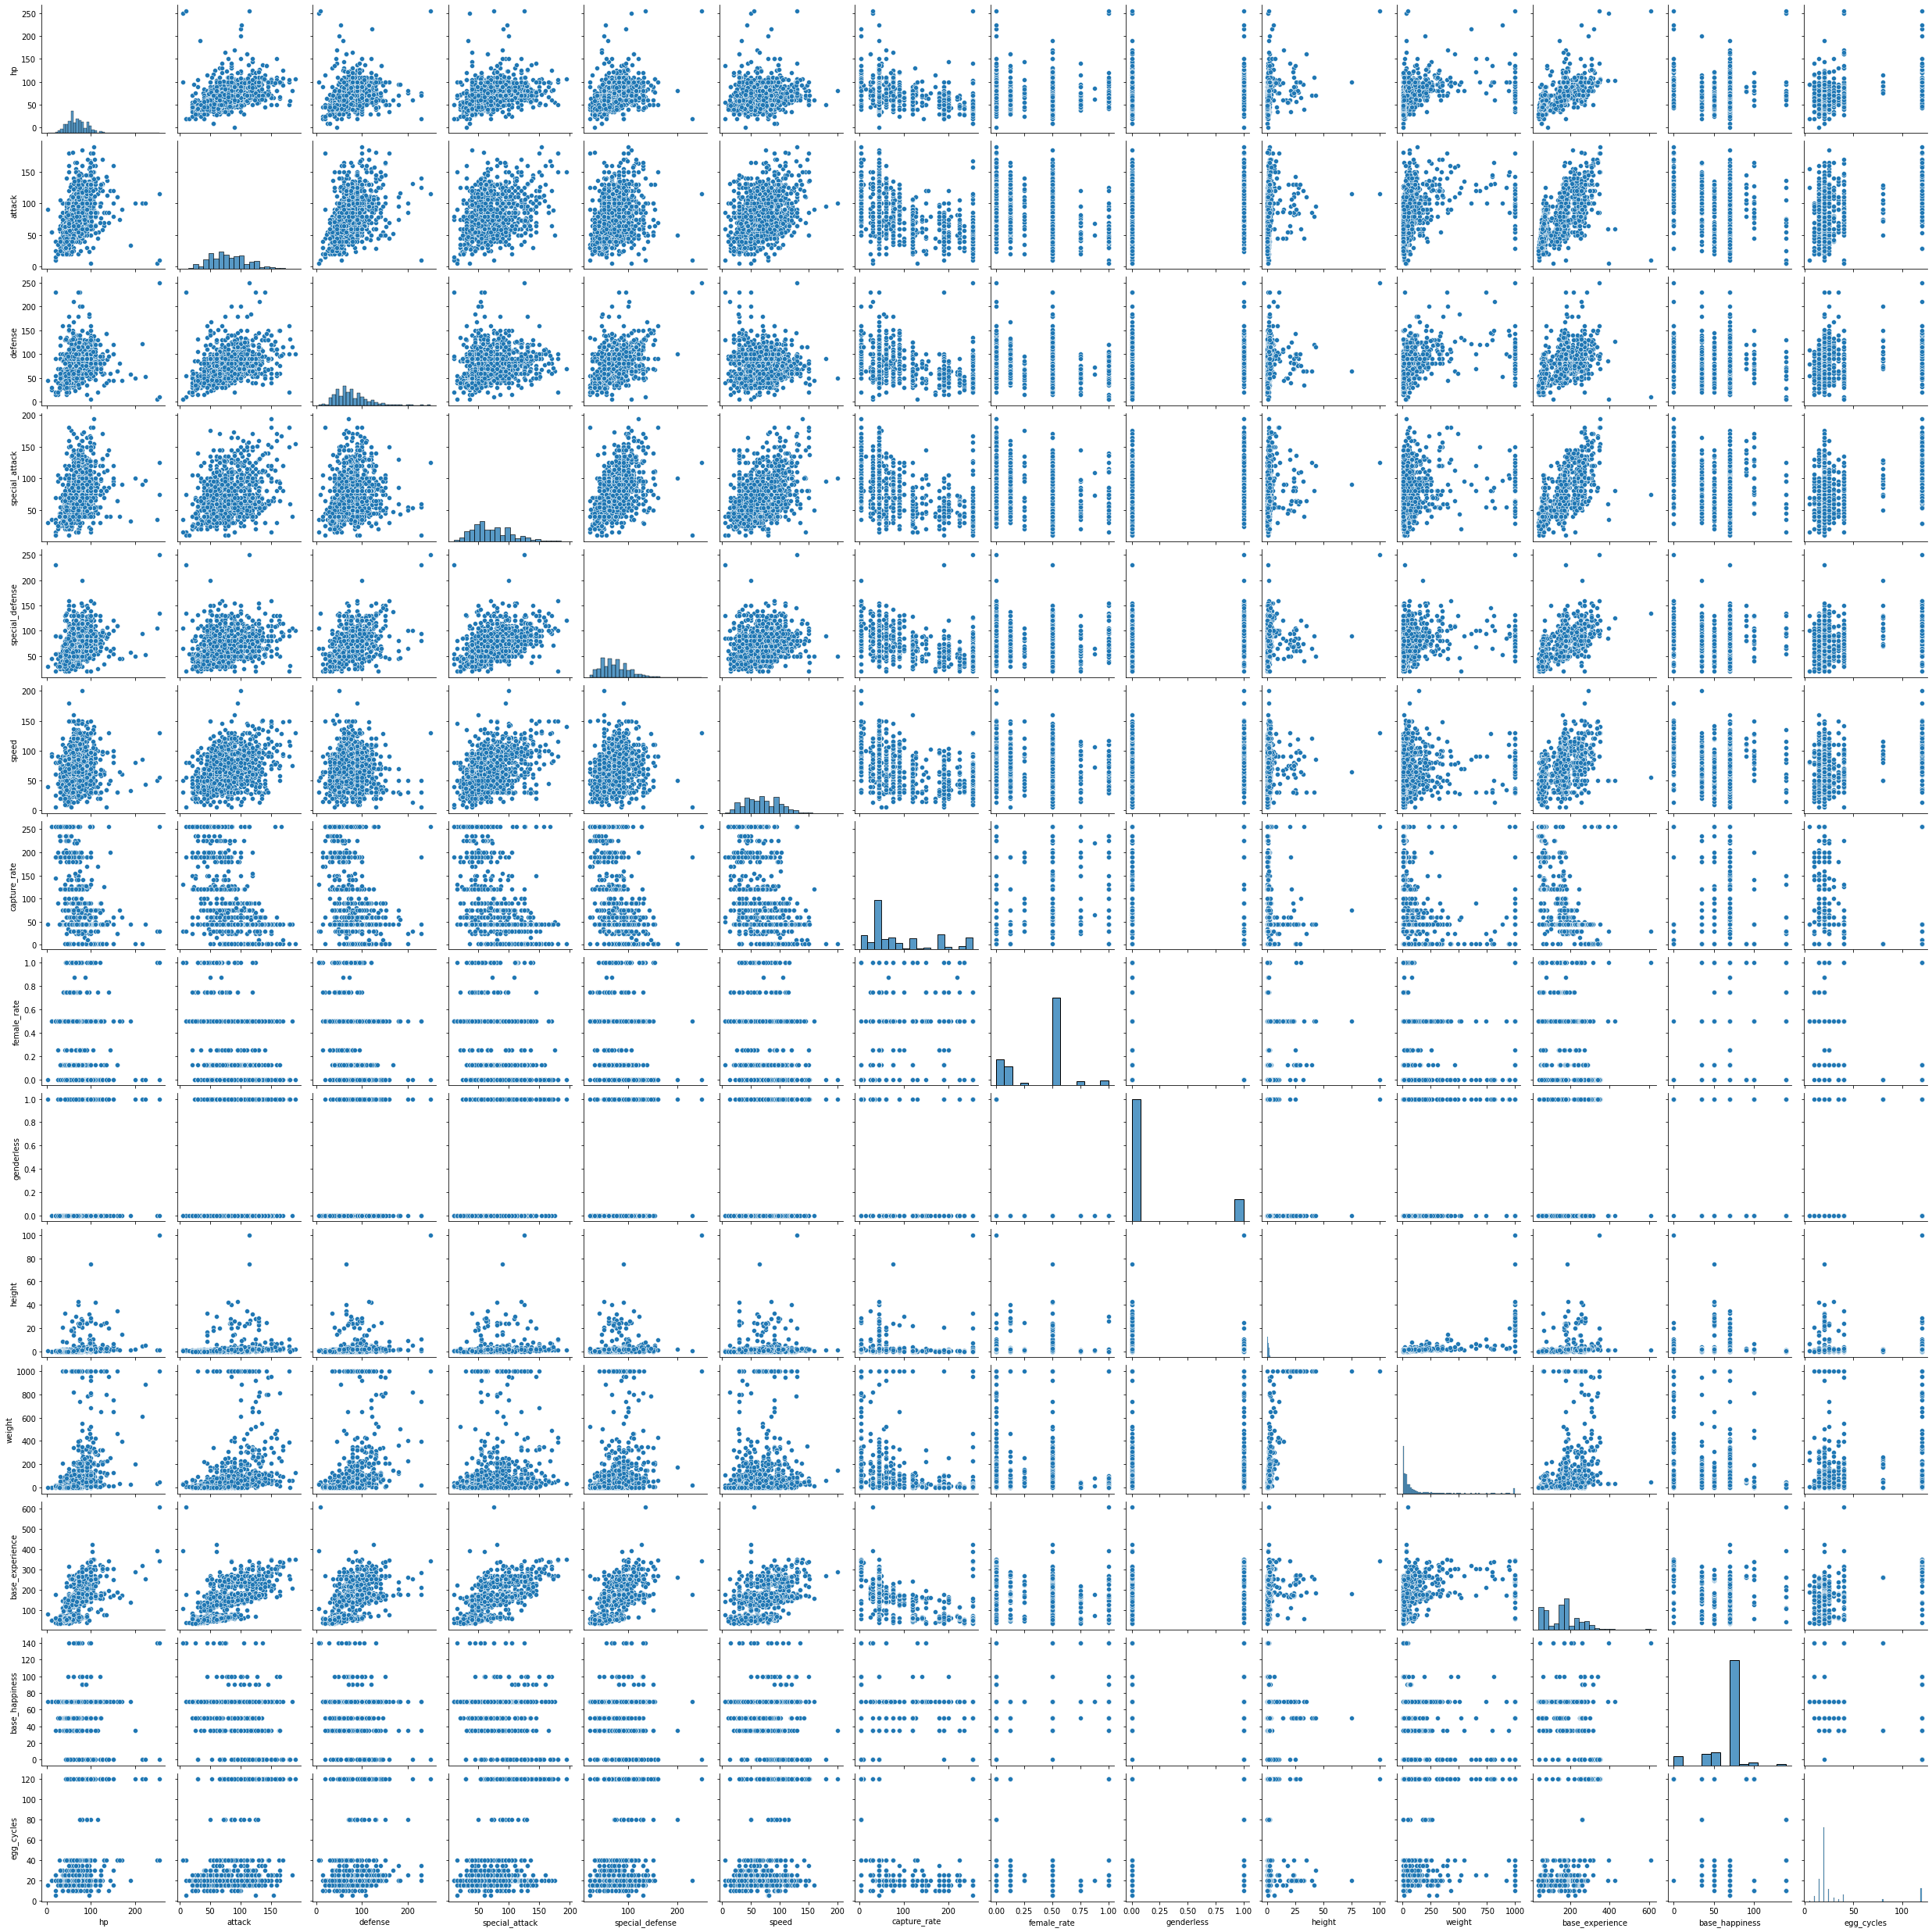

In [57]:
sns.pairplot(pokedex[attr])

Andiamo ad analizzare una serie di attributi che, fino a questo momento, sono stati accantonati nel corso dell'analisi.\
Nel metagame, un aspetto rilevante è l'efficacia di una mossa di un certo tipo, rispetto ad un Pokémon di un altro tipo. Per esempio, se un Pokémon di tipo Fuoco viene colpito da un attacco di tipo Acqua, il danno che gli sarà inflitto sarà raddoppiato; viceversa, se un Pokémon di tipo Acqua, viene colpito da un attacco di tipo Fuoco, il danno ricevuto sarà dimezzato.\
È possibile riassumere l'efficacia tra tipi in questo modo:
- attacco inefficace: $0 \times danno$;
- attacco poco efficace: $0.5 \times danno$;
- attacco efficace: $1 \times danno$;
- attacco superefficace: $2 \times danno$.

Poiché alcuni esemplari sono caratterizzati da due tipi, è possibile che l'efficacia su rifletta si entrambi i tipi, e che quindi i moltiplicatori si congiungano fino ad arrivare a quadruplicare il danno in questione. Per esempio: se un attacco di tipo Erba colpisce un Pokémon di tipo Acqua/Terra (il tipo Erba è superefficace su entrambi), allora l'output di danno inflitto sarà quadruplicato.

Tornando al dataset, oltre alle colonne esaminate sino ad adesso, esso è caratterizzato da ulteriori 18 attributi del tipo `<type>_attack_effectiveness`, che ne definiscono la sua debolezza (intesa come moltiplicatore del danno, per cui i valori variano nell'intervallo $[0,4]$) rispetto ad ognuno di essi. Partendo da questi attributi, si potrebbe costruire una tabella di stima delle efficacie di ognuno dei 18 tipi sugli altri, utilizzando il concetto di correlazione e di normalizzazione nell'intervallo $[0,2]$.

Verrà utilizzato l'indice di Spearman, onde evitare che alcuni outlier possano "inquinare" troppo i valori. Si presenta inoltre una tabella riassuntiva dei reali valori di efficacia secondo il metagame, affiancata alla heatmap dei valori di correlazione così da poter eseguire un più semplice confronto.

In [58]:
effectiveness = ['normal_attack_effectiveness', 'fire_attack_effectiveness', 'water_attack_effectiveness',\
                'electric_attack_effectiveness', 'grass_attack_effectiveness', 'ice_attack_effectiveness',\
                'fighting_attack_effectiveness', 'poison_attack_effectiveness', 'ground_attack_effectiveness',\
                'fly_attack_effectiveness', 'psychic_attack_effectiveness', 'bug_attack_effectiveness',\
                'rock_attack_effectiveness', 'ghost_attack_effectiveness', 'dragon_attack_effectiveness',\
                'dark_attack_effectiveness', 'steel_attack_effectiveness', 'fairy_attack_effectiveness']

att_eff = pokedex[effectiveness].corr('spearman')
att_eff = normalize(0,2,att_eff)
att_eff

normal_attack_effectiveness  \
normal_attack_effectiveness                       2.000000   
fire_attack_effectiveness                         0.496579   
water_attack_effectiveness                        0.101490   
electric_attack_effectiveness                     0.535110   
grass_attack_effectiveness                        0.430577   
ice_attack_effectiveness                          0.648042   
fighting_attack_effectiveness                     0.512052   
poison_attack_effectiveness                       1.473192   
ground_attack_effectiveness                       0.125019   
fly_attack_effectiveness                          1.136118   
psychic_attack_effectiveness                      0.768234   
bug_attack_effectiveness                          0.960037   
rock_attack_effectiveness                         0.823506   
ghost_attack_effectiveness                        0.000000   
dragon_attack_effectiveness                       0.917808   
dark_attack_effectiveness                         0.083545   
steel_attack_effectiveness                        0.362025   
fairy_attack_effectiveness                        0.851437   

                               fire_attack_effectiveness  \
normal_attack_effectiveness                     0.621092   
fire_attack_effectiveness                       2.000000   
water_attack_effectiveness                      0.482299   
electric_attack_effectiveness                   0.240569   
grass_attack_effectiveness                      0.000000   
ice_attack_effectiveness                        0.926469   
fighting_attack_effectiveness                   0.483182   
poison_attack_effectiveness                     0.816154   
ground_attack_effectiveness                     0.235791   
fly_attack_effectiveness                        1.120932   
psychic_attack_effectiveness                    0.502515   
bug_attack_effectiveness                        0.815377   
rock_attack_effectiveness                       0.625524   
ghost_attack_effectiveness                      0.681809   
dragon_attack_effectiveness                     0.128413   
dark_attack_effectiveness                       0.674428   
steel_attack_effectiveness                      0.963278   
fairy_attack_effectiveness                      0.426845   

                               water_attack_effectiveness  \
normal_attack_effectiveness                      0.260658   
fire_attack_effectiveness                        0.483984   
water_attack_effectiveness                       2.000000   
electric_attack_effectiveness                    0.522047   
grass_attack_effectiveness                       0.763495   
ice_attack_effectiveness                         0.508992   
fighting_attack_effectiveness                    0.799838   
poison_attack_effectiveness                      0.000000   
ground_attack_effectiveness                      1.116563   
fly_attack_effectiveness                         0.113421   
psychic_attack_effectiveness                     0.551275   
bug_attack_effectiveness                         0.137523   
rock_attack_effectiveness                        0.715466   
ghost_attack_effectiveness                       0.599315   
dragon_attack_effectiveness                      0.335249   
dark_attack_effectiveness                        0.630048   
steel_attack_effectiveness                       0.857492   
fairy_attack_effectiveness                       0.213794   

                               electric_attack_effectiveness  \
normal_attack_effectiveness                         0.631999   
fire_attack_effectiveness                           0.208574   
water_attack_effectiveness                          0.493498   
electric_attack_effectiveness                       2.000000   
grass_attack_effectiveness                          0.809306   
ice_attack_effectiveness                            0.000000   
fighting_attack_effectiveness                       0.528702   
poison_attack_effectiveness            

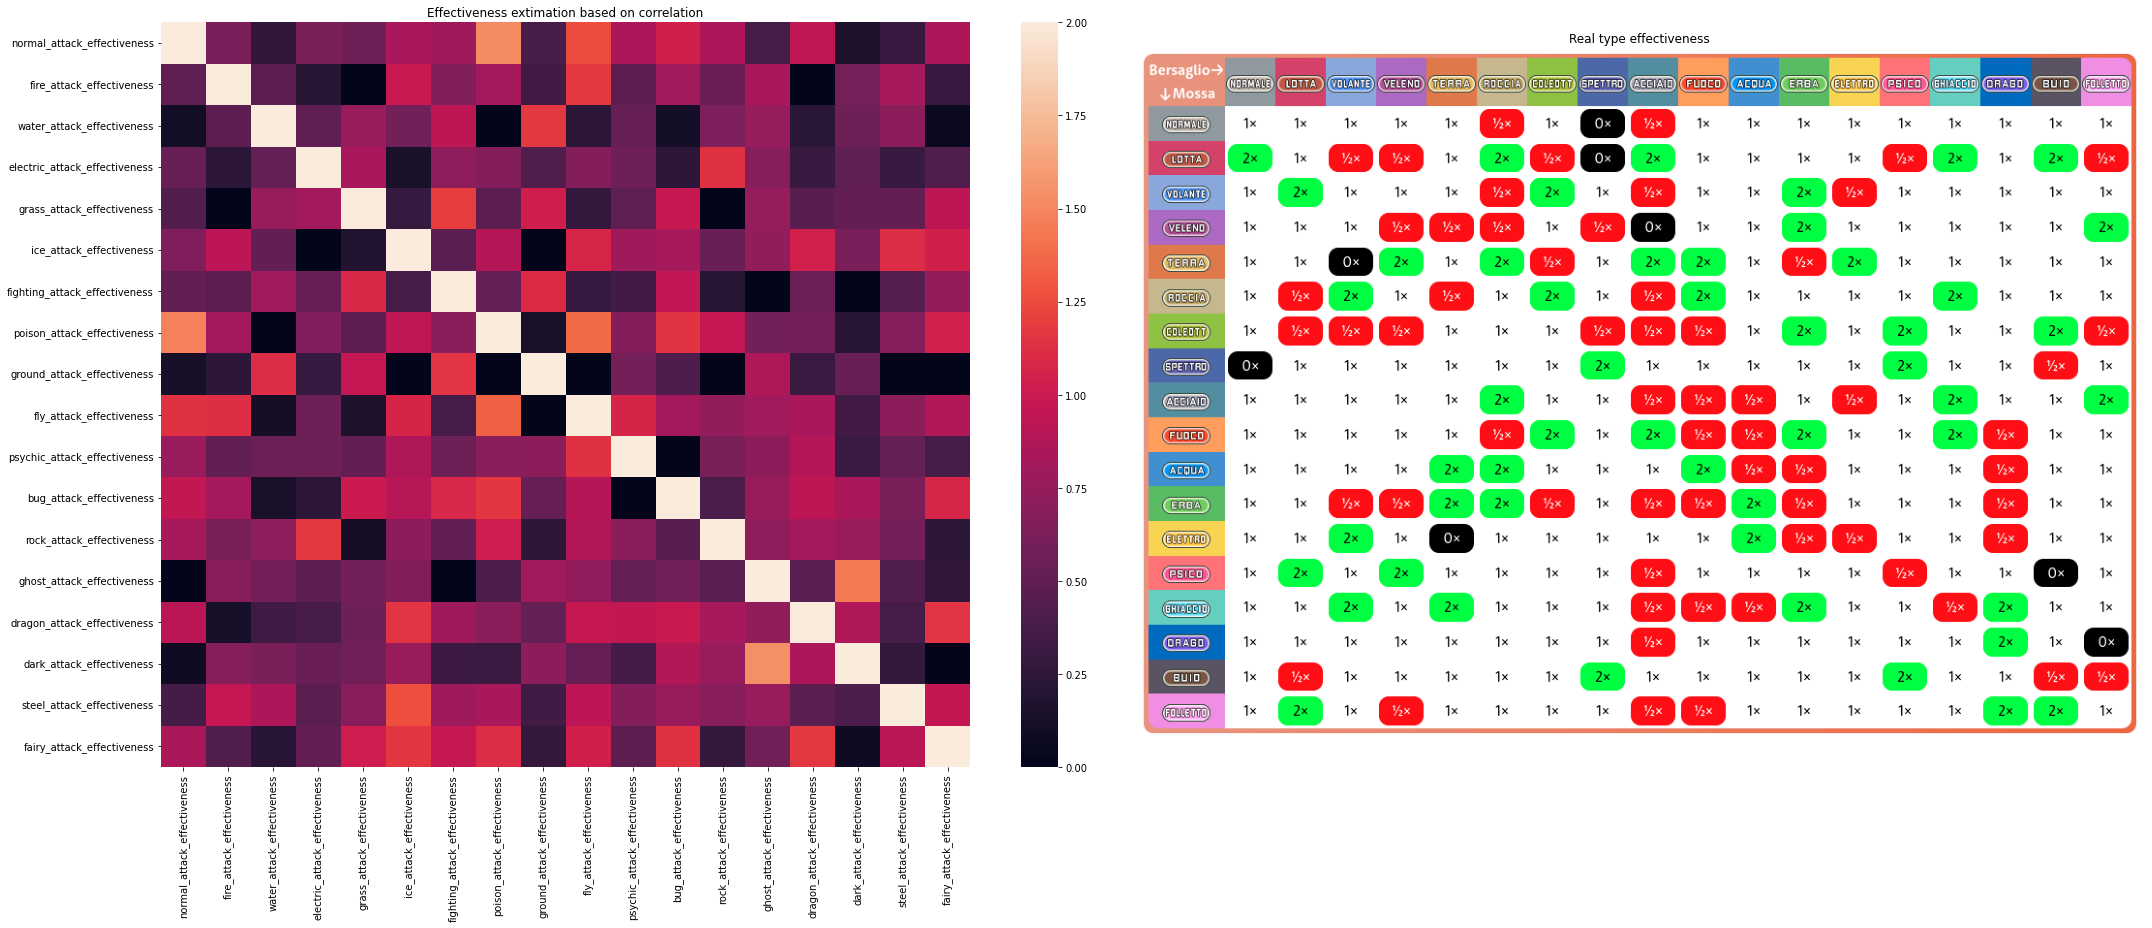

In [59]:
real_type_effectiveness = Image.open("real_type_effectiveness.png")

plt.figure(figsize=(30,13))
plt.subplot(121)
plt.title('Effectiveness extimation based on correlation')
sns.heatmap(att_eff)
plt.subplot(122)
plt.title('Real type effectiveness')
plt.imshow(real_type_effectiveness)
plt.axis('off')
plt.tight_layout()
plt.show()

Considerando la struttura del dataset, e soprattutto il modo in cui sono stati concepiti questi 18 attributi, è purtroppo impossibile ottenere una valutazione esatta dell'efficacia di ognuno dei tipi nei confronti dei restanti, per cui bisogna osservare questi valori come una mera stima; tuttavia, alcuni di essi coincidono effettivamente con quanto presente nel metagame. Per esempio, i tipi Normale e Spettro sono assolutamente inefficaci l'uno nei confronti dell'altro, gli attacchi di tipo Folletto sono superefficaci sui tipi Drago, e gli attacchi di tipo Fuoco sono poco efficaci sui tipi Acqua.\
Tuttavia, essendo una semplice stima, è possibile notare dei valori inesatti: per esempio, non è vero che il tipo Drago è superefficace sul tipo Folletto (anzi, esso è totalmente inefficace), e non è vero che il tipo Buio è poco efficace sul tipo Normale. La presenza di stime inesatte potrebbe essere spiegate mediante un esempio relativo a quest'ultimo caso: molti Pokémon di tipo Buio, presentano anche il secondo tipo Spettro, il quale è inefficace sul tipo Normale, quindi i record che presentano questa combinazione di tipi hanno effettivamente causato una variazione importante della stima dell'efficacia, rispetto al suo valore reale.

# 7. Regressione lineare
Considerando quanto detto nel precedente paragrafo, relativamente alla dipendenza tra statistiche di lotta e attributi come il tasso di cattura e l'esperienza fornita da un Pokémon al termine di una battaglia, si potrebbero eseguire delle previsioni mediante la regressione lineare.

## 7.1 Previsione del catch rate

In [60]:
cr_model = ols('capture_rate ~ hp + attack + defense + special_attack + special_defense + female_rate + genderless + height + weight + base_experience + base_happiness + egg_cycles', pokedex).fit()
cr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           capture_rate   R-squared:                       0.503
Model:                            OLS   Adj. R-squared:                  0.497
Method:                 Least Squares   F-statistic:                     93.02
Date:                Tue, 05 Apr 2022   Prob (F-statistic):          4.10e-158
Time:                        22:52:44   Log-Likelihood:                -6032.6
No. Observations:                1118   AIC:                         1.209e+04
Df Residuals:                    1105   BIC:                         1.216e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         227.4707     11.494     19.790      0.000     204.918     250.024
hp                 -0.2421      0.084     -2.877      0.004      -0.407      -0.077
attack             -0.3530      0.074     -4.782      0.000      -0.498      -0.208
defense            -0.2107      0.072     -2.940      0.003      -0.351      -0.070
special_attack     -0.3490      0.073     -4.774      0.000      -0.492      -0.206
special_defense    -0.2942      0.089     -3.309      0.001      -0.469      -0.120
female_rate        64.8906      8.895      7.295      0.000      47.437      82.344
genderless         18.9859      7.273      2.610      0.009       4.715      33.257
height              1.6732      0.433      3.868      0.000       0.824       2.522
weight             -0.0187      0.013     -1.436      0.151      -0.044       0.007
base_experience    -0.2815      0.050     -5.666      0.000      -0.379      -0.184
base_happiness     -0.2155      0.094     -2.301      0.022      -0.399      -0.032
egg_cycles          0.0498      0.086      0.581      0.562      -0.119       0.218
==============================================================================
Omnibus:                      182.672   Durbin-Watson:                   1.502
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              511.783
Skew:                           0.839   Prob(JB):                    7.38e-112
Kurtosis:                       5.858   Cond. No.                     2.40e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.4e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Analizzando il modello trovato per effettuare una stima del tasso di cattura, notiamo che il valore di $R^2$ è approssimativamente pari a 0.5, per cui possiamo dedurre che statische e tratti secondari rimanenti, sono in grado di spiegare il modello, così da poter stimare il catch rate, al $50%$; il modello non è perfetto, tuttavia le variabili indipendenti hanno effettivamente una qualche correlazione (seppur non fortissima) con il tasso di cattura.

Inoltre, osservando i vari $p-value$, possiamo notare valori più alti rispetto ad altri. Infatti: il massimo valore di $p-value$ è quello relativo alla colonna `weight`, indicando che essa non contribuisce in maniera significativa alla regressione.

### Backward elimination
#### Step 1
Dati i presupposti sopracitati, si esegue una backward elimination, nel tentativo di migliorare il modello a seguito dell'eliminazione di features "ridondanti", partendo proprio da `weight`.

In [61]:
cr_model_be01 = ols('capture_rate ~ hp + attack + defense + special_attack + special_defense + female_rate + genderless + height + base_experience + base_happiness + egg_cycles', pokedex).fit()
cr_model_be01.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           capture_rate   R-squared:                       0.502
Model:                            OLS   Adj. R-squared:                  0.497
Method:                 Least Squares   F-statistic:                     101.2
Date:                Tue, 05 Apr 2022   Prob (F-statistic):          1.10e-158
Time:                        22:52:45   Log-Likelihood:                -6033.7
No. Observations:                1118   AIC:                         1.209e+04
Df Residuals:                    1106   BIC:                         1.215e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         227.2175     11.498     19.761      0.000     204.656     249.779
hp                 -0.2490      0.084     -2.962      0.003      -0.414      -0.084
attack             -0.3573      0.074     -4.842      0.000      -0.502      -0.213
defense            -0.2266      0.071     -3.198      0.001      -0.366      -0.088
special_attack     -0.3403      0.073     -4.669      0.000      -0.483      -0.197
special_defense    -0.2829      0.089     -3.193      0.001      -0.457      -0.109
female_rate        64.9637      8.899      7.300      0.000      47.502      82.425
genderless         18.6809      7.274      2.568      0.010       4.409      32.952
height              1.2194      0.296      4.126      0.000       0.640       1.799
base_experience    -0.2876      0.050     -5.809      0.000      -0.385      -0.190
base_happiness     -0.1985      0.093     -2.136      0.033      -0.381      -0.016
egg_cycles          0.0450      0.086      0.524      0.600      -0.123       0.213
==============================================================================
Omnibus:                      193.248   Durbin-Watson:                   1.505
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              565.785
Skew:                           0.871   Prob(JB):                    1.38e-123
Kurtosis:                       6.018   Cond. No.                     2.04e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.04e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Si noti come, rimuovendo l'attributo `weight`, il valore di $R^2$ sia sceso, seppure di poco. Possiamo concludere che il miglior modello di predizione della variabile `catch_rate` sia quello iniziale.

Utilizzando i valori provenienti dal record dello stesso dataset, proviamo a predire il valore `catch_rate`.\
Il Pokémon scelto è *Swampert*.

In [62]:
record = pokedex[pokedex['name']=='Swampert'][attr]
record

hp  attack  defense  special_attack  special_defense  speed  \
340  100     110       90              85               90     60   

     capture_rate  female_rate  genderless  height  weight  base_experience  \
340            45        0.125           0     1.5    81.9              241   

     base_happiness  egg_cycles  
340              70        20.0

In [63]:
cr_model.predict(record)

340    16.484785
dtype: float64

Purtroppo, a causa della non eccellente rappresentazione del modello, notiamo uno scarto del valore stimato della feature di ben 29 punti rispetto all'originale.

## 7.2 Previsione dell'egg cycle

In [64]:
ec_model = ols('egg_cycles ~ hp + attack + defense + special_attack + special_defense + female_rate + genderless + height + weight + base_experience + base_happiness + capture_rate', pokedex).fit()
ec_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             egg_cycles   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.608
Method:                 Least Squares   F-statistic:                     145.2
Date:                Tue, 05 Apr 2022   Prob (F-statistic):          3.11e-217
Time:                        22:52:45   Log-Likelihood:                -4859.9
No. Observations:                1118   AIC:                             9746.
Df Residuals:                    1105   BIC:                             9811.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          33.5808      4.576      7.338      0.000      24.602      42.560
hp                  0.1179      0.029      4.012      0.000       0.060       0.176
attack              0.0052      0.026      0.199      0.842      -0.046       0.056
defense            -0.0453      0.025     -1.800      0.072      -0.095       0.004
special_attack      0.0131      0.026      0.507      0.612      -0.038       0.064
special_defense    -0.0439      0.031     -1.404      0.161      -0.105       0.017
female_rate        -9.4203      3.178     -2.964      0.003     -15.655      -3.185
genderless         33.1369      2.353     14.081      0.000      28.519      37.754
height             -0.2061      0.152     -1.352      0.177      -0.505       0.093
weight              0.0061      0.005      1.328      0.184      -0.003       0.015
base_experience     0.0944      0.017      5.420      0.000       0.060       0.129
base_happiness     -0.3624      0.031    -11.683      0.000      -0.423      -0.302
capture_rate        0.0061      0.011      0.581      0.562      -0.015       0.027
==============================================================================
Omnibus:                      412.594   Durbin-Watson:                   0.886
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2868.841
Skew:                           1.528   Prob(JB):                         0.00
Kurtosis:                      10.228   Cond. No.                     2.58e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.58e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Anche in questo caso, il valore di $R^2$ non è significativamente alto, ma mostra che le variabili dipendenti sono correlate, in maniera quantomeno sufficiente, alla feature `egg_cycle`.\
Tuttavia, osservando i $p-value$ di ognuna delle feature, è possibile notare che il modello è migliorabile mediante un processo di Backward Elimination.

### Backward Elimination

#### Step 1
Il massimo $p-value$ si trova in corrispondenza della feature `attack`, che pertanto non è correlata in maniera significativa al numero di passi necessari a far schiudere un uovo.

In [65]:
ec_model_be01 = ols('egg_cycles ~ hp + defense + special_attack + special_defense + female_rate + genderless + height + weight + base_experience + base_happiness + capture_rate', pokedex).fit()
ec_model_be01.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             egg_cycles   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.608
Method:                 Least Squares   F-statistic:                     158.5
Date:                Tue, 05 Apr 2022   Prob (F-statistic):          2.46e-218
Time:                        22:52:45   Log-Likelihood:                -4860.0
No. Observations:                1118   AIC:                             9744.
Df Residuals:                    1106   BIC:                             9804.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          33.9918      4.082      8.327      0.000      25.982      42.002
hp                  0.1181      0.029      4.022      0.000       0.060       0.176
defense            -0.0442      0.025     -1.801      0.072      -0.092       0.004
special_attack      0.0127      0.026      0.494      0.622      -0.038       0.063
special_defense    -0.0460      0.029     -1.565      0.118      -0.104       0.012
female_rate        -9.5079      3.146     -3.022      0.003     -15.680      -3.336
genderless         33.0646      2.324     14.226      0.000      28.504      37.625
height             -0.2063      0.152     -1.354      0.176      -0.505       0.093
weight              0.0061      0.005      1.336      0.182      -0.003       0.015
base_experience     0.0959      0.016      6.062      0.000       0.065       0.127
base_happiness     -0.3634      0.031    -11.875      0.000      -0.423      -0.303
capture_rate        0.0058      0.010      0.558      0.577      -0.015       0.026
==============================================================================
Omnibus:                      412.723   Durbin-Watson:                   0.886
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2869.868
Skew:                           1.528   Prob(JB):                         0.00
Kurtosis:                      10.229   Cond. No.                     2.24e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.24e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Dopo l'eliminazione della feature, notiamo che l'indice di $R^2$ è rimasto praticamente invariato.

#### Step 2
Notiamo dal precedente step che vi sono ancora dei $p-value$ superiori alla media: il massimo è localizzato in corrispondenza della feature `special_attack`, pertanto anch'essa può essere considerata ridondante nella costruzione di questo modello di regressione.

In [66]:
ec_model_be02 = ols('egg_cycles ~ hp + defense + special_defense + female_rate + genderless + height + weight + base_experience + base_happiness + capture_rate', pokedex).fit()
ec_model_be02.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             egg_cycles   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.608
Method:                 Least Squares   F-statistic:                     174.4
Date:                Tue, 05 Apr 2022   Prob (F-statistic):          2.05e-219
Time:                        22:52:45   Log-Likelihood:                -4860.1
No. Observations:                1118   AIC:                             9742.
Df Residuals:                    1107   BIC:                             9797.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          34.7685      3.766      9.233      0.000      27.380      42.157
hp                  0.1156      0.029      3.998      0.000       0.059       0.172
defense            -0.0479      0.023     -2.043      0.041      -0.094      -0.002
special_defense    -0.0441      0.029     -1.513      0.131      -0.101       0.013
female_rate        -9.5267      3.144     -3.030      0.003     -15.697      -3.357
genderless         33.1236      2.320     14.275      0.000      28.571      37.676
height             -0.1980      0.151     -1.308      0.191      -0.495       0.099
weight              0.0059      0.005      1.297      0.195      -0.003       0.015
base_experience     0.0997      0.014      7.236      0.000       0.073       0.127
base_happiness     -0.3647      0.030    -11.964      0.000      -0.425      -0.305
capture_rate        0.0051      0.010      0.497      0.619      -0.015       0.025
==============================================================================
Omnibus:                      412.962   Durbin-Watson:                   0.884
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2877.378
Skew:                           1.529   Prob(JB):                         0.00
Kurtosis:                      10.240   Cond. No.                     2.08e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.08e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Ancora una volta notiamo che il valore di $R^2$ non è variato rispetto al modello originale.

#### Step 3
Eliminiamo ancora una volta la feature corrispondente al massimo $p-value$ presente nel log del precedente step: in questo caso, la feature ridondante sarebbe `capture_rate`.

In [67]:
ec_model_be03 = ols('egg_cycles ~ hp + defense + special_defense + female_rate + genderless + height + weight + base_experience + base_happiness', pokedex).fit()
ec_model_be03.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             egg_cycles   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.609
Method:                 Least Squares   F-statistic:                     193.9
Date:                Tue, 05 Apr 2022   Prob (F-statistic):          1.62e-220
Time:                        22:52:46   Log-Likelihood:                -4860.2
No. Observations:                1118   AIC:                             9740.
Df Residuals:                    1108   BIC:                             9791.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          35.7380      3.220     11.098      0.000      29.419      42.057
hp                  0.1146      0.029      3.974      0.000       0.058       0.171
defense            -0.0489      0.023     -2.097      0.036      -0.095      -0.003
special_defense    -0.0451      0.029     -1.555      0.120      -0.102       0.012
female_rate        -9.1486      3.050     -2.999      0.003     -15.133      -3.164
genderless         33.2520      2.305     14.425      0.000      28.729      37.775
height             -0.1901      0.150     -1.263      0.207      -0.485       0.105
weight              0.0058      0.005      1.281      0.201      -0.003       0.015
base_experience     0.0972      0.013      7.587      0.000       0.072       0.122
base_happiness     -0.3654      0.030    -12.005      0.000      -0.425      -0.306
==============================================================================
Omnibus:                      410.851   Durbin-Watson:                   0.886
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2853.162
Skew:                           1.521   Prob(JB):                         0.00
Kurtosis:                      10.211   Cond. No.                     1.99e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.99e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Dopo l'eliminazione notiamo che il valore di $R^2$ è rimasto ancora invariato, quindi è possibile proseguire ulteriormente con Backward Elimination.

#### Step 4
Poiché il maggior $p-value$ è quello relativo alla feature `height`, osserviamo il comportamento della regressione dopo la sua eliminazione.

In [68]:
ec_model_be04 = ols('egg_cycles ~ hp + defense + special_defense + female_rate + genderless + weight + base_experience + base_happiness', pokedex).fit()
ec_model_be04.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             egg_cycles   R-squared:                       0.611
Model:                            OLS   Adj. R-squared:                  0.608
Method:                 Least Squares   F-statistic:                     217.8
Date:                Tue, 05 Apr 2022   Prob (F-statistic):          2.35e-221
Time:                        22:52:46   Log-Likelihood:                -4861.0
No. Observations:                1118   AIC:                             9740.
Df Residuals:                    1109   BIC:                             9785.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          35.8218      3.221     11.123      0.000      29.503      42.141
hp                  0.1117      0.029      3.885      0.000       0.055       0.168
defense            -0.0462      0.023     -1.990      0.047      -0.092      -0.001
special_defense    -0.0501      0.029     -1.741      0.082      -0.107       0.006
female_rate        -9.0422      3.050     -2.965      0.003     -15.026      -3.058
genderless         33.5728      2.292     14.650      0.000      29.076      38.069
weight              0.0016      0.003      0.526      0.599      -0.004       0.008
base_experience     0.0986      0.013      7.724      0.000       0.074       0.124
base_happiness     -0.3659      0.030    -12.017      0.000      -0.426      -0.306
==============================================================================
Omnibus:                      407.706   Durbin-Watson:                   0.888
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2818.165
Skew:                           1.508   Prob(JB):                         0.00
Kurtosis:                      10.169   Cond. No.                     1.99e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.99e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Poiché il valore di $R^2$ è diminuito, seppur di poco, a seguito dello scarto dell'attributo `height`, siamo in grado di dire che esso effettivamente è in grado di contribuire alla regressione, e quindi va mantenuto.\
Per cui, il miglior modello è quello ottenuto al termine del terzo step successivamente all'eliminazione della feature `capture_rate`, ossia il modello `cr_model_be_03`.

Andiamo ad esso ad effettuare una stima del suddetto valore `egg_cycles` su due diversi record relativi a due Pokémon appartenenti alla stessa famiglia evolutiva.\
Si prendono come riferimento *Mudkip* e la sua forma evolutiva finale *Swampert*.

In [69]:
record1 = pokedex[pokedex['name']=='Mudkip'][attr]
record2 = pokedex[pokedex['name']=='Swampert'][attr]

pd.concat([record1, record2])

hp  attack  defense  special_attack  special_defense  speed  \
338   50      70       50              50               50     40   
340  100     110       90              85               90     60   

     capture_rate  female_rate  genderless  height  weight  base_experience  \
338            45        0.125           0     0.4     7.6               62   
340            45        0.125           0     1.5    81.9              241   

     base_happiness  egg_cycles  
338              70        20.0  
340              70        20.0

In [70]:
print('Mudkip:', ec_model_be03.predict(record1))
print('Swampert:', ec_model_be03.predict(record2))

Mudkip: 338    16.037541
dtype: float64
Swampert: 340    35.629054
dtype: float64


È possibile notare che il modello di regressione si comporta molto bene sulla stima dell'`egg_cycle` di *Mudkip*, ma peggio sulla stima dello stesso valore relativo a *Swampert*.\
Il perché è presto detto: entrambi i Pokémon fanno parte della medesima famiglia evolutiva, ma *Mudkip* è la sua forma base, mentre *Swampert*, come detto in precedenza, è la forma finale evoluta; è normale che ambedue i Pokémon abbiano il medesimo `egg_cycle`, perché in entrambi i casi si avrà un uovo di *Mudkip*. Allo stesso tempo, è stato dimostrato come le feature considerate siano correlate al numero di passi necessari affinché il Pokémon si schiuda: da questo punto di vista, quindi, il record relativo a *Swampert* funge da outlier. Ciò indica che che il modello di regressione si comporta molto bene sulle forme base (in quanto quelle nate dalla schiusura del suddetto uovo), ma male sulle forme finali.

# 8. Classificazione
Nelle analisi effettuate nei precedenti paragrafi, sono state individuate quattro diverse popolazioni, che vengono anche individuate mediante quattro attributi booleani che si riferiscono all'appartenenza dei Pokémon a queste categoria, che da qui in poi verranno definite classi:
- `is_baby`: definisce se un Pokémon è baby o meno;
- `is_legendary`: definisce se un Pokémon è leggendario o meno;
- `is_mythical`: definisce se un Pokémon è misterioso o meno.
Inoltre, la presenza di un valore pari a zero su ognuna di queste tre colonne, indica per esclusione che un Pokémon è comune.

Si è visto, inoltre, come esista una dipendenza tra gli attributi dei Pokémon (intesi come statistiche e tratti secondari) e la loro appartenenza ad ogni singolo gruppo, pertanto è possibile utilizzare questo concetto per costruire una serie di classificazione (sia binari, sia multi-classe), che definiscano l'appartenenza di un Pokémon ad una specifica classe, partendo da training set etichettati.

## 8.1 Regressione logistica
Ignoriamo momentaneamente la suddivisione nelle quattro classi individuate e utilizziamone piuttosto solamente due: comuni e Leggendari. Si vuole vedere se l'appartenenza a queste due classi sia netta, o se esiste una sfumatura secondo cui alcuni Pokémon comuni potrebbero essere considerati alla stregua di Leggendari o viceversa (si ricorda, inoltre, che i Pokémon baby sono, in fin dei conti, particolari tipi di Pokémon comuni, mentre i Pokémon misteriosi sono particolari tipi di Pokémon leggendari, sebbene in quest'ultimo caso il dataset esprima il contrario).

Anzitutto è necessario che l'attributo booleano venga convertito in un valore numerico. In questo caso si avrà 1 se l'attributo è `True`, altrimenti 0.

In [71]:
pokedex["legendary"] = pokedex["legendary"].apply(lambda x: 1 if x==True else 0)

### 8.1.1 Somma delle statistiche e tasso di cattura
Analizziamo anzitutto il dataset utilizzando la somma delle statistiche ed il tasso di cattura, piuttosto che tutti gli attributi presi singolarmente.

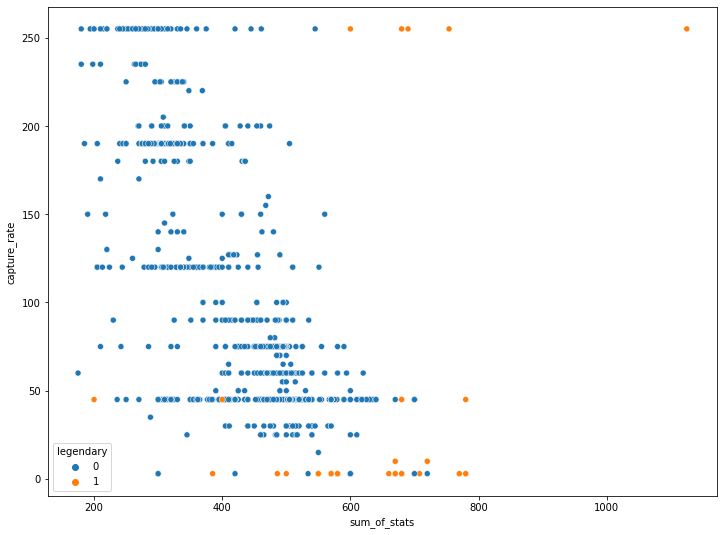

In [72]:
pokedex_sum_stats = pd.concat([pokedex[stats].sum(1), pokedex['capture_rate'], pokedex['legendary']], axis=1)
pokedex_sum_stats.rename(columns={0: 'sum_of_stats'}, inplace=True)

plt.figure(figsize=(12,9))
sns.scatterplot('sum_of_stats','capture_rate',data=pokedex_sum_stats, hue='legendary')
plt.show()

In [73]:
cl_sum_stats_model = logit('legendary ~ sum_of_stats + capture_rate', pokedex_sum_stats).fit()
cl_sum_stats_model.summary()

Optimization terminated successfully.
         Current function value: 0.140270
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              legendary   No. Observations:                 1118
Model:                          Logit   Df Residuals:                     1115
Method:                           MLE   Df Model:                            2
Date:                Tue, 05 Apr 2022   Pseudo R-squ.:                  0.4870
Time:                        22:52:46   Log-Likelihood:                -156.82
converged:                       True   LL-Null:                       -305.67
Covariance Type:            nonrobust   LLR p-value:                 2.273e-65
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      -13.3811      1.441     -9.285      0.000     -16.206     -10.557
sum_of_stats     0.0218      0.002      9.119      0.000       0.017       0.026
capture_rate    -0.0188      0.005     -3.562      0.000      -0.029      -0.008
================================================================================

Possibly complete quasi-separation: A fraction 0.22 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

Notiamo che lo pseudo-$R^2$ non è molto alto, ma essendo prossimo a 0.5 è comunque accettabile.\
Testiamo il modello logistico predendo quattro record di natura differente. 

In [74]:
record1 = pokedex_sum_stats[pokedex['name']=='Metagross']
record2 = pokedex_sum_stats[pokedex['name']=='Gallade']
record3 = pokedex_sum_stats[pokedex['name']=='Dialga']
record4 = pokedex_sum_stats[pokedex['name']=='Arceus']

pd.concat([record1, record2, record3, record4], axis=0)

sum_of_stats  capture_rate  legendary
475           600             3          0
589           518            45          0
603           680             3          1
615           720             3          0

In [75]:
print("Metagross:", cl_sum_stats_model.predict(record1))
print("Gallade:", cl_sum_stats_model.predict(record2))
print("Dialga:", cl_sum_stats_model.predict(record3))
print("Arceus:", cl_sum_stats_model.predict(record4))

Metagross: 475    0.412137
dtype: float64
Gallade: 589    0.050593
dtype: float64
Dialga: 603    0.800459
dtype: float64
Arceus: 615    0.905622
dtype: float64


Analizzando i valori predetti dal modello di regressione, utilizzando queste due variabili indipendenti, si possono fare constatazioni non indifferenti: anzitutto, il modello sembra riconoscere (e predire) lo status di questi Pokémon in maniera più che buona. Infatti, *Gallade* è effettivamente un Pokémon comune, e la sua probabilità di essere un leggendario è molto bassa secondo la predizione, mentre *Dialga* lo è, e di conseguenza il modello stabilisce che la sua probabilità di essere un leggendario è prossima ad 1.

Osserviamo i valori predetti per *Metagross* ed *Arceus*: il primo è un Pokémon comune, ma notiamo che secondo il modello di regressione, ha una probabilità molto più alta rispetto a *Gallade* di essere considerato un Pokémon leggendario; in questo caso, il modello non ha del tutto torto. *Metagross* è infatti un Pokémon la cui somma delle statistiche di base è superiore a 600 (praticamente molto vicine a quella di un leggendario, se osserviamo il record relativo a *Dialga*), e il cui tasso di cattura è il medesimo di un leggendario: Pokémon di questo genere, in quanto nel metagame sono considerati molto forti ma comunque comuni, vengono definiti *pseudo-leggendari*.\
Anche relativamente ad *Arceus* il modello non si sta del tutto sbagliando: infatti, i misteriosi sono dei particolari tipi di leggendari, come già detto in precedenza; *Arceus* in particolar modo, è il creatore del mondo Pokémon, e pertanto la somma delle sue statistiche di base è la più alta tra tutti i leggendari (senza considerare gimmick quali *Mega Evoluzioni* e *Gigamax* di altri leggendari); quindi, non è errato dire che la sua probabilità di essere un leggendario è maggiore di quella di *Dialga*, che secondo il dataset viene considerato tale.

#### Decision Boundary

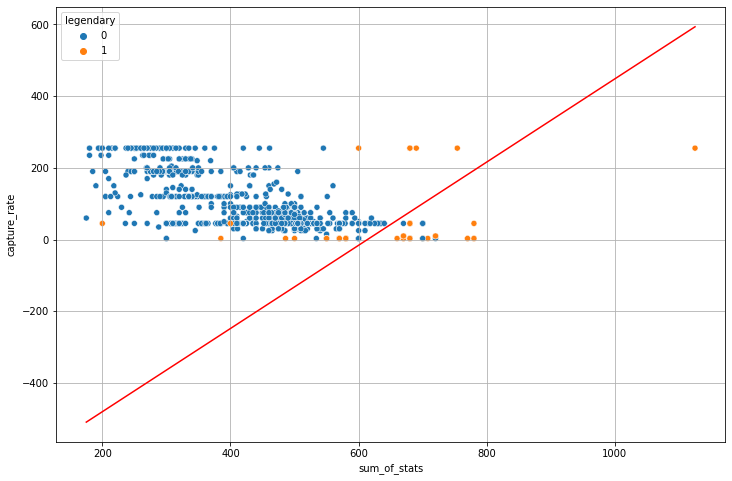

In [76]:
b0 = cl_sum_stats_model.params.Intercept
b1 = cl_sum_stats_model.params.sum_of_stats
b2 = cl_sum_stats_model.params.capture_rate

m = -b1/b2
q = -b0/b2

x = np.linspace(np.min(pokedex_sum_stats['sum_of_stats']),np.max(pokedex_sum_stats['sum_of_stats']),2)
y = m*x+q

plt.figure(figsize=(12,8))
sns.scatterplot('sum_of_stats','capture_rate',data=pokedex_sum_stats, hue='legendary')
plt.grid(True)
plt.plot(x,y,'r')
plt.show()

Notiamo che effettivamente il modello non si comporta male, visto che il decision boundary divide lo spazio in modo tale che il maggior numero di Pokémon comuni vengono visti come tali.

### 8.1.2 Attributi caratteristici
La precedente costruzione di un semplice modello logistico che considera due sole variabili dipendenti è stata utile per definire la distinzione tra pseudo-leggendari, comuni e leggendari. Data questa nuova "sfumatura", andiamo adesso a costruire un classificatore binario più complesso (e utile, in tal senso), che consideri tutti gli attributi analizzati fino ad adesso, presi singolarmente.

In [77]:
features = ['name', 'hp', 'attack', 'defense', 'special_attack', 'special_defense', 'speed',\
            'capture_rate', 'female_rate', 'genderless', 'height', 'weight',\
            'base_experience', 'base_happiness', 'egg_cycles',\
            'baby_pokemon', 'legendary', 'mythical']

params = ['hp', 'attack', 'defense', 'special_attack', 'special_defense', 'speed',\
          'capture_rate', 'female_rate', 'genderless', 'height', 'weight',\
          'base_experience', 'base_happiness', 'egg_cycles']

cl_model = logit('legendary ~ hp + attack + defense + special_attack + special_defense + speed + capture_rate + female_rate + height + weight + base_experience + base_happiness + egg_cycles', pokedex).fit()
cl_model.summary()

Optimization terminated successfully.
         Current function value: 0.096837
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              legendary   No. Observations:                 1118
Model:                          Logit   Df Residuals:                     1104
Method:                           MLE   Df Model:                           13
Date:                Tue, 05 Apr 2022   Pseudo R-squ.:                  0.6458
Time:                        22:52:47   Log-Likelihood:                -108.26
converged:                       True   LL-Null:                       -305.67
Covariance Type:            nonrobust   LLR p-value:                 2.792e-76
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         -10.4740      1.823     -5.746      0.000     -14.046      -6.902
hp                  0.0097      0.009      1.056      0.291      -0.008       0.028
attack             -0.0003      0.007     -0.038      0.970      -0.015       0.014
defense             0.0084      0.009      0.973      0.331      -0.009       0.025
special_attack     -0.0026      0.007     -0.363      0.717      -0.017       0.011
special_defense     0.0223      0.009      2.508      0.012       0.005       0.040
speed               0.0178      0.009      1.975      0.048       0.000       0.035
capture_rate       -0.0048      0.004     -1.291      0.197      -0.012       0.003
female_rate        -2.5463      0.943     -2.700      0.007      -4.395      -0.698
height             -0.0061      0.047     -0.128      0.898      -0.099       0.087
weight              0.0009      0.001      0.805      0.421      -0.001       0.003
base_experience     0.0070      0.005      1.295      0.195      -0.004       0.018
base_happiness      0.0056      0.006      1.001      0.317      -0.005       0.017
egg_cycles          0.0321      0.006      5.784      0.000       0.021       0.043
===================================================================================
"""

Notiamo che il valore di pseudo-$R^2$ è maggiore rispetto a quello calcolato per il precedente modello, per cui considerare tutti gli attributi presi singolarmente come variabili indipendenti, riesce a "spiegare" meglio i dati.\
Testiamo la predizione della classe degli stessi quattro Pokémon considerati nel paragrafo precedente.

In [78]:
record1 = pokedex[pokedex['name']=='Metagross'][features]
record2 = pokedex[pokedex['name']=='Gallade'][features]
record3 = pokedex[pokedex['name']=='Dialga'][features]
record4 = pokedex[pokedex['name']=='Arceus'][features]

pd.concat([record1, record2, record3, record4], axis=0)

name   hp  attack  defense  special_attack  special_defense  speed  \
475  Metagross   80     135      130              95               90     70   
589    Gallade   68     125       65              65              115     80   
603     Dialga  100     120      120             150              100     90   
615     Arceus  120     120      120             120              120    120   

     capture_rate  female_rate  genderless  height  weight  base_experience  \
475             3          0.0           1     1.6   550.0              270   
589            45          0.0           0     1.6    52.0              233   
603             3          0.0           1     5.4   683.0              306   
615             3          0.0           1     3.2   320.0              324   

     base_happiness  egg_cycles  baby_pokemon  legendary  mythical  
475              35        40.0         False          0     False  
589              35        20.0         False          0     False  
603               0       120.0         False          1     False  
615               0       120.0         False          0      True

In [79]:
print("Metagross:", cl_model.predict(record1))
print("Gallade:", cl_model.predict(record2))
print("Dialga:", cl_model.predict(record3))
print("Arceus:", cl_model.predict(record4))

Metagross: 475    0.140985
dtype: float64
Gallade: 589    0.03946
dtype: float64
Dialga: 603    0.811504
dtype: float64
Arceus: 615    0.926491
dtype: float64


In questo nuovo modello le stime sembrano essere effettivamente ancora più precise: infatti per Metagross viene effettivamente calcolata una probabilità più bassa di essere un leggendario, ma comunque più alta rispetto a *Gallade* per gli stessi motivi visti in precedenza; d'altra parte, per *Dialga* ed *Arceus* le probabilità aumentano (ed infatti lo sono entrambi, pur considerando *Arceus* un misterioso, secondo il dataset).

#### Valutazione del modello
Valutiamo il classificatore, suddividendo il dataset in dati di training e di test.

In [80]:
pokedex_train, pokedex_test = train_test_split(pokedex[features], test_size=0.25)
print("Training set length:", len(pokedex_train))
print("Test set length:", len(pokedex_test))

cl_model = logit('legendary ~ hp + attack + defense + special_attack + special_defense + speed + capture_rate + female_rate + genderless + height + weight + base_experience + base_happiness + egg_cycles', pokedex_train).fit()
cl_model.summary()

Training set length: 838
Test set length: 280
Optimization terminated successfully.
         Current function value: 0.096766
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              legendary   No. Observations:                  838
Model:                          Logit   Df Residuals:                      823
Method:                           MLE   Df Model:                           14
Date:                Tue, 05 Apr 2022   Pseudo R-squ.:                  0.6563
Time:                        22:52:48   Log-Likelihood:                -81.090
converged:                       True   LL-Null:                       -235.95
Covariance Type:            nonrobust   LLR p-value:                 1.112e-57
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -9.9763      2.154     -4.633      0.000     -14.197      -5.756
hp                  0.0095      0.011      0.870      0.384      -0.012       0.031
attack             -0.0060      0.009     -0.667      0.505      -0.024       0.012
defense             0.0052      0.011      0.468      0.640      -0.017       0.027
special_attack     -0.0023      0.009     -0.260      0.795      -0.020       0.015
special_defense     0.0226      0.011      2.088      0.037       0.001       0.044
speed               0.0154      0.012      1.321      0.186      -0.007       0.038
capture_rate       -0.0063      0.005     -1.287      0.198      -0.016       0.003
female_rate        -2.9701      1.262     -2.353      0.019      -5.444      -0.496
genderless         -0.3903      0.722     -0.541      0.589      -1.805       1.024
height             -0.0005      0.055     -0.010      0.992      -0.108       0.107
weight              0.0008      0.001      0.695      0.487      -0.002       0.003
base_experience     0.0098      0.008      1.196      0.232      -0.006       0.026
base_happiness      0.0070      0.007      1.022      0.307      -0.006       0.021
egg_cycles          0.0343      0.007      5.233      0.000       0.021       0.047
===================================================================================
"""

##### Backward Elimination
###### Step 1
Notiamo che il $p-value$ relativo alla feature `special_attack` è eccessivamente alto: osserviamo il comportamento del modello in seguito alla sua rimozione.

In [81]:
cl_model_be01 = logit('legendary ~ hp + attack + defense + special_defense + speed + capture_rate + female_rate + genderless + height + weight + base_experience + base_happiness + egg_cycles', pokedex_train).fit()
cl_model_be01.summary()

Optimization terminated successfully.
         Current function value: 0.096807
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              legendary   No. Observations:                  838
Model:                          Logit   Df Residuals:                      824
Method:                           MLE   Df Model:                           13
Date:                Tue, 05 Apr 2022   Pseudo R-squ.:                  0.6562
Time:                        22:52:48   Log-Likelihood:                -81.124
converged:                       True   LL-Null:                       -235.95
Covariance Type:            nonrobust   LLR p-value:                 2.302e-58
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         -10.1251      2.088     -4.848      0.000     -14.218      -6.032
hp                  0.0104      0.010      0.990      0.322      -0.010       0.031
attack             -0.0064      0.009     -0.707      0.480      -0.024       0.011
defense             0.0066      0.010      0.666      0.506      -0.013       0.026
special_defense     0.0222      0.011      2.064      0.039       0.001       0.043
speed               0.0155      0.012      1.324      0.186      -0.007       0.039
capture_rate       -0.0064      0.005     -1.297      0.195      -0.016       0.003
female_rate        -2.9628      1.266     -2.341      0.019      -5.443      -0.482
genderless         -0.4097      0.719     -0.570      0.569      -1.818       0.999
height             -0.0006      0.055     -0.011      0.991      -0.108       0.107
weight              0.0008      0.001      0.694      0.487      -0.002       0.003
base_experience     0.0090      0.008      1.170      0.242      -0.006       0.024
base_happiness      0.0071      0.007      1.040      0.298      -0.006       0.021
egg_cycles          0.0342      0.007      5.222      0.000       0.021       0.047
===================================================================================
"""

È possibile notare che a seguito della rimozione della feature, il valore di pseudo-$R^2$ è rimasto invariato.

###### Step 2
Poiché il massimo $p-value$ è associato a `height`, possiamo rimuovere la feature.

In [82]:
cl_model_be02 = logit('legendary ~ hp + attack + defense + special_defense + speed + capture_rate + female_rate + genderless + weight + base_experience + base_happiness + egg_cycles', pokedex).fit()
cl_model_be02.summary()

Optimization terminated successfully.
         Current function value: 0.096806
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              legendary   No. Observations:                 1118
Model:                          Logit   Df Residuals:                     1105
Method:                           MLE   Df Model:                           12
Date:                Tue, 05 Apr 2022   Pseudo R-squ.:                  0.6459
Time:                        22:52:48   Log-Likelihood:                -108.23
converged:                       True   LL-Null:                       -305.67
Covariance Type:            nonrobust   LLR p-value:                 4.595e-77
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         -10.5670      1.781     -5.932      0.000     -14.059      -7.075
hp                  0.0110      0.009      1.218      0.223      -0.007       0.029
attack             -0.0014      0.007     -0.188      0.851      -0.016       0.013
defense             0.0104      0.008      1.319      0.187      -0.005       0.026
special_defense     0.0222      0.009      2.534      0.011       0.005       0.039
speed               0.0177      0.009      1.977      0.048       0.000       0.035
capture_rate       -0.0051      0.004     -1.376      0.169      -0.012       0.002
female_rate        -2.8204      1.152     -2.448      0.014      -5.079      -0.562
genderless         -0.2879      0.614     -0.469      0.639      -1.491       0.915
weight              0.0007      0.001      0.959      0.338      -0.001       0.002
base_experience     0.0066      0.005      1.270      0.204      -0.004       0.017
base_happiness      0.0049      0.006      0.827      0.408      -0.007       0.016
egg_cycles          0.0326      0.006      5.723      0.000       0.021       0.044
===================================================================================
"""

Notiamo che alla rimozione della feature `height`, il valore di $R^2$ è decresciuto, indice che il parametro in questione era utile nella rappresentazione dei dati. Pertanto, il miglior modello è quello ottenuto al primo step della backward elimination mediante la rimozione della feature `special_attack`, ossia `cl_model_be01`.

Possiamo adesso costruire (e studiare) la matrice di confusione relativa a questo modello.

In [83]:
test_preds = cl_model_be01.predict(pokedex_test).round().astype(int)
test_gt = pokedex_test['legendary']
cm = confusion_matrix(test_gt, test_preds)
print('CONFUSION MATRIX:\n', cm)
cm = cm/cm.sum(1).reshape(-1,1)
print('\nNORMALIZED CONFUSION MATRIX:\n', cm)
tnr, fpr, fnr, tpr = cm.ravel()
print("\nTNR:",tnr)
print("FPR:",fpr)
print("FNR:",fnr)
print("TPR:",tpr)
print(classification_report(test_gt, test_preds))

CONFUSION MATRIX:
 [[253   8]
 [  8  11]]

NORMALIZED CONFUSION MATRIX:
 [[0.96934866 0.03065134]
 [0.42105263 0.57894737]]

TNR: 0.9693486590038314
FPR: 0.03065134099616858
FNR: 0.42105263157894735
TPR: 0.5789473684210527
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       261
           1       0.58      0.58      0.58        19

    accuracy                           0.94       280
   macro avg       0.77      0.77      0.77       280
weighted avg       0.94      0.94      0.94       280



Il rapporto tra precision e recall è molto buono (pur essendo le due classi piuttosto sbilanciate, considerando la quantità di record nella classe `common` rispetto a quelli presenti nella classe `legendary`), per cui questo classificatore binario è accettabile.

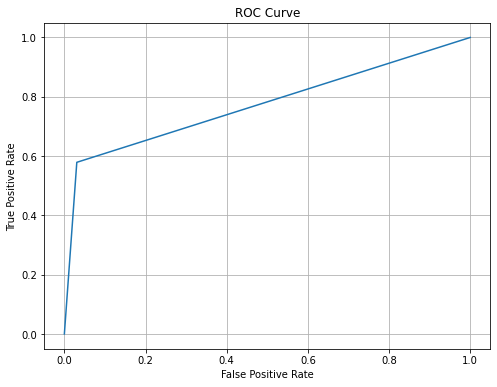

In [84]:
fpr, tpr, thresholds = roc_curve(test_gt, test_preds)
plt.figure(figsize=(8,6))
plt.plot(fpr,tpr)
plt.grid()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

Anche la curva ROC sembra affermare quanto detto: infatti, essa è più vicina alla curva ottimale di quanto non lo sia alla curva del peggior caso di classificazione (ossia quella rappresentata dalla diagonale del grafico).

## 8.2 Maximum A Posteriori basato su Bayes Naive
Poiché le classi individuate sono quattro, piuttosto che una banale classificazione binaria, potrebbe essere ancora più utile eseguire una classificazione multi-classe, così da individuare le varie sotto-popolazioni in base alle caratteristiche viste in precedenza.

Anzitutto, modifichiamo il dataset così da avere una singola colonna categoriale sullo status dei Pokémon (se comuni, baby, leggendari, o misteriosi): la nuova colonna creata, sarà appunto chiamata `category`. In tal modo otterremo un dataset etichettato in base ad una stringa.

In [85]:
pokedex_cut = pokedex[features]

for r in range(len(pokedex_cut)):
    if pokedex_cut.loc[r,'legendary'] == 1: pokedex_cut.loc[r, 'category'] = 'legendary'
    elif pokedex_cut.loc[r,'mythical'] == True: pokedex_cut.loc[r, 'category'] = 'mythical'
    elif pokedex_cut.loc[r, 'baby_pokemon'] == True: pokedex_cut.loc[r, 'category'] = 'baby'
    else: pokedex_cut.loc[r, 'category'] = 'common'

pokedex_cut.drop(['baby_pokemon', 'legendary', 'mythical'], axis=1, inplace=True)
pokedex_cut

name   hp  attack  defense  special_attack  \
0                Bulbasaur   45      49       49              65   
1                  Ivysaur   60      62       63              80   
2                 Venusaur   80      82       83             100   
3            Venusaur Gmax   80      82       83             100   
4            Venusaur Mega   80     100      123             122   
...                    ...  ...     ...      ...             ...   
1113             Glastrier  100     145      130              65   
1114             Spectrier  100      65       60             145   
1115               Calyrex  100      80       80              80   
1116     Calyrex Ice Rider  100     165      150              85   
1117  Calyrex Shadow Rider  100      85       80             165   

      special_defense  speed  capture_rate  female_rate  genderless  height  \
0                  65     45            45        0.125           0     0.7   
1                  80     60            45        0.125           0     1.0   
2                 100     80            45        0.125           0     2.0   
3                 100     80            45        0.125           0    24.0   
4                 120     80            45        0.125           0     2.4   
...               ...    ...           ...          ...         ...     ...   
1113              110     30             3        0.000           1     2.2   
1114               80    130             3        0.000           1     2.0   
1115               80     80             3        0.000           1     1.1   
1116              130     50             3        0.000           1     2.4   
1117              100    150             3        0.000           1     2.4   

      weight  base_experience  base_happiness  egg_cycles   category  
0        6.9               64              70        20.0     common  
1       13.0              142              70        20.0     common  
2      100.0              236              70        20.0     common  
3     1000.0              236              70        20.0     common  
4      155.5              281              70        20.0     common  
...      ...              ...             ...         ...        ...  
1113   800.0              290              35       120.0  legendary  
1114    44.5              290              35       120.0  legendary  
1115     7.7              250             100       120.0  legendary  
1116   809.1              340             100       120.0  legendary  
1117    53.6              340             100       120.0  legendary  

[1118 rows x 16 columns]

Suddividiamo il dataset ottenuto in due ulteriori set: uno di training e uno di test rispettivamente.

In [86]:
np.random.seed(1234)
pokedex_train, pokedex_test = train_test_split(pokedex_cut.drop('name', axis=1), test_size=0.25)
print("Training set length:",len(pokedex_train))
print("Test set length:",len(pokedex_test))

nb_model = GaussianNB(priors=[0.25, 0.25, 0.25, 0.25])
nb_model.fit(pokedex_train.loc[:, pokedex_train.columns != 'category'], pokedex_train['category'])

print('Model accuracy score on training set:', nb_model.score(pokedex_train[params], pokedex_train['category']))
print('Model accuracy score on test set:', nb_model.score(pokedex_test[params], pokedex_test['category']))

Training set length: 838
Test set length: 280
Model accuracy score on training set: 0.6264916467780429
Model accuracy score on test set: 0.5892857142857143


Notiamo che il punteggio di accuratezza generale è superiore allo 0.5: non perfetto ma comunque accettabile. Tuttavia, per poter studiare più accuratamente il modello, sono necessari altri indicatori, ricavabili mediante il calcolo della matrice di confusione, e osservare l'accuracy relativamente a tali indici.

In [87]:
test_preds = nb_model.predict(pokedex_test.loc[:, pokedex_test.columns != 'category'])
test_gt = pokedex_test['category']
cm_test = multilabel_confusion_matrix(test_gt, test_preds)
print("CONFUSION MATRIX:\n", cm_test)
print(classification_report(test_gt, test_preds))
#print('Rayquaza:', nb_model.predict(pokedex_cut[pokedex_cut['name']=="Rayquaza"].drop(['name', 'category'],axis=1)))

CONFUSION MATRIX:
 [[[189  89]
  [  0   2]]

 [[ 31   0]
  [101 148]]

 [[251   7]
  [ 14   8]]

 [[254  19]
  [  0   7]]]
              precision    recall  f1-score   support

        baby       0.02      1.00      0.04         2
      common       1.00      0.59      0.75       249
   legendary       0.53      0.36      0.43        22
    mythical       0.27      1.00      0.42         7

    accuracy                           0.59       280
   macro avg       0.46      0.74      0.41       280
weighted avg       0.94      0.59      0.71       280



Osservando gli indici di `precision` e `recall`, notiamo che la classe che viene classificata con più precisione è la `common`, mentre la meno precisa è la `baby`: questo è naturale, considerando che le classi sono molto sbilanciate. Inoltre, molti Pokémon comuni sono effettivamente più deboli, e potrebbero essere fraintesi come dei `baby`, pur non essendoli.\
D'altra parte, discorso molto simile relativo ai misteriosi, anche loro molto fraintendibili rispetto ai leggendari (in quanto, effettivamente, lo sono). 

## 8.3 Alberi di decisione

### 8.3.1 Con somma delle statistiche
Osserviamo la distribuzione delle somme delle statistiche al variare del `capture_rate` su uno spazio bidimensionale.

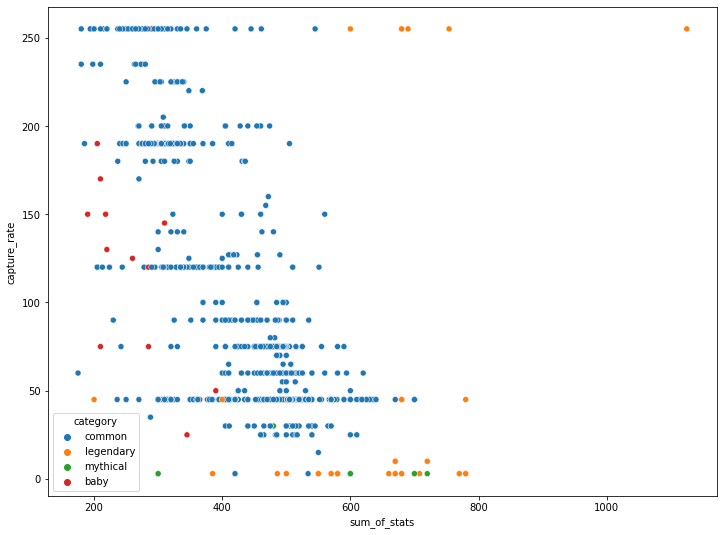

In [88]:
pokedex_cut_sum_stats = pd.concat([pokedex_cut[stats].sum(1), pokedex_cut['capture_rate'], pokedex_cut['category']], axis=1)
pokedex_cut_sum_stats.rename(columns={0: 'sum_of_stats'}, inplace=True)
plt.figure(figsize=(12,9))
sns.scatterplot(x='sum_of_stats', y='capture_rate', hue='category', data=pokedex_cut_sum_stats)
plt.show()

È possibile notare come non vi sia un'effettiva separabilità lineare, pertanto si potrebbe provare un classificatore di tipo non-lineare, quale ad esempio quello basato su alberi di decisione.

Proviamo con un albero di decisione caratterizzato da una profondità `max_depth=4`, pari quindi al numero di classi.

In [89]:
pokedex_train2D = pd.concat([pokedex_train[stats].sum(1), pokedex_train['capture_rate'], pokedex_train['category']], axis=1)
pokedex_train2D.rename(columns={0: 'sum_of_stats'}, inplace=True)

pokedex_test2D = pd.concat([pokedex_test[stats].sum(1), pokedex_test['capture_rate'], pokedex_test['category']], axis=1)
pokedex_test2D.rename(columns={0: 'sum_of_stats'}, inplace=True)

np.random.seed(1234)
dt = tree.DecisionTreeClassifier(max_depth=4)
dt.fit(pokedex_train2D.drop('category', axis=1), pokedex_train2D['category'])
print('Decision Tree accuracy:', dt.score(pokedex_test2D.drop('category', axis=1), pokedex_test2D['category']))

Decision Tree accuracy: 0.9464285714285714


È possibile notare che il modello ha effettivamente un'ottima accuratezza; per cui, aumentiamo la sua complessità introducendo tutti gli attributi presi singolarmente (e aumentando quindi la dimensionalità dei dati).

### 8.3.2 Con features complete

In [90]:
np.random.seed(1234)
dt_complete = tree.DecisionTreeClassifier(max_depth=4)
dt_complete.fit(pokedex_train[params], pokedex_train['category'])
print('Decision Tree training accuracy:', dt_complete.score(pokedex_train[params], pokedex_train['category']))
print('Decision Tree test accuracy:', dt_complete.score(pokedex_test[params], pokedex_test['category']))
#dt.predict(pokedex[pokedex['name']=='Necrozma Ultra'][params])

Decision Tree training accuracy: 0.9701670644391408
Decision Tree test accuracy: 0.9821428571428571


Il modello ha un ottimo indice di accuratezza sia sui dati di training, sia sui dati di testing (su questi ultimi, per giunta, anche meglio).\
Tuttavia, consci del fatto che l'accuratezza va valutata solamente in relazione agli altri indici prestazionali, osserviamoli a partire dalla sua matrice di confusione.

In [91]:
test_preds = dt_complete.predict(pokedex_test[params])
test_gt = pokedex_test['category']
cm_test = multilabel_confusion_matrix(test_gt, test_preds)
print("CONFUSION MATRIX:\n", cm_test)
print(classification_report(test_gt, test_preds))

CONFUSION MATRIX:
 [[[278   0]
  [  1   1]]

 [[ 29   2]
  [  1 248]]

 [[257   1]
  [  2  20]]

 [[271   2]
  [  1   6]]]
              precision    recall  f1-score   support

        baby       1.00      0.50      0.67         2
      common       0.99      1.00      0.99       249
   legendary       0.95      0.91      0.93        22
    mythical       0.75      0.86      0.80         7

    accuracy                           0.98       280
   macro avg       0.92      0.82      0.85       280
weighted avg       0.98      0.98      0.98       280



Considerando quanto le classi siano sbilanciate, questo è praticamente il miglior modello di classificazione trovato finora.\
I valori meno equilibrati sono quelli relativi alla classe `baby`, ma è normale considerando la sua trascurabile numerosità rispetto alle altre, sia nel set di training, sia nel set di testing: inoltre, come sempre, si ricorda che molti Pokémon comuni più deboli, potrebbero essere scambiati per dei baby, e viceversa.

Di seguito si presenta la struttura dell'albero di decisione trovato.

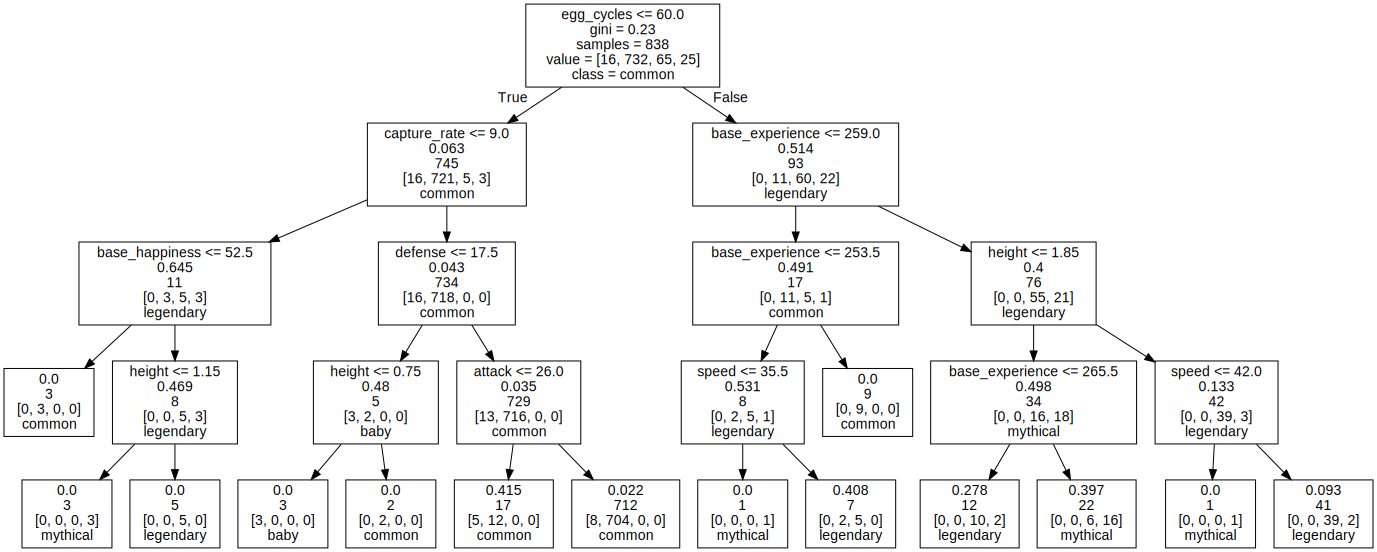

In [92]:
dot_data = tree.export_graphviz(dt_complete, feature_names=params, class_names=dt_complete.classes_, label='root')
graph = graphviz.Source(dot_data)
graph

### 8.3.3 PCA

Nonostante il precedente modello, il quale fa utilizzo di tutti i possibili parametri individuali di un Pokémon, sia decisamente il miglior modello di classificazione scovato nel corso di quest'analisi, è anche vero che il dataset ha una dimensionalità molto elevata, il che complica in maniera considerevole la sua rappresentazione in uno spazio geometrico.\
Eseguendo una Principal Component Analysis, così da poter rappresentare i dati (e le decision boundary trovate dal modello) in uno spazio bidimensionale, osserviamo inoltre le prestazioni di un possibile albero di decisione che agisce considerando le componenti principali (ossia due componenti indipendenti) dell'intero dataset.

In [93]:
target_map = {'baby': 0, 'common':1, 'legendary': 2, 'mythical': 3}
pca = PCA(n_components=2)
x_test = pca.fit_transform(pokedex_test[params])
y_test = np.array(pokedex_test['category'].apply(lambda x: target_map[x]).astype(int))

dt_pca = tree.DecisionTreeClassifier(max_depth=4)
dt_pca.fit(x_test, y_test)
print('Decision Tree PCA accuracy:', dt_pca.score(x_test, y_test))

test_preds = dt_pca.predict(x_test)
test_gt = y_test
cm_test = multilabel_confusion_matrix(test_gt, test_preds)
print("\nCONFUSION MATRIX:\n", cm_test)
print('\nLegend:', target_map)
print(classification_report(test_gt, test_preds))


Decision Tree PCA accuracy: 0.9571428571428572

CONFUSION MATRIX:
 [[[278   0]
  [  2   0]]

 [[ 24   7]
  [  3 246]]

 [[253   5]
  [  4  18]]

 [[273   0]
  [  3   4]]]

Legend: {'baby': 0, 'common': 1, 'legendary': 2, 'mythical': 3}
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.97      0.99      0.98       249
           2       0.78      0.82      0.80        22
           3       1.00      0.57      0.73         7

    accuracy                           0.96       280
   macro avg       0.69      0.59      0.63       280
weighted avg       0.95      0.96      0.95       280



È possibile notare come la situazione sia peggiorata (seppur di poco), rispetto al caso precedente: il modello addestrato sulle PCA ha infatti uno scarto di 0.02 due punti sull'accuratezza, rispetto al precedente; inoltre, è possibile notare come il modello si comporti in maniera decisamente diversa sulle classi meno numerose, a partire dalla classe dei `baby`.

Di seguito si presenta una rappresentazione delle aree di bounding trovate dal modello: è possibile notare come le etichettature corrette siano maggiormente presenti sulle classi `common` e `legendary`. 

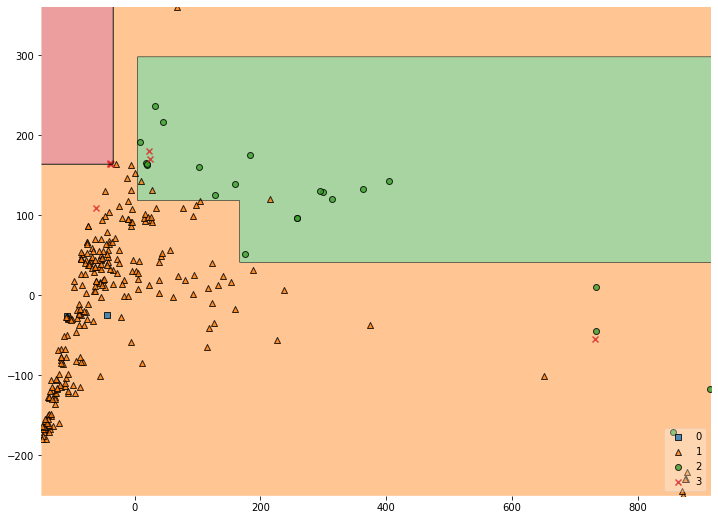

In [94]:
plt.figure(figsize=(12,9))
plot_decision_regions(x_test, y_test, clf=dt_pca, legend=4)
plt.show()

## 8.4 Random Tree Forests
Potrebbe essere interessante osservare un confronto tra il precedente metodo e delle foreste di alberi random, le quali sono caratterizzati da molti alberi di profondità limitata: anche in questo caso, la profondità verrà posta pari al numero di classi, e quindi si avrà `max_depth=4`, per ognuno dei 100 alberi.
### 8.4.1 Attributi completi

In [95]:
np.random.seed(1234)
df = RandomForestClassifier(max_depth=4, n_estimators=100)
df.fit(pokedex_train[params], pokedex_train['category'])
print('Decision Forest train accuracy:', df.score(pokedex_train[params], pokedex_train['category']))
print('Decision Forest test accuracy:', df.score(pokedex_test[params], pokedex_test['category']))

Decision Forest train accuracy: 0.9725536992840096
Decision Forest test accuracy: 0.9785714285714285


Gli score di accuratezza sono prossimi a quelli visti nel caso degli alberi decisione, ma osserviamoli relativamente alla matrice di confusione e agli ulteriori indici di performance.

In [96]:
test_preds = df.predict(pokedex_test[params])
test_gt = pokedex_test['category']
cm = multilabel_confusion_matrix(test_gt, test_preds)
print("CONFUSION MATRIX:\n", cm)
print(classification_report(test_gt, test_preds))

CONFUSION MATRIX:
 [[[278   0]
  [  2   0]]

 [[ 28   3]
  [  0 249]]

 [[256   2]
  [  1  21]]

 [[272   1]
  [  3   4]]]
              precision    recall  f1-score   support

        baby       0.00      0.00      0.00         2
      common       0.99      1.00      0.99       249
   legendary       0.91      0.95      0.93        22
    mythical       0.80      0.57      0.67         7

    accuracy                           0.98       280
   macro avg       0.68      0.63      0.65       280
weighted avg       0.97      0.98      0.97       280



È possibile notare che la classe `baby` venga ancora "rigettata" (come nel caso degli alberi di decisione con PCA), favorendo maggiormente un'etichettatura basata sulle altre tre classi: ciò è dovuto, naturalmente, oltre che alla scarsa numerosità della classe presa in esame, anche alla struttura intrinseca delle Random Forest, le quali sono caratterizzati da alberi poco profondi. Pertanto, al termine della sogliature (da calcolare per poter effettuare gli splitting dei nodi degli alberi che le compongono), i record relativi ai `baby` verranno portati sulla classe `common`, vista la loro sottilissima differenza interclasse. 

### 8.4.2 PCA
Analizziamo anche in questo caso un tentativo di classificazione facendo uso della PCA per ridurre la dimensionalità del dataset.

In [97]:
pca = PCA(n_components=2)
x_test = pca.fit_transform(pokedex_test[params])
y_test = np.array(pokedex_test['category'].apply(lambda x: target_map[x]))

np.random.seed(1234)
df_pca = RandomForestClassifier(max_depth=4, n_estimators=100)
df_pca.fit(x_test, y_test)
print('Random Forest PCA score:', df_pca.score(x_test, y_test))

test_preds = df_pca.predict(x_test)
test_gt = y_test
cm = multilabel_confusion_matrix(test_gt, test_preds)
print("\nCONFUSION MATRIX:\n", cm)
print("\nLegend:", target_map)
print(classification_report(test_gt, test_preds))

Random Forest PCA score: 0.975

CONFUSION MATRIX:
 [[[278   0]
  [  2   0]]

 [[ 26   5]
  [  1 248]]

 [[256   2]
  [  2  20]]

 [[273   0]
  [  2   5]]]

Legend: {'baby': 0, 'common': 1, 'legendary': 2, 'mythical': 3}
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.98      1.00      0.99       249
           2       0.91      0.91      0.91        22
           3       1.00      0.71      0.83         7

    accuracy                           0.97       280
   macro avg       0.72      0.65      0.68       280
weighted avg       0.97      0.97      0.97       280



Notiamo che le performance di questo modello, allenato sul dataset sul quale è stata eseguita un'operazione di PCA, sono praticamente le medesime di quello del modello visto nel precedente paragrafo, addestrato invece utilizzando tutte le feature del dataset interessate.

Di seguito si presenta una rappresentazione delle aree di bounding trovate dal modello.

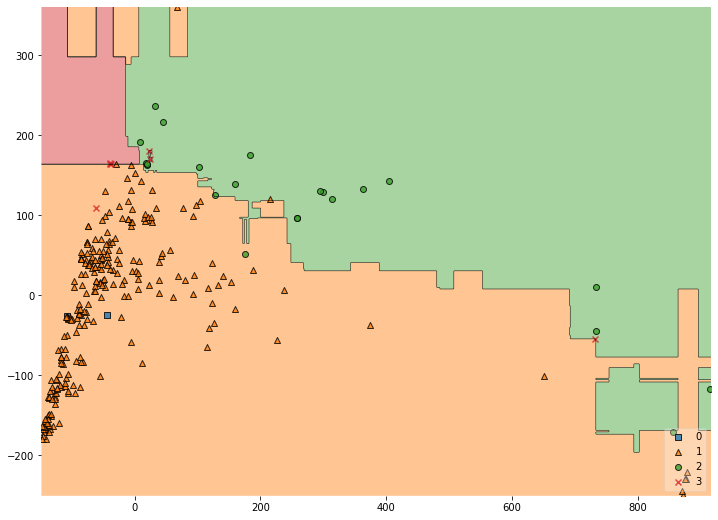

In [98]:
plt.figure(figsize=(12,9))
plot_decision_regions(x_test, y_test, clf=df_pca, legend=4)
plt.show()

Anche in questo caso si può che le etichettature corrette siano maggiormente presenti sulle classi `common` e `legendary`, tuttavia le bounding region sono decisamente diverse rispetto a prima: notiamo, in particolare, una notevole differenza nella bounding region relativa ai leggendari, simbolo che questo classificatore è più "permissivo" nei loro confronti, tanto da includerne di più rispetto al classificatore con alberi di decisione con PCA. 

# 9. Clustering
## 9.1 K-Means

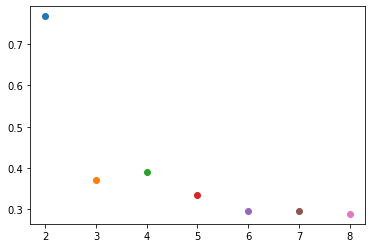

BEST NUMBER OF CLUSTERS: 2  => SILHOUETTE AVG: 0.767473327960135


name   hp  attack  defense  special_attack  \
0                Bulbasaur   45      49       49              65   
1                  Ivysaur   60      62       63              80   
2                 Venusaur   80      82       83             100   
3            Venusaur Gmax   80      82       83             100   
4            Venusaur Mega   80     100      123             122   
...                    ...  ...     ...      ...             ...   
1113             Glastrier  100     145      130              65   
1114             Spectrier  100      65       60             145   
1115               Calyrex  100      80       80              80   
1116     Calyrex Ice Rider  100     165      150              85   
1117  Calyrex Shadow Rider  100      85       80             165   

      special_defense  speed  capture_rate  female_rate  genderless  height  \
0                  65     45            45        0.125           0     0.7   
1                  80     60            45        0.125           0     1.0   
2                 100     80            45        0.125           0     2.0   
3                 100     80            45        0.125           0    24.0   
4                 120     80            45        0.125           0     2.4   
...               ...    ...           ...          ...         ...     ...   
1113              110     30             3        0.000           1     2.2   
1114               80    130             3        0.000           1     2.0   
1115               80     80             3        0.000           1     1.1   
1116              130     50             3        0.000           1     2.4   
1117              100    150             3        0.000           1     2.4   

      weight  base_experience  base_happiness  egg_cycles  cluster  
0        6.9               64              70        20.0        0  
1       13.0              142              70        20.0        0  
2      100.0              236              70        20.0        0  
3     1000.0              236              70        20.0        1  
4      155.5              281              70        20.0        0  
...      ...              ...             ...         ...      ...  
1113   800.0              290              35       120.0        1  
1114    44.5              290              35       120.0        0  
1115     7.7              250             100       120.0        0  
1116   809.1              340             100       120.0        1  
1117    53.6              340             100       120.0        0  

[1118 rows x 16 columns]

In [99]:
best_silhouette = 0
best_n_clusters = 0

for n_clusters in range(2, 9):
    kmeans = KMeans(n_clusters=n_clusters)
    kmeans.fit(pokedex_cut[params])
    clusters = kmeans.labels_

    silhouette_avg = silhouette_score(pokedex_cut[params], clusters)
    plt.scatter(n_clusters, silhouette_avg)
    if (best_silhouette < silhouette_avg):
        best_silhouette = silhouette_avg
        best_n_clusters = n_clusters

plt.show()
print("BEST NUMBER OF CLUSTERS:",best_n_clusters," => SILHOUETTE AVG:",best_silhouette)

best_kmeans = KMeans(best_n_clusters)
best_kmeans.fit(pokedex_cut[params])

clusters = best_kmeans.labels_

data = pokedex_cut.drop('category', axis=1)
data['cluster'] = clusters.astype(int)
data

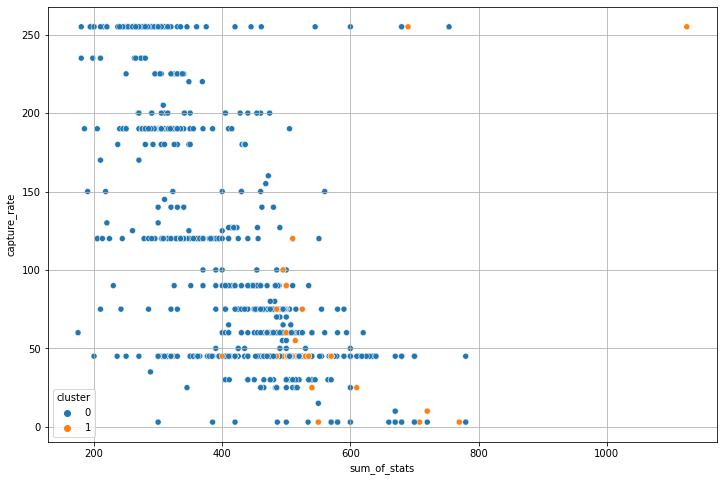

In [100]:
pokedex_sum_stats['cluster'] = clusters.astype(str)
plt.figure(figsize=(12,8))
sns.scatterplot('sum_of_stats','capture_rate',data=pokedex_sum_stats, hue='cluster')
plt.grid(True)
plt.show()